# **`pycoco`** calling **`CoCo`**

___

## Brief description of operation
___

lcfit, specfit, specphase, lcsim

![flowchart](data/pycoco_flowchart.png)


## Introduction

---
**`pycoco.coco_calls`**

In [2]:
# %matplotlib notebook
%matplotlib inline

from matplotlib import pyplot as plt

import os
import numpy as np
from astropy.table import Table

import pycoco as pcc

# Run Light Curve Fits
___
## Individual SNe
First test - let's load in the photometry to a SN object, see if you have a fit for SN2006aj and plot the light curve.

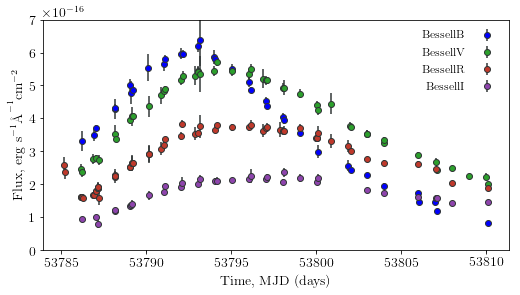

True

In [8]:
snname = "SN2006aj"
sn = pcc.classes.SNClass(snname)
sn.load_phot(verbose=False)

sn.plot_lc(multiplot=False)
pcc.coco.test_LCfit(snname)

Let's try running a fit anyway:

In [ ]:
pcc.coco.run_LCfit(snname+".dat") ## This will look for a file called SN2006aj.dat in the current working directory

Unless you had the file in here, this probably threw a warning. To run, it is best to give the explicit path to the file you want to fit, like so.

In [ ]:
pcc.coco.run_LCfit(os.path.join(pcc.defaults._default_data_dir_path, "lc/"+snname+".dat"))

Great, let's take a look at what we have.

In [ ]:
sn.get_lcfit(os.path.join(pcc.defaults._default_recon_dir_path, snname + ".dat"))

sn.plot_lc(multiplot=False)

## All SNe as Batch
___

You can run using a file input containing a list of the lightcurves. 

In [ ]:
lclist_path = os.path.join(pcc.defaults._default_coco_dir_path, "examples/lc.list")

with open(lclist_path, "r") as f:
    print(f.read())

In [ ]:
# run_all = True
run_all = False

if run_all:                                  ## This can take a while!
    pcc.coco.run_LCfit_fileinput(lclist_path)
    print("Done.")

## Call Specfit
---
specfitting takes the list of spectra that lives in `COCO_ROOT_DIR/lists/` and adjusts their fluxes, by multiplying them by a cubic spline, so that their spectrophotometric flux matches that of the light curves we have just done at their observed MJD. 

### individual speclists

In [3]:
pcc.coco.test_specfit(sn.name)

True

In [9]:
pcc.coco.specfit_sn(SNobject=sn, overwrite=True, verbose=True)

BessellB.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
53771.2            8.42659e-18 ...           1.013235e-17            6.72083e-18
53803.2            2.15525e-16 ...          2.1747853e-16          2.1357147e-16
53804.2            1.89337e-16 ...           1.912683e-16           1.874057e-16
53805.2            1.66197e-16 ...           1.681316e-16           1.642624e-16
53806.2            1.45805e-16 ...          1.4774698e-16          1.4386302e-16
53807.2            1.27866e-16 ...          1.2980662e-16          1.2592538e-16
53808.2            1.12106e-16 ...          1.1403058e-16          1.1018142e-16
53809.2             9.8272e-17 ...           1.001643e-16            9.63797e-17
53810.2             8.6135e-17 ...           8.797971e-17           8.429029e-17
53811.2        

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/classes.py:2395: UserWarning: No self.lambda_effective set.
  warnings.warn("No self.lambda_effective set.")


Reading /Users/berto/Code/CoCo/data/spec_extended/SN2006aj/SN2006aj_53786.270000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2006aj/SN2006aj_53787.230000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2006aj/ SN2006aj_53787.230000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2006aj/SN2006aj_53787.230000.spec
Reading /Users/berto/Code/CoCo/data/spec_extended/SN2006aj/SN2006aj_53787.230000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2006aj/SN2006aj_53788.200000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2006aj/ SN2006aj_53788.200000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2006aj/SN2006aj_53788.200000.spec
Reading /Users/berto/Code/CoCo/data/spec_extended/SN2006aj/SN2006aj_53788.200000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2006aj/SN2006aj_53789.170000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2006aj/ SN2006aj_53789.170000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2006aj/SN2006aj_53789.170000.spec
Reading /Users/berto/Code/CoCo/data/s

/Users/berto/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadrature.py:324: RuntimeWarning: divide by zero encountered in true_divide
  h0divh1 = h0 / h1
/Users/berto/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadrature.py:326: RuntimeWarning: invalid value encountered in true_divide
  y[slice1]*hsum*hsum/hprod +
/Users/berto/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadrature.py:327: RuntimeWarning: invalid value encountered in multiply
  y[slice2]*(2-h0divh1))
/Users/berto/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadrature.py:326: RuntimeWarning: divide by zero encountered in true_divide
  y[slice1]*hsum*hsum/hprod +
/Users/berto/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadrature.py:326: RuntimeWarning: invalid value encountered in multiply
  y[slice1]*hsum*hsum/hprod +
/Users/berto/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadrature.py:327: RuntimeWarning: invalid value encountered in add
  y[slice2]*(2-h0di

SN2006aj_53786.270000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
Overwriting /Users/berto/Code/CoCo/recon/SN2006aj_53786.270000.spec
SN2006aj_53787.230000.spec <pycoco.classes.SpectrumClass object at 0x115cfa0f0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.96955
Filter_area =  958.913946374
Integrated flux =  nan
New integrated flux =  2.92117958653e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.96955
Filter_area =  958.913946374
Integrated flux =  nan
New integrated flux =  2.92117958653e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.96955
Filter_area =  1441.07766099
Integrated flux =  nan
New integrated flux =  1.47217710703e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.96955
Filter_area =  1441.07766099
Integrated flux =  nan
New integrated flux =  1.47217710703e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.96955
Filter_area =  1

SN2006aj_53789.170000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
Overwriting /Users/berto/Code/CoCo/recon/SN2006aj_53789.170000.spec
SN2006aj_53790.140000.spec <pycoco.classes.SpectrumClass object at 0x115cd35f8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.89227
Filter_area =  958.900109451
Integrated flux =  nan
New integrated flux =  5.24328346165e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.89227
Filter_area =  958.900109451
Integrated flux =  nan
New integrated flux =  5.24328346165e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.89227
Filter_area =  1441.29990715
Integrated flux =  nan
New integrated flux =  2.38593220596e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.89227
Filter_area =  1441.29990715
Integrated flux =  nan
New integrated flux =  2.38593220596e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.89227
Filter_area =  1

SN2006aj_53792.070000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
Overwriting /Users/berto/Code/CoCo/recon/SN2006aj_53792.070000.spec
SN2006aj_53793.040000.spec <pycoco.classes.SpectrumClass object at 0x115cfd400>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.95248
Filter_area =  958.910378565
Integrated flux =  nan
New integrated flux =  5.67181538887e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.95248
Filter_area =  958.910378565
Integrated flux =  nan
New integrated flux =  5.67181538887e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.95248
Filter_area =  1441.09071289
Integrated flux =  nan
New integrated flux =  3.01933221026e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.95248
Filter_area =  1441.09071289
Integrated flux =  nan
New integrated flux =  3.01933221026e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.95248
Filter_area =  1

SN2006aj_53794.970000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
Overwriting /Users/berto/Code/CoCo/recon/SN2006aj_53794.970000.spec
SN2006aj_53795.940000.spec <pycoco.classes.SpectrumClass object at 0x116419668>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.23205
Filter_area =  958.909633162
Integrated flux =  nan
New integrated flux =  4.79331627566e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.23205
Filter_area =  958.909633162
Integrated flux =  nan
New integrated flux =  4.79331627566e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.23205
Filter_area =  1441.07950452
Integrated flux =  nan
New integrated flux =  3.16997214072e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.23205
Filter_area =  1441.07950452
Integrated flux =  nan
New integrated flux =  3.16997214072e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.23205
Filter_area =  1

SN2006aj_53797.880000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
Overwriting /Users/berto/Code/CoCo/recon/SN2006aj_53797.880000.spec
SN2006aj_53798.840000.spec <pycoco.classes.SpectrumClass object at 0x115cfa898>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.81806
Filter_area =  958.912126918
Integrated flux =  nan
New integrated flux =  3.51250872542e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.81806
Filter_area =  958.912126918
Integrated flux =  nan
New integrated flux =  3.51250872542e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.81806
Filter_area =  1441.08455058
Integrated flux =  nan
New integrated flux =  1.83842368162e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.81806
Filter_area =  1441.08455058
Integrated flux =  nan
New integrated flux =  1.83842368162e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.81806
Filter_area =  1

SN2006aj_53801.750000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
Overwriting /Users/berto/Code/CoCo/recon/SN2006aj_53801.750000.spec
SN2006aj_53802.720000.spec <pycoco.classes.SpectrumClass object at 0x115cfa400>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.17503
Filter_area =  958.908728931
Integrated flux =  nan
New integrated flux =  2.17864257135e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.17503
Filter_area =  958.908728931
Integrated flux =  nan
New integrated flux =  2.17864257135e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.17503
Filter_area =  1441.08002853
Integrated flux =  nan
New integrated flux =  2.70086466108e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.17503
Filter_area =  1441.08002853
Integrated flux =  nan
New integrated flux =  2.70086466108e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.17503
Filter_area =  1

SN2006aj_53803.680001.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
Overwriting /Users/berto/Code/CoCo/recon/SN2006aj_53803.680001.spec


## All Speclists
___

In [10]:
specfit_all = True
# specfit_all = False
if specfit_all:           ## This also might take a while!
    pcc.coco.specfit_all()

0 iPTF13bvn /Users/berto/Code/CoCo/lists/iPTF13bvn.list
/Users/berto/Code/CoCo//data/lc/iPTF13bvn.dat
BessellB.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
56459.8            3.89563e-16 ...          3.9379674e-16          3.8532926e-16
56468.8            2.81217e-15 ...          2.8251855e-15          2.7991545e-15
56469.8             3.1504e-15 ...          3.1626815e-15          3.1381185e-15
56470.8            3.41273e-15 ...          3.4241689e-15          3.4012911e-15
56471.8            3.57498e-15 ...          3.5873368e-15          3.5626232e-15
56472.8            3.62893e-15 ...          3.6440423e-15          3.6138177e-15
56473.8            3.58245e-15 ...          3.6004686e-15          3.5644314e-15
56474.8            3.45455e-15 ...             3.4744e-15             3.434

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/classes.py:2395: UserWarning: No self.lambda_effective set.
  warnings.warn("No self.lambda_effective set.")


8 24759.6449687
SDSS_r.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
56506.4            8.61167e-16 ...           9.054176e-16           8.169164e-16
56472.4            2.45665e-15 ...         2.46546133e-15         2.44783867e-15
56471.4            2.40717e-15 ...         2.41462526e-15         2.39971474e-15
56470.4            2.31606e-15 ...         2.32217508e-15         2.30994492e-15
56469.4            2.17837e-15 ...         2.18386738e-15         2.17287262e-15
56468.4             1.9942e-15 ...         2.00007005e-15         1.98832995e-15
56467.4            1.77066e-15 ...          1.7771404e-15          1.7641796e-15
56466.4            1.52184e-15 ...         1.52839074e-15         1.51528926e-15
56465.4            1.26615e-15 ...         1.27200969e-15         1.26029031e-15
5

Reading /Users/berto/Code/CoCo/data/spec_extended/iPTF13bvn/iPTF13bvn_56495.910000.spec
/Users/berto/Code/CoCo/data/spec_extended/iPTF13bvn/iPTF13bvn_56509.850000.spec /Users/berto/Code/CoCo/data/spec_extended/iPTF13bvn/ iPTF13bvn_56509.850000.spec
/Users/berto/Code/CoCo/data/spec_extended/iPTF13bvn/iPTF13bvn_56509.850000.spec
Reading /Users/berto/Code/CoCo/data/spec_extended/iPTF13bvn/iPTF13bvn_56509.850000.spec
['BessellB', 'BessellI', 'BessellR', 'BessellV', 'SDSS_g', 'SDSS_i', 'SDSS_r', 'SDSS_z']
Has both BessellR and SDSS_r - using SDSS_r
Has both BessellI and SDSS_i - using SDSS_i
/Users/berto/Code/CoCo/recon iPTF13bvn_m.dat
has data
/Users/berto/Code/CoCo/recon/iPTF13bvn_m.dat
Overwriting /Users/berto/Code/CoCo/recon/iPTF13bvn_m.dat
   MJD             flux                 flux_err        filter
    d     erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)       
--------- ---------------------- ---------------------- ------
56445.800             1.6967e-18             6.7396e-19 SDSS_

/Users/berto/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadrature.py:326: RuntimeWarning: divide by zero encountered in true_divide
  y[slice1]*hsum*hsum/hprod +
/Users/berto/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadrature.py:326: RuntimeWarning: invalid value encountered in multiply
  y[slice1]*hsum*hsum/hprod +
/Users/berto/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadrature.py:326: RuntimeWarning: invalid value encountered in true_divide
  y[slice1]*hsum*hsum/hprod +
/Users/berto/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadrature.py:326: RuntimeWarning: invalid value encountered in add
  y[slice1]*hsum*hsum/hprod +


filter =  SDSS_r
min wavelength =  1501.0
max wavelength =  9999.87075
Filter_area =  1108.15393845
Integrated flux =  nan
New integrated flux =  3.57986567416e-13
filter =  SDSS_r
min wavelength =  1501.0
max wavelength =  9999.87075
Filter_area =  1108.15393845
Integrated flux =  nan
New integrated flux =  3.57986567416e-13
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  9999.87075
Filter_area =  1048.42415315
Integrated flux =  nan
New integrated flux =  1.55236027183e-14
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  9999.87075
Filter_area =  1048.42415315
Integrated flux =  nan
New integrated flux =  1.55236027183e-14
False
False
False
False
False
True
Scale Factor 2.39032458482e+15
norm factor 1.03736
scaled 
 filter  fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
-------- -------- --------------- ... ---- ------------ -------------
BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
BessellV  1.10757         1.14313 ... Tr

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/iPTF13bvn_56460.070000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")
/Users/berto/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadrature.py:324: RuntimeWarning: divide by zero encountered in true_divide
  h0divh1 = h0 / h1
/Users/berto/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadrature.py:327: RuntimeWarning: invalid value encountered in multiply
  y[slice2]*(2-h0divh1))
/Users/berto/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadrature.py:327: RuntimeWarning: invalid value encountered in add
  y[slice2]*(2-h0divh1))


iPTF13bvn_56461.070000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
iPTF13bvn_56462.060000.spec <pycoco.classes.SpectrumClass object at 0x115eb55c0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.65777
Filter_area =  958.900540106
Integrated flux =  nan
New integrated flux =  6.77037389556e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.65777
Filter_area =  958.900540106
Integrated flux =  nan
New integrated flux =  6.77037389556e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.65777
Filter_area =  893.100772747
Integrated flux =  nan
New integrated flux =  6.27605356951e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.65777
Filter_area =  893.100772747
Integrated flux =  nan
New integrated flux =  6.27605356951e-13
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.65777
Filter_area =  1163.1724443
Integrated flux =  nan
New integrated flux =  8.24692482

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/iPTF13bvn_56461.070000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


iPTF13bvn_56462.060000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
iPTF13bvn_56463.060000.spec <pycoco.classes.SpectrumClass object at 0x115e93550>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.65328
Filter_area =  958.900249722
Integrated flux =  nan
New integrated flux =  8.84206232241e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.65328
Filter_area =  958.900249722
Integrated flux =  nan
New integrated flux =  8.84206232241e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.65328
Filter_area =  893.100385753
Integrated flux =  nan
New integrated flux =  7.6961156504e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.65328
Filter_area =  893.100385753
Integrated flux =  nan
New integrated flux =  7.6961156504e-13
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.65328
Filter_area =  1163.17257785
Integrated flux =  nan
New integrated flux =  1.116184778

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/iPTF13bvn_56462.060000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


iPTF13bvn_56463.060000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
iPTF13bvn_56465.050000.spec <pycoco.classes.SpectrumClass object at 0x115d33128>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.38656
Filter_area =  958.899515759
Integrated flux =  nan
New integrated flux =  1.45183600454e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.38656
Filter_area =  958.899515759
Integrated flux =  nan
New integrated flux =  1.45183600454e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.38656
Filter_area =  893.100024842
Integrated flux =  nan
New integrated flux =  1.13283821573e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.38656
Filter_area =  893.100024842
Integrated flux =  nan
New integrated flux =  1.13283821573e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.38656
Filter_area =  1163.17228579
Integrated flux =  nan
New integrated flux =  1.8974246

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/iPTF13bvn_56463.060000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


iPTF13bvn_56465.050000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
iPTF13bvn_56467.040000.spec <pycoco.classes.SpectrumClass object at 0x115cb5e80>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.1053
Filter_area =  958.900670512
Integrated flux =  nan
New integrated flux =  2.16442447108e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.1053
Filter_area =  958.900670512
Integrated flux =  nan
New integrated flux =  2.16442447108e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.1053
Filter_area =  893.099874712
Integrated flux =  nan
New integrated flux =  1.60461416718e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.1053
Filter_area =  893.099874712
Integrated flux =  nan
New integrated flux =  1.60461416718e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.1053
Filter_area =  1163.17223437
Integrated flux =  nan
New integrated flux =  2.80829308978e

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/iPTF13bvn_56465.050000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


iPTF13bvn_56467.040000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
iPTF13bvn_56468.030000.spec <pycoco.classes.SpectrumClass object at 0x115d33898>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.72767
Filter_area =  958.899749363
Integrated flux =  nan
New integrated flux =  2.54254537942e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.72767
Filter_area =  958.899749363
Integrated flux =  nan
New integrated flux =  2.54254537942e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.72767
Filter_area =  893.099930939
Integrated flux =  nan
New integrated flux =  1.86955004361e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.72767
Filter_area =  893.099930939
Integrated flux =  nan
New integrated flux =  1.86955004361e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.72767
Filter_area =  1163.17232652
Integrated flux =  nan
New integrated flux =  3.2161572

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/iPTF13bvn_56467.040000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


iPTF13bvn_56468.030000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
iPTF13bvn_56469.030000.spec <pycoco.classes.SpectrumClass object at 0x115dd9a90>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.9993
Filter_area =  958.89999813
Integrated flux =  nan
New integrated flux =  2.15091696883e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.9993
Filter_area =  958.89999813
Integrated flux =  nan
New integrated flux =  2.15091696883e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.9993
Filter_area =  893.099997273
Integrated flux =  nan
New integrated flux =  2.14328581757e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.9993
Filter_area =  893.099997273
Integrated flux =  nan
New integrated flux =  2.14328581757e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.9993
Filter_area =  1163.17220082
Integrated flux =  nan
New integrated flux =  2.62496080715e-1

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/iPTF13bvn_56468.030000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


iPTF13bvn_56469.030000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
iPTF13bvn_56470.030000.spec <pycoco.classes.SpectrumClass object at 0x115e91908>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.55945
Filter_area =  958.896393881
Integrated flux =  nan
New integrated flux =  3.1580420759e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.55945
Filter_area =  958.896393881
Integrated flux =  nan
New integrated flux =  3.1580420759e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.55945
Filter_area =  893.099167946
Integrated flux =  nan
New integrated flux =  2.41524143622e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.55945
Filter_area =  893.099167946
Integrated flux =  nan
New integrated flux =  2.41524143622e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.55945
Filter_area =  1163.16748891
Integrated flux =  nan
New integrated flux =  3.744374041

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/iPTF13bvn_56469.030000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


iPTF13bvn_56470.030000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
iPTF13bvn_56471.020000.spec <pycoco.classes.SpectrumClass object at 0x1165be550>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.73469
Filter_area =  958.899474781
Integrated flux =  nan
New integrated flux =  3.3095574589e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.73469
Filter_area =  958.899474781
Integrated flux =  nan
New integrated flux =  3.3095574589e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.73469
Filter_area =  893.100118298
Integrated flux =  nan
New integrated flux =  2.6586387045e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.73469
Filter_area =  893.100118298
Integrated flux =  nan
New integrated flux =  2.6586387045e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.73469
Filter_area =  1163.17217075
Integrated flux =  nan
New integrated flux =  3.82594426533

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/iPTF13bvn_56470.030000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


iPTF13bvn_56471.020000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
iPTF13bvn_56474.010000.spec <pycoco.classes.SpectrumClass object at 0x115cbb390>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.72767
Filter_area =  958.899466509
Integrated flux =  nan
New integrated flux =  3.27508026199e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.72767
Filter_area =  958.899466509
Integrated flux =  nan
New integrated flux =  3.27508026199e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.72767
Filter_area =  893.100104606
Integrated flux =  nan
New integrated flux =  3.10090332894e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.72767
Filter_area =  893.100104606
Integrated flux =  nan
New integrated flux =  3.10090332894e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.72767
Filter_area =  1163.17218587
Integrated flux =  nan
New integrated flux =  3.6196018

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/iPTF13bvn_56471.020000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


iPTF13bvn_56474.010000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
iPTF13bvn_56476.990000.spec <pycoco.classes.SpectrumClass object at 0x115e91470>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.73469
Filter_area =  958.899646704
Integrated flux =  nan
New integrated flux =  2.72683189413e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.73469
Filter_area =  958.899646704
Integrated flux =  nan
New integrated flux =  2.72683189413e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.73469
Filter_area =  893.100027595
Integrated flux =  nan
New integrated flux =  3.01165998797e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.73469
Filter_area =  893.100027595
Integrated flux =  nan
New integrated flux =  3.01165998797e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.73469
Filter_area =  1163.17210311
Integrated flux =  nan
New integrated flux =  3.1133912

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/iPTF13bvn_56474.010000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


iPTF13bvn_56476.990000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
iPTF13bvn_56483.960000.spec <pycoco.classes.SpectrumClass object at 0x116196278>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.72767
Filter_area =  958.900005553
Integrated flux =  nan
New integrated flux =  1.42229565754e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.72767
Filter_area =  958.900005553
Integrated flux =  nan
New integrated flux =  1.42229565754e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.72767
Filter_area =  893.100000325
Integrated flux =  nan
New integrated flux =  1.95635869532e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.72767
Filter_area =  893.100000325
Integrated flux =  nan
New integrated flux =  1.95635869532e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.72767
Filter_area =  1163.17201342
Integrated flux =  nan
New integrated flux =  1.9264269

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/iPTF13bvn_56476.990000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


iPTF13bvn_56483.960000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
iPTF13bvn_56495.910000.spec <pycoco.classes.SpectrumClass object at 0x115cb59b0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.73469
Filter_area =  958.899988165
Integrated flux =  nan
New integrated flux =  4.49142919264e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.73469
Filter_area =  958.899988165
Integrated flux =  nan
New integrated flux =  4.49142919264e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.73469
Filter_area =  893.099865598
Integrated flux =  nan
New integrated flux =  8.28592920711e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.73469
Filter_area =  893.099865598
Integrated flux =  nan
New integrated flux =  8.28592920711e-13
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.73469
Filter_area =  1163.172103
Integrated flux =  nan
New integrated flux =  5.618426480

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/iPTF13bvn_56483.960000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


iPTF13bvn_56495.910000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
iPTF13bvn_56509.850000.spec <pycoco.classes.SpectrumClass object at 0x115cb5dd8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.19648
Filter_area =  958.89962929
Integrated flux =  nan
New integrated flux =  -2.08141791126e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.19648
Filter_area =  958.89962929
Integrated flux =  nan
New integrated flux =  -2.08141791126e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.19648
Filter_area =  893.100216307
Integrated flux =  nan
New integrated flux =  4.72080230888e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.19648
Filter_area =  893.100216307
Integrated flux =  nan
New integrated flux =  4.72080230888e-13
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.19648
Filter_area =  1163.17177126
Integrated flux =  nan
New integrated flux =  1.4618092

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/iPTF13bvn_56495.910000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


iPTF13bvn_56509.850000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/iPTF13bvn_56509.850000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")



Done
1 SN1993J /Users/berto/Code/CoCo/lists/SN1993J.list
/Users/berto/Code/CoCo//data/lc/SN1993J.dat
BessellB.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
49207.4            8.32797e-15 ...           8.734029e-15           7.921911e-15
49170.4            2.09279e-14 ...          2.1268689e-14          2.0587111e-14
49169.4            2.13092e-14 ...          2.1646835e-14          2.0971565e-14
49168.4            2.16871e-14 ...          2.2022364e-14          2.1351836e-14
49167.4            2.20609e-14 ...          2.2394696e-14          2.1727104e-14
49166.4            2.24299e-14 ...          2.2763246e-14          2.2096554e-14
49165.4            2.27935e-14 ...          2.3127515e-14          2.2459485e-14
49164.4            2.31508e-14 ...          2.3486688e-14          2.281491

Reading /Users/berto/Code/CoCo/data/spec_extended/SN1993J/SN1993J_49092.000000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN1993J/SN1993J_49095.000000.spec /Users/berto/Code/CoCo/data/spec_extended/SN1993J/ SN1993J_49095.000000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN1993J/SN1993J_49095.000000.spec
Reading /Users/berto/Code/CoCo/data/spec_extended/SN1993J/SN1993J_49095.000000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN1993J/SN1993J_49097.000000.spec /Users/berto/Code/CoCo/data/spec_extended/SN1993J/ SN1993J_49097.000000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN1993J/SN1993J_49097.000000.spec
Reading /Users/berto/Code/CoCo/data/spec_extended/SN1993J/SN1993J_49097.000000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN1993J/SN1993J_49098.000000.spec /Users/berto/Code/CoCo/data/spec_extended/SN1993J/ SN1993J_49098.000000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN1993J/SN1993J_49098.000000.spec
Reading /Users/berto/Code/CoCo/data/spec_extended/SN1993J/SN1

SN1993J_49084.000000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN1993J_49092.000000.spec <pycoco.classes.SpectrumClass object at 0x115a4f0b8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.9951
Filter_area =  958.90000038
Integrated flux =  nan
New integrated flux =  2.01291950643e-10
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.9951
Filter_area =  958.90000038
Integrated flux =  nan
New integrated flux =  2.01291950643e-10
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.9951
Filter_area =  1441.30000255
Integrated flux =  nan
New integrated flux =  1.12032334002e-10
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.9951
Filter_area =  1441.30000255
Integrated flux =  nan
New integrated flux =  1.12032334002e-10
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.9951
Filter_area =  1583.51500149
Integrated flux =  nan
New integrated flux =  2.40315855658e-10


/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN1993J_49084.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN1993J_49092.000000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN1993J_49095.000000.spec <pycoco.classes.SpectrumClass object at 0x115b6a908>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.00492
Filter_area =  958.90000038
Integrated flux =  nan
New integrated flux =  1.86890682342e-10
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.00492
Filter_area =  958.90000038
Integrated flux =  nan
New integrated flux =  1.86890682342e-10
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.00492
Filter_area =  1441.29999988
Integrated flux =  nan
New integrated flux =  1.39286899317e-10
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.00492
Filter_area =  1441.29999988
Integrated flux =  nan
New integrated flux =  1.39286899317e-10
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.00492
Filter_area =  1583.515001
Integrated flux =  nan
New integrated flux =  2.59872503053e-

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN1993J_49092.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN1993J_49095.000000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN1993J_49097.000000.spec <pycoco.classes.SpectrumClass object at 0x115bf3d30>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.00211
Filter_area =  958.90000038
Integrated flux =  nan
New integrated flux =  1.64941877362e-10
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.00211
Filter_area =  958.90000038
Integrated flux =  nan
New integrated flux =  1.64941877362e-10
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.00211
Filter_area =  1441.30000255
Integrated flux =  nan
New integrated flux =  1.21650877142e-10
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.00211
Filter_area =  1441.30000255
Integrated flux =  nan
New integrated flux =  1.21650877142e-10
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.00211
Filter_area =  1583.51500149
Integrated flux =  nan
New integrated flux =  2.53161471193

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN1993J_49095.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN1993J_49097.000000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN1993J_49098.000000.spec <pycoco.classes.SpectrumClass object at 0x115b819b0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.00361
Filter_area =  958.90000038
Integrated flux =  nan
New integrated flux =  1.52694000039e-10
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.00361
Filter_area =  958.90000038
Integrated flux =  nan
New integrated flux =  1.52694000039e-10
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.00361
Filter_area =  1441.30000255
Integrated flux =  nan
New integrated flux =  1.20659638972e-10
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.00361
Filter_area =  1441.30000255
Integrated flux =  nan
New integrated flux =  1.20659638972e-10
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.00361
Filter_area =  1583.51500149
Integrated flux =  nan
New integrated flux =  2.47625561601

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN1993J_49097.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN1993J_49098.000000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN1993J_49100.000000.spec <pycoco.classes.SpectrumClass object at 0x115b2fa58>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.9954
Filter_area =  958.90000038
Integrated flux =  nan
New integrated flux =  1.28749472755e-10
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.9954
Filter_area =  958.90000038
Integrated flux =  nan
New integrated flux =  1.28749472755e-10
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.9954
Filter_area =  1441.30000255
Integrated flux =  nan
New integrated flux =  1.16214438187e-10
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.9954
Filter_area =  1441.30000255
Integrated flux =  nan
New integrated flux =  1.16214438187e-10
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.9954
Filter_area =  1583.51500149
Integrated flux =  nan
New integrated flux =  2.32397879296e-10


/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN1993J_49098.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN1993J_49100.000000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN1993J_49111.000000.spec <pycoco.classes.SpectrumClass object at 0x115cef278>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.00113
Filter_area =  958.89999992
Integrated flux =  nan
New integrated flux =  2.98727620192e-11
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.00113
Filter_area =  958.89999992
Integrated flux =  nan
New integrated flux =  2.98727620192e-11
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.00113
Filter_area =  1441.29999987
Integrated flux =  nan
New integrated flux =  1.68136622368e-10
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.00113
Filter_area =  1441.29999987
Integrated flux =  nan
New integrated flux =  1.68136622368e-10
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.00113
Filter_area =  1583.51500026
Integrated flux =  nan
New integrated flux =  2.05571951853

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN1993J_49100.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN1993J_49111.000000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN1993J_49114.000000.spec <pycoco.classes.SpectrumClass object at 0x115b4f320>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.00093
Filter_area =  958.89999992
Integrated flux =  nan
New integrated flux =  2.75616320192e-11
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.00093
Filter_area =  958.89999992
Integrated flux =  nan
New integrated flux =  2.75616320192e-11
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.00093
Filter_area =  1441.2999999
Integrated flux =  nan
New integrated flux =  1.36207569846e-10
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.00093
Filter_area =  1441.2999999
Integrated flux =  nan
New integrated flux =  1.36207569846e-10
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.00093
Filter_area =  1583.51500021
Integrated flux =  nan
New integrated flux =  1.76597438608e-

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN1993J_49111.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN1993J_49114.000000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN1993J_49123.000000.spec <pycoco.classes.SpectrumClass object at 0x115b4f438>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.99903
Filter_area =  958.89999992
Integrated flux =  nan
New integrated flux =  1.80286857839e-11
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.99903
Filter_area =  958.89999992
Integrated flux =  nan
New integrated flux =  1.80286857839e-11
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.99903
Filter_area =  1441.29999897
Integrated flux =  nan
New integrated flux =  1.08266795666e-10
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.99903
Filter_area =  1441.29999897
Integrated flux =  nan
New integrated flux =  1.08266795666e-10
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.99903
Filter_area =  1583.51500026
Integrated flux =  nan
New integrated flux =  1.28069129507

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN1993J_49114.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN1993J_49123.000000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN1993J_49126.000000.spec <pycoco.classes.SpectrumClass object at 0x115b73a20>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.99903
Filter_area =  958.89999992
Integrated flux =  nan
New integrated flux =  2.5724832029e-11
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.99903
Filter_area =  958.89999992
Integrated flux =  nan
New integrated flux =  2.5724832029e-11
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.99903
Filter_area =  1441.29999855
Integrated flux =  nan
New integrated flux =  7.8541165788e-11
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.99903
Filter_area =  1441.29999855
Integrated flux =  nan
New integrated flux =  7.8541165788e-11
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.99903
Filter_area =  1583.51500022
Integrated flux =  nan
New integrated flux =  9.96181598745e-11

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN1993J_49123.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN1993J_49126.000000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN1993J_49130.000000.spec <pycoco.classes.SpectrumClass object at 0x115cefc18>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.99903
Filter_area =  958.89999992
Integrated flux =  nan
New integrated flux =  2.70106536992e-11
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.99903
Filter_area =  958.89999992
Integrated flux =  nan
New integrated flux =  2.70106536992e-11
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.99903
Filter_area =  1441.29999897
Integrated flux =  nan
New integrated flux =  4.08817869744e-11
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.99903
Filter_area =  1441.29999897
Integrated flux =  nan
New integrated flux =  4.08817869744e-11
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.99903
Filter_area =  1583.51500026
Integrated flux =  nan
New integrated flux =  6.74187059859

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN1993J_49126.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN1993J_49130.000000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN1993J_49132.000000.spec <pycoco.classes.SpectrumClass object at 0x115b4ff60>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.99903
Filter_area =  958.89999992
Integrated flux =  nan
New integrated flux =  2.91168871813e-11
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.99903
Filter_area =  958.89999992
Integrated flux =  nan
New integrated flux =  2.91168871813e-11
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.99903
Filter_area =  1441.29999897
Integrated flux =  nan
New integrated flux =  5.01414088241e-11
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.99903
Filter_area =  1441.29999897
Integrated flux =  nan
New integrated flux =  5.01414088241e-11
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.99903
Filter_area =  1583.51500026
Integrated flux =  nan
New integrated flux =  7.25077079715

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN1993J_49130.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN1993J_49132.000000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN1993J_49135.000000.spec <pycoco.classes.SpectrumClass object at 0x115b35278>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.00401
Filter_area =  958.90000038
Integrated flux =  nan
New integrated flux =  2.67039202498e-11
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.00401
Filter_area =  958.90000038
Integrated flux =  nan
New integrated flux =  2.67039202498e-11
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.00401
Filter_area =  1441.30000255
Integrated flux =  nan
New integrated flux =  4.47430467071e-11
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.00401
Filter_area =  1441.30000255
Integrated flux =  nan
New integrated flux =  4.47430467071e-11
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.00401
Filter_area =  1583.51500149
Integrated flux =  nan
New integrated flux =  7.27203240455

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN1993J_49132.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN1993J_49135.000000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN1993J_49142.000000.spec <pycoco.classes.SpectrumClass object at 0x115dd9cf8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.99991
Filter_area =  958.900000025
Integrated flux =  nan
New integrated flux =  2.82498099179e-11
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.99991
Filter_area =  958.900000025
Integrated flux =  nan
New integrated flux =  2.82498099179e-11
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.99991
Filter_area =  1441.30000255
Integrated flux =  nan
New integrated flux =  3.97850551474e-11
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.99991
Filter_area =  1441.30000255
Integrated flux =  nan
New integrated flux =  3.97850551474e-11
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.99991
Filter_area =  1583.51500149
Integrated flux =  nan
New integrated flux =  6.437856193

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN1993J_49135.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN1993J_49142.000000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
Done
2 SN1994I /Users/berto/Code/CoCo/lists/SN1994I.list
/Users/berto/Code/CoCo//data/lc/SN1994I.dat


/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN1993J_49142.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


BessellB.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
49589.9            7.26588e-18 ...            8.64817e-18            5.88359e-18
49531.9            2.82858e-16 ...            3.07064e-16            2.58652e-16
49532.9            2.67794e-16 ...           2.912016e-16           2.443864e-16
49533.9             2.5342e-16 ...            2.76035e-16            2.30805e-16
49534.9            2.39712e-16 ...           2.615422e-16           2.178818e-16
49535.9            2.26651e-16 ...           2.477058e-16           2.055962e-16
49536.9            2.14213e-16 ...           2.345035e-16           1.939225e-16
49537.9            2.02376e-16 ...           2.219145e-16           1.828375e-16
49530.9            2.98631e-16 ...           3.236392e-16           2.736228e-16
49538.9        

Reading /Users/berto/Code/CoCo/data/spec_extended/SN1994I/SN1994I_49445.010000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN1994I/SN1994I_49446.010000.spec /Users/berto/Code/CoCo/data/spec_extended/SN1994I/ SN1994I_49446.010000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN1994I/SN1994I_49446.010000.spec
Reading /Users/berto/Code/CoCo/data/spec_extended/SN1994I/SN1994I_49446.010000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN1994I/SN1994I_49447.010000.spec /Users/berto/Code/CoCo/data/spec_extended/SN1994I/ SN1994I_49447.010000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN1994I/SN1994I_49447.010000.spec
Reading /Users/berto/Code/CoCo/data/spec_extended/SN1994I/SN1994I_49447.010000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN1994I/SN1994I_49448.000000.spec /Users/berto/Code/CoCo/data/spec_extended/SN1994I/ SN1994I_49448.000000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN1994I/SN1994I_49448.000000.spec
Reading /Users/berto/Code/CoCo/data/spec_extended/SN1994I/SN1

Reading /Users/berto/Code/CoCo/data/spec_extended/SN1994I/SN1994I_49506.920000.spec
['BessellB', 'BessellI', 'BessellR', 'BessellV']
/Users/berto/Code/CoCo/recon SN1994I_m.dat
has data
/Users/berto/Code/CoCo/recon/SN1994I_m.dat
Overwriting /Users/berto/Code/CoCo/recon/SN1994I_m.dat
   MJD             flux                 flux_err         filter 
    d     erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)         
--------- ---------------------- ---------------------- --------
49427.900             1.8257e-17             1.1643e-18 BessellV
49428.900             2.6661e-17             1.6132e-18 BessellV
49429.900             3.8904e-17              2.227e-18 BessellV
49430.900             5.6727e-17             3.0617e-18 BessellV
49431.900              8.265e-17             4.1903e-18 BessellV
49432.900             1.2032e-16             5.7057e-18 BessellV
49433.900               1.75e-16             7.7244e-18 BessellV
49434.900              2.543e-16             1.0388e-17 BessellV
49

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN1994I_49445.010000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN1994I_49446.010000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN1994I_49447.010000.spec <pycoco.classes.SpectrumClass object at 0x115cefc18>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.47606
Filter_area =  958.899503383
Integrated flux =  nan
New integrated flux =  1.61087798476e-11
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.47606
Filter_area =  958.899503383
Integrated flux =  nan
New integrated flux =  1.61087798476e-11
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.47606
Filter_area =  1441.30020217
Integrated flux =  nan
New integrated flux =  9.10906053752e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.47606
Filter_area =  1441.30020217
Integrated flux =  nan
New integrated flux =  9.10906053752e-12
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.47606
Filter_area =  1583.51464643
Integrated flux =  nan
New integrated flux =  1.868071648

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN1994I_49446.010000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN1994I_49447.010000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN1994I_49448.000000.spec <pycoco.classes.SpectrumClass object at 0x1157e9470>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.59693
Filter_area =  958.90218124
Integrated flux =  nan
New integrated flux =  1.82970962743e-11
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.59693
Filter_area =  958.90218124
Integrated flux =  nan
New integrated flux =  1.82970962743e-11
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.59693
Filter_area =  1441.30000986
Integrated flux =  nan
New integrated flux =  1.12809661157e-11
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.59693
Filter_area =  1441.30000986
Integrated flux =  nan
New integrated flux =  1.12809661157e-11
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.59693
Filter_area =  1583.52018527
Integrated flux =  nan
New integrated flux =  2.40649811235

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN1994I_49447.010000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN1994I_49448.000000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN1994I_49449.000000.spec <pycoco.classes.SpectrumClass object at 0x115890080>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.47906
Filter_area =  958.89956372
Integrated flux =  nan
New integrated flux =  1.97912566572e-11
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.47906
Filter_area =  958.89956372
Integrated flux =  nan
New integrated flux =  1.97912566572e-11
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.47906
Filter_area =  1441.29997939
Integrated flux =  nan
New integrated flux =  1.46640948709e-11
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.47906
Filter_area =  1441.29997939
Integrated flux =  nan
New integrated flux =  1.46640948709e-11
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.47906
Filter_area =  1583.51528103
Integrated flux =  nan
New integrated flux =  3.06069876783

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN1994I_49448.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN1994I_49449.000000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN1994I_49450.000000.spec <pycoco.classes.SpectrumClass object at 0x115b819b0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.47756
Filter_area =  958.899792795
Integrated flux =  nan
New integrated flux =  2.04284449491e-11
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.47756
Filter_area =  958.899792795
Integrated flux =  nan
New integrated flux =  2.04284449491e-11
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.47756
Filter_area =  1441.29975792
Integrated flux =  nan
New integrated flux =  1.81212843741e-11
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.47756
Filter_area =  1441.29975792
Integrated flux =  nan
New integrated flux =  1.81212843741e-11
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.47756
Filter_area =  1583.51505558
Integrated flux =  nan
New integrated flux =  3.546117586

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN1994I_49449.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN1994I_49450.000000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN1994I_49451.000000.spec <pycoco.classes.SpectrumClass object at 0x115b354a8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.04161
Filter_area =  958.884779812
Integrated flux =  nan
New integrated flux =  2.02159580591e-11
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.04161
Filter_area =  958.884779812
Integrated flux =  nan
New integrated flux =  2.02159580591e-11
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.04161
Filter_area =  1441.3049978
Integrated flux =  nan
New integrated flux =  1.62080794465e-11
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.04161
Filter_area =  1441.3049978
Integrated flux =  nan
New integrated flux =  1.62080794465e-11
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.04161
Filter_area =  1583.51058047
Integrated flux =  nan
New integrated flux =  3.3865508993e

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN1994I_49450.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN1994I_49451.000000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN1994I_49452.000000.spec <pycoco.classes.SpectrumClass object at 0x11588ae48>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.47606
Filter_area =  958.899989284
Integrated flux =  nan
New integrated flux =  1.89991576325e-11
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.47606
Filter_area =  958.899989284
Integrated flux =  nan
New integrated flux =  1.89991576325e-11
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.47606
Filter_area =  1441.30016952
Integrated flux =  nan
New integrated flux =  2.02314544989e-11
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.47606
Filter_area =  1441.30016952
Integrated flux =  nan
New integrated flux =  2.02314544989e-11
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.47606
Filter_area =  1583.51480432
Integrated flux =  nan
New integrated flux =  3.841089628

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN1994I_49451.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN1994I_49452.000000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN1994I_49453.000000.spec <pycoco.classes.SpectrumClass object at 0x11582ac50>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.37088
Filter_area =  958.899496764
Integrated flux =  nan
New integrated flux =  1.73342185885e-11
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.37088
Filter_area =  958.899496764
Integrated flux =  nan
New integrated flux =  1.73342185885e-11
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.37088
Filter_area =  1441.29976055
Integrated flux =  nan
New integrated flux =  2.0455239159e-11
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.37088
Filter_area =  1441.29976055
Integrated flux =  nan
New integrated flux =  2.0455239159e-11
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.37088
Filter_area =  1583.50202035
Integrated flux =  nan
New integrated flux =  3.32846264951

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN1994I_49452.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN1994I_49453.000000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN1994I_49454.000000.spec <pycoco.classes.SpectrumClass object at 0x1157e9f98>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.67104
Filter_area =  958.899525687
Integrated flux =  nan
New integrated flux =  1.54310844602e-11
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.67104
Filter_area =  958.899525687
Integrated flux =  nan
New integrated flux =  1.54310844602e-11
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.67104
Filter_area =  1441.29996149
Integrated flux =  nan
New integrated flux =  1.55841751496e-11
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.67104
Filter_area =  1441.29996149
Integrated flux =  nan
New integrated flux =  1.55841751496e-11
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.67104
Filter_area =  1583.51468389
Integrated flux =  nan
New integrated flux =  3.146399954

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN1994I_49453.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN1994I_49454.000000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN1994I_49456.990000.spec <pycoco.classes.SpectrumClass object at 0x115cef390>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.59693
Filter_area =  958.899849694
Integrated flux =  nan
New integrated flux =  9.79730762137e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.59693
Filter_area =  958.899849694
Integrated flux =  nan
New integrated flux =  9.79730762137e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.59693
Filter_area =  1441.30000986
Integrated flux =  nan
New integrated flux =  1.46966860025e-11
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.59693
Filter_area =  1441.30000986
Integrated flux =  nan
New integrated flux =  1.46966860025e-11
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.59693
Filter_area =  1583.51972813
Integrated flux =  nan
New integrated flux =  2.413493410

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN1994I_49454.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN1994I_49456.990000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN1994I_49459.990000.spec <pycoco.classes.SpectrumClass object at 0x1157e9e48>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.6
Filter_area =  958.900053079
Integrated flux =  nan
New integrated flux =  5.92341348873e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.6
Filter_area =  958.900053079
Integrated flux =  nan
New integrated flux =  5.92341348873e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.6
Filter_area =  1441.30004123
Integrated flux =  nan
New integrated flux =  1.18840520204e-11
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.6
Filter_area =  1441.30004123
Integrated flux =  nan
New integrated flux =  1.18840520204e-11
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.6
Filter_area =  1583.52053988
Integrated flux =  nan
New integrated flux =  1.69931421641e-11
filter =  Bes

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN1994I_49456.990000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN1994I_49459.990000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN1994I_49461.980000.spec <pycoco.classes.SpectrumClass object at 0x11588a588>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.59693
Filter_area =  958.899987868
Integrated flux =  nan
New integrated flux =  4.10990350557e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.59693
Filter_area =  958.899987868
Integrated flux =  nan
New integrated flux =  4.10990350557e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.59693
Filter_area =  1441.30000986
Integrated flux =  nan
New integrated flux =  1.00623750356e-11
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.59693
Filter_area =  1441.30000986
Integrated flux =  nan
New integrated flux =  1.00623750356e-11
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.59693
Filter_area =  1583.5198732
Integrated flux =  nan
New integrated flux =  1.4221504170

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN1994I_49459.990000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN1994I_49461.980000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN1994I_49471.970000.spec <pycoco.classes.SpectrumClass object at 0x115afd3c8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.60026
Filter_area =  958.89956372
Integrated flux =  nan
New integrated flux =  1.29872365145e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.60026
Filter_area =  958.89956372
Integrated flux =  nan
New integrated flux =  1.29872365145e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.60026
Filter_area =  1441.29998035
Integrated flux =  nan
New integrated flux =  5.09130390766e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.60026
Filter_area =  1441.29998035
Integrated flux =  nan
New integrated flux =  5.09130390766e-12
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.60026
Filter_area =  1583.51527902
Integrated flux =  nan
New integrated flux =  7.23634909076

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN1994I_49461.980000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN1994I_49471.970000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN1994I_49472.970000.spec <pycoco.classes.SpectrumClass object at 0x1158782b0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.59174
Filter_area =  958.899878945
Integrated flux =  nan
New integrated flux =  1.25873612181e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.59174
Filter_area =  958.899878945
Integrated flux =  nan
New integrated flux =  1.25873612181e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.59174
Filter_area =  1441.30015637
Integrated flux =  nan
New integrated flux =  4.09445620578e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.59174
Filter_area =  1441.30015637
Integrated flux =  nan
New integrated flux =  4.09445620578e-12
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.59174
Filter_area =  1583.51478235
Integrated flux =  nan
New integrated flux =  6.747379372

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN1994I_49471.970000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN1994I_49472.970000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN1994I_49473.970000.spec <pycoco.classes.SpectrumClass object at 0x110de42e8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.12955
Filter_area =  958.899878945
Integrated flux =  nan
New integrated flux =  1.24527232179e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.12955
Filter_area =  958.899878945
Integrated flux =  nan
New integrated flux =  1.24527232179e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.12955
Filter_area =  1441.30016926
Integrated flux =  nan
New integrated flux =  3.95075820438e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.12955
Filter_area =  1441.30016926
Integrated flux =  nan
New integrated flux =  3.95075820438e-12
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.12955
Filter_area =  1583.5147553
Integrated flux =  nan
New integrated flux =  5.9608730440

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN1994I_49472.970000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN1994I_49473.970000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN1994I_49474.960000.spec <pycoco.classes.SpectrumClass object at 0x115878208>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.59876
Filter_area =  958.899792795
Integrated flux =  nan
New integrated flux =  1.23399354106e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.59876
Filter_area =  958.899792795
Integrated flux =  nan
New integrated flux =  1.23399354106e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.59876
Filter_area =  1441.29975885
Integrated flux =  nan
New integrated flux =  3.67795452225e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.59876
Filter_area =  1441.29975885
Integrated flux =  nan
New integrated flux =  3.67795452225e-12
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.59876
Filter_area =  1583.51505363
Integrated flux =  nan
New integrated flux =  5.647526647

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN1994I_49473.970000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN1994I_49474.960000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN1994I_49475.960000.spec <pycoco.classes.SpectrumClass object at 0x11585a860>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.59693
Filter_area =  958.899987868
Integrated flux =  nan
New integrated flux =  1.25809316689e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.59693
Filter_area =  958.899987868
Integrated flux =  nan
New integrated flux =  1.25809316689e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.59693
Filter_area =  1441.30000986
Integrated flux =  nan
New integrated flux =  3.98516554307e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.59693
Filter_area =  1441.30000986
Integrated flux =  nan
New integrated flux =  3.98516554307e-12
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.59693
Filter_area =  1583.5198732
Integrated flux =  nan
New integrated flux =  4.2400258072

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN1994I_49474.960000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN1994I_49475.960000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN1994I_49476.960000.spec <pycoco.classes.SpectrumClass object at 0x115960f60>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.59576
Filter_area =  958.899550732
Integrated flux =  nan
New integrated flux =  1.25072110814e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.59576
Filter_area =  958.899550732
Integrated flux =  nan
New integrated flux =  1.25072110814e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.59576
Filter_area =  1441.30000391
Integrated flux =  nan
New integrated flux =  3.00969717063e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.59576
Filter_area =  1441.30000391
Integrated flux =  nan
New integrated flux =  3.00969717063e-12
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.59576
Filter_area =  1583.5152117
Integrated flux =  nan
New integrated flux =  5.1134833053

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN1994I_49475.960000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN1994I_49476.960000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN1994I_49478.960000.spec <pycoco.classes.SpectrumClass object at 0x11582af60>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.60026
Filter_area =  958.89956372
Integrated flux =  nan
New integrated flux =  1.26194965895e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.60026
Filter_area =  958.89956372
Integrated flux =  nan
New integrated flux =  1.26194965895e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.60026
Filter_area =  1441.29998035
Integrated flux =  nan
New integrated flux =  2.33007963021e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.60026
Filter_area =  1441.29998035
Integrated flux =  nan
New integrated flux =  2.33007963021e-12
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.60026
Filter_area =  1583.51527902
Integrated flux =  nan
New integrated flux =  4.56658297213

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN1994I_49476.960000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN1994I_49478.960000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN1994I_49479.960000.spec <pycoco.classes.SpectrumClass object at 0x115b60048>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.59174
Filter_area =  958.899878945
Integrated flux =  nan
New integrated flux =  1.25440105161e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.59174
Filter_area =  958.899878945
Integrated flux =  nan
New integrated flux =  1.25440105161e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.59174
Filter_area =  1441.30015637
Integrated flux =  nan
New integrated flux =  9.36320854623e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.59174
Filter_area =  1441.30015637
Integrated flux =  nan
New integrated flux =  9.36320854623e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.59174
Filter_area =  1583.51478235
Integrated flux =  nan
New integrated flux =  3.760680101

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN1994I_49478.960000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN1994I_49479.960000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN1994I_49480.960000.spec <pycoco.classes.SpectrumClass object at 0x115da3ba8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.60026
Filter_area =  958.89956372
Integrated flux =  nan
New integrated flux =  1.30367779126e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.60026
Filter_area =  958.89956372
Integrated flux =  nan
New integrated flux =  1.30367779126e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.60026
Filter_area =  1441.29998035
Integrated flux =  nan
New integrated flux =  2.6053441026e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.60026
Filter_area =  1441.29998035
Integrated flux =  nan
New integrated flux =  2.6053441026e-12
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.60026
Filter_area =  1583.51527902
Integrated flux =  nan
New integrated flux =  4.38993536113e-

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN1994I_49479.960000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN1994I_49480.960000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN1994I_49482.950000.spec <pycoco.classes.SpectrumClass object at 0x11582acc0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.70819
Filter_area =  958.899987868
Integrated flux =  nan
New integrated flux =  1.33406443921e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.70819
Filter_area =  958.899987868
Integrated flux =  nan
New integrated flux =  1.33406443921e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.70819
Filter_area =  1441.30045827
Integrated flux =  nan
New integrated flux =  3.57246384657e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.70819
Filter_area =  1441.30045827
Integrated flux =  nan
New integrated flux =  3.57246384657e-12
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.70819
Filter_area =  1583.51493093
Integrated flux =  nan
New integrated flux =  4.219300968

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN1994I_49480.960000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN1994I_49482.950000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN1994I_49483.950000.spec <pycoco.classes.SpectrumClass object at 0x115723e48>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.7558
Filter_area =  958.899987868
Integrated flux =  nan
New integrated flux =  1.35969479983e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.7558
Filter_area =  958.899987868
Integrated flux =  nan
New integrated flux =  1.35969479983e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.7558
Filter_area =  1441.3
Integrated flux =  nan
New integrated flux =  1.0227068839e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.7558
Filter_area =  1441.3
Integrated flux =  nan
New integrated flux =  1.0227068839e-12
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.7558
Filter_area =  1583.51496291
Integrated flux =  nan
New integrated flux =  1.90680260585e-12
filter =  Bess

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN1994I_49482.950000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN1994I_49483.950000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN1994I_49484.950000.spec <pycoco.classes.SpectrumClass object at 0x1158786a0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.59174
Filter_area =  958.899987868
Integrated flux =  nan
New integrated flux =  1.34041679072e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.59174
Filter_area =  958.899987868
Integrated flux =  nan
New integrated flux =  1.34041679072e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.59174
Filter_area =  1441.30015637
Integrated flux =  nan
New integrated flux =  2.23611726786e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.59174
Filter_area =  1441.30015637
Integrated flux =  nan
New integrated flux =  2.23611726786e-12
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.59174
Filter_area =  1583.51492717
Integrated flux =  nan
New integrated flux =  3.584562146

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN1994I_49483.950000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN1994I_49484.950000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN1994I_49486.950000.spec <pycoco.classes.SpectrumClass object at 0x11585a8d0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.12752
Filter_area =  958.899567267
Integrated flux =  nan
New integrated flux =  1.31555388754e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.12752
Filter_area =  958.899567267
Integrated flux =  nan
New integrated flux =  1.31555388754e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.12752
Filter_area =  1441.30008527
Integrated flux =  nan
New integrated flux =  1.99027168975e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.12752
Filter_area =  1441.30008527
Integrated flux =  nan
New integrated flux =  1.99027168975e-12
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.12752
Filter_area =  1583.51468716
Integrated flux =  nan
New integrated flux =  3.357432129

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN1994I_49484.950000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN1994I_49486.950000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN1994I_49487.950000.spec <pycoco.classes.SpectrumClass object at 0x115e93908>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.59474
Filter_area =  958.899581079
Integrated flux =  nan
New integrated flux =  1.33412483824e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.59474
Filter_area =  958.899581079
Integrated flux =  nan
New integrated flux =  1.33412483824e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.59474
Filter_area =  1441.2999547
Integrated flux =  nan
New integrated flux =  1.97521458062e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.59474
Filter_area =  1441.2999547
Integrated flux =  nan
New integrated flux =  1.97521458062e-12
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.59474
Filter_area =  1583.51528008
Integrated flux =  nan
New integrated flux =  3.30624851579

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN1994I_49486.950000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN1994I_49487.950000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN1994I_49488.940000.spec <pycoco.classes.SpectrumClass object at 0x11588aac8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.59566
Filter_area =  958.899658765
Integrated flux =  nan
New integrated flux =  1.33045254642e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.59566
Filter_area =  958.899658765
Integrated flux =  nan
New integrated flux =  1.33045254642e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.59566
Filter_area =  1441.29986737
Integrated flux =  nan
New integrated flux =  1.90926679159e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.59566
Filter_area =  1441.29986737
Integrated flux =  nan
New integrated flux =  1.90926679159e-12
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.59566
Filter_area =  1583.51521208
Integrated flux =  nan
New integrated flux =  2.756923167

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN1994I_49487.950000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN1994I_49488.940000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN1994I_49490.940000.spec <pycoco.classes.SpectrumClass object at 0x1158810f0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.12796
Filter_area =  958.899687451
Integrated flux =  nan
New integrated flux =  1.28789013734e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.12796
Filter_area =  958.899687451
Integrated flux =  nan
New integrated flux =  1.28789013734e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.12796
Filter_area =  1441.29985165
Integrated flux =  nan
New integrated flux =  2.39064574515e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.12796
Filter_area =  1441.29985165
Integrated flux =  nan
New integrated flux =  2.39064574515e-12
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.12796
Filter_area =  1583.51514192
Integrated flux =  nan
New integrated flux =  3.212220221

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN1994I_49488.940000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN1994I_49490.940000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN1994I_49505.920000.spec <pycoco.classes.SpectrumClass object at 0x115881f60>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.59693
Filter_area =  958.899987868
Integrated flux =  nan
New integrated flux =  9.01365083035e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.59693
Filter_area =  958.899987868
Integrated flux =  nan
New integrated flux =  9.01365083035e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.59693
Filter_area =  1441.30000986
Integrated flux =  nan
New integrated flux =  1.69690199352e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.59693
Filter_area =  1441.30000986
Integrated flux =  nan
New integrated flux =  1.69690199352e-12
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.59693
Filter_area =  1583.5198732
Integrated flux =  nan
New integrated flux =  1.9327711541

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN1994I_49490.940000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN1994I_49505.920000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN1994I_49506.920000.spec <pycoco.classes.SpectrumClass object at 0x115881ac8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.58803
Filter_area =  958.900140023
Integrated flux =  nan
New integrated flux =  8.61689164367e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.58803
Filter_area =  958.900140023
Integrated flux =  nan
New integrated flux =  8.61689164367e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.58803
Filter_area =  1441.30021059
Integrated flux =  nan
New integrated flux =  1.97278001238e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.58803
Filter_area =  1441.30021059
Integrated flux =  nan
New integrated flux =  1.97278001238e-12
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.58803
Filter_area =  1583.51483525
Integrated flux =  nan
New integrated flux =  2.115808000

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN1994I_49505.920000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN1994I_49506.920000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
Done
3 SN1996cb /Users/berto/Code/CoCo/lists/SN1996cb.list
/Users/berto/Code/CoCo//data/lc/SN1996cb.dat


/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN1994I_49506.920000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


BessellB.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
50470.4            2.94931e-15 ...           3.068351e-15           2.830269e-15
50447.4            1.31572e-14 ...          1.3810233e-14          1.2504167e-14
50448.4            1.37544e-14 ...          1.4411616e-14          1.3097184e-14
50449.4            1.40574e-14 ...          1.4710028e-14          1.3404772e-14
50450.4            1.40488e-14 ...          1.4698826e-14          1.3398774e-14
50451.4            1.37444e-14 ...          1.4395756e-14          1.3093044e-14
50452.4            1.31878e-14 ...           1.383698e-14           1.253862e-14
50453.4            1.24402e-14 ...          1.3074086e-14          1.1806314e-14
50454.4            1.15682e-14 ...          1.2168527e-14          1.0967873e-14
50455.4        

Reading /Users/berto/Code/CoCo/data/spec_extended/SN1996cb/SN1996cb_50459.980000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN1996cb/SN1996cb_50478.930000.spec /Users/berto/Code/CoCo/data/spec_extended/SN1996cb/ SN1996cb_50478.930000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN1996cb/SN1996cb_50478.930000.spec
Reading /Users/berto/Code/CoCo/data/spec_extended/SN1996cb/SN1996cb_50478.930000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN1996cb/SN1996cb_50480.930000.spec /Users/berto/Code/CoCo/data/spec_extended/SN1996cb/ SN1996cb_50480.930000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN1996cb/SN1996cb_50480.930000.spec
Reading /Users/berto/Code/CoCo/data/spec_extended/SN1996cb/SN1996cb_50480.930000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN1996cb/SN1996cb_50484.920000.spec /Users/berto/Code/CoCo/data/spec_extended/SN1996cb/ SN1996cb_50484.920000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN1996cb/SN1996cb_50484.920000.spec
Reading /Users/berto/Code/CoCo/data/s

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN1996cb_50434.040000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


max wavelength =  9999.337
Filter_area =  958.89985311
Integrated flux =  nan
New integrated flux =  2.28190910533e-12
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.337
Filter_area =  1583.51496058
Integrated flux =  nan
New integrated flux =  1.85683707527e-12
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.337
Filter_area =  1583.51496058
Integrated flux =  nan
New integrated flux =  1.85683707527e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.337
Filter_area =  893.099850602
Integrated flux =  nan
New integrated flux =  1.79273497799e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.337
Filter_area =  893.099850602
Integrated flux =  nan
New integrated flux =  1.79273497799e-12
False
False
False
Scale Factor 4.23086101273e+14
norm factor 0.993222
scaled 
 filter  fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
-------- -------- --------------- ... ---- ------------ -------------
Bessell

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN1996cb_50435.040000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")
/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN1996cb_50450.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")



SN1996cb_50450.000000.spec <pycoco.classes.SpectrumClass object at 0x116671c18>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.28406
Filter_area =  958.89985311
Integrated flux =  nan
New integrated flux =  1.35579772052e-11
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.28406
Filter_area =  958.89985311
Integrated flux =  nan
New integrated flux =  1.35579772052e-11
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.28406
Filter_area =  1583.51495637
Integrated flux =  nan
New integrated flux =  9.11558336282e-12
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.28406
Filter_area =  1583.51495637
Integrated flux =  nan
New integrated flux =  9.11558336282e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.28406
Filter_area =  893.099850602
Integrated flux =  nan
New integrated flux =  9.31452658006e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.28406
Filter_area =  893

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN1996cb_50452.990000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.81053
Filter_area =  958.899852493
Integrated flux =  nan
New integrated flux =  8.80403186669e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.81053
Filter_area =  958.899852493
Integrated flux =  nan
New integrated flux =  8.80403186669e-12
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.81053
Filter_area =  1583.51494591
Integrated flux =  nan
New integrated flux =  6.22568951485e-12
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.81053
Filter_area =  1583.51494591
Integrated flux =  nan
New integrated flux =  6.22568951485e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.81053
Filter_area =  893.099850602
Integrated flux =  nan
New integrated flux =  7.95405337339e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.81053
Filter_area =  893.099850602
Integrated flux =  nan
New integrated flux =  7.95405337339e-12
Fals

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN1996cb_50456.980000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")



has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN1996cb_50458.980000.spec <pycoco.classes.SpectrumClass object at 0x11625b400>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.81053
Filter_area =  958.89985311
Integrated flux =  nan
New integrated flux =  7.16504981024e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.81053
Filter_area =  958.89985311
Integrated flux =  nan
New integrated flux =  7.16504981024e-12
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.81053
Filter_area =  1583.51494591
Integrated flux =  nan
New integrated flux =  6.55698666707e-12
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.81053
Filter_area =  1583.51494591
Integrated flux =  nan
New integrated flux =  6.55698666707e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.81053
Filter_area =  893.099850602
Integrated flux =  nan
New integrated flux =  7.19552859154e-12
filter =  BessellV


/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN1996cb_50457.980000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")
/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN1996cb_50458.980000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN1996cb_50459.980000.spec <pycoco.classes.SpectrumClass object at 0x11625b860>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.81053
Filter_area =  958.89985311
Integrated flux =  nan
New integrated flux =  6.4560785244e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.81053
Filter_area =  958.89985311
Integrated flux =  nan
New integrated flux =  6.4560785244e-12
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.81053
Filter_area =  1583.51494591
Integrated flux =  nan
New integrated flux =  8.40238615764e-12
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.81053
Filter_area =  1583.51494591
Integrated flux =  nan
New integrated flux =  8.40238615764e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.81053
Filter_area =  893.099850602
Integrated flux =  nan
New integrated flux =  6.8520018285e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.81053
Filter_area =  893.099

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN1996cb_50459.980000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN1996cb_50478.930000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN1996cb_50480.930000.spec <pycoco.classes.SpectrumClass object at 0x115960cc0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.28406
Filter_area =  958.89985311
Integrated flux =  nan
New integrated flux =  2.29848376847e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.28406
Filter_area =  958.89985311
Integrated flux =  nan
New integrated flux =  2.29848376847e-12
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.28406
Filter_area =  1583.51495637
Integrated flux =  nan
New integrated flux =  1.96975773884e-12
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.28406
Filter_area =  1583.51495637
Integrated flux =  nan
New integrated flux =  1.96975773884e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.28406
Filter_area =  893.099850602
Integrated flux =  nan
New integrated flux =  2.936345697

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN1996cb_50478.930000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2002ap_52338.940000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2002ap_52339.940000.spec <pycoco.classes.SpectrumClass object at 0x115d33a58>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.9975
Filter_area =  958.900001118
Integrated flux =  nan
New integrated flux =  5.26203812622e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.9975
Filter_area =  958.900001118
Integrated flux =  nan
New integrated flux =  5.26203812622e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.9975
Filter_area =  1441.30000067
Integrated flux =  nan
New integrated flux =  1.10542601599e-11
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.9975
Filter_area =  1441.30000067
Integrated flux =  nan
New integrated flux =  1.10542601599e-11
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.9975
Filter_area =  1583.53003966
Integrated flux =  nan
New integrated flux =  1.42966493854e

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2002ap_52338.940000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2002ap_52339.940000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2002ap_52342.930000.spec <pycoco.classes.SpectrumClass object at 0x116401978>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.50269
Filter_area =  958.900085558
Integrated flux =  nan
New integrated flux =  4.07338218368e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.50269
Filter_area =  958.900085558
Integrated flux =  nan
New integrated flux =  4.07338218368e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.50269
Filter_area =  1441.29995773
Integrated flux =  nan
New integrated flux =  4.36816723169e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.50269
Filter_area =  1441.29995773
Integrated flux =  nan
New integrated flux =  4.36816723169e-12
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.50269
Filter_area =  1583.51584215
Integrated flux =  nan
New integrated flux =  1.1533216

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2002ap_52339.940000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2002ap_52342.930000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2002ap_52343.930000.spec <pycoco.classes.SpectrumClass object at 0x115edcdd8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10000.00171
Filter_area =  958.900005571
Integrated flux =  3.77883179668e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10000.00171
Filter_area =  958.900005571
Integrated flux =  3.77883179668e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  10000.00171
Filter_area =  1441.29588805
Integrated flux =  9.589532128e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  10000.00171
Filter_area =  1441.29588805
Integrated flux =  9.589532128e-12
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10000.00171
Filter_area =  1583.52006579
Integrated flux =  1.11411525684e-11
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10000.00171
Filter_area =  1583.52006579
Integrated flux =  1.1

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2002ap_52342.930000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")



has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
Done
7 SN2003jd /Users/berto/Code/CoCo/lists/SN2003jd.list
/Users/berto/Code/CoCo//data/lc/SN2003jd.dat
BessellB.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
52977.7             2.1369e-16 ...          2.1769896e-16          2.0968104e-16
53003.7            1.36318e-16 ...          1.4141848e-16          1.3121752e-16
53002.7            1.39652e-16 ...          1.4460256e-16          1.3470144e-16
53001.7            1.42978e-16 ...          1.4777138e-16          1.3818462e-16
53000.7            1.46289e-16 ...          1.5091914e-16          1.4165886e-16
52999.7            1.49581e-16 ...          1.5404335e-16          1.4511865e-16
52998.7            1.52846e-16 ...          1.5713782e-16          1.4855418e-16


Reading /Users/berto/Code/CoCo/data/spec_extended/SN2003jd/SN2003jd_52942.020000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2003jd/SN2003jd_52943.000000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2003jd/ SN2003jd_52943.000000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2003jd/SN2003jd_52943.000000.spec
Reading /Users/berto/Code/CoCo/data/spec_extended/SN2003jd/SN2003jd_52943.000000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2003jd/SN2003jd_52943.990000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2003jd/ SN2003jd_52943.990000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2003jd/SN2003jd_52943.990000.spec
Reading /Users/berto/Code/CoCo/data/spec_extended/SN2003jd/SN2003jd_52943.990000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2003jd/SN2003jd_52946.930000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2003jd/ SN2003jd_52946.930000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2003jd/SN2003jd_52946.930000.spec
Reading /Users/berto/Code/CoCo/data/s

SN2003jd_52940.060000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2003jd_52941.040000.spec <pycoco.classes.SpectrumClass object at 0x115d339b0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.49538
Filter_area =  958.900084569
Integrated flux =  nan
New integrated flux =  2.30091591616e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.49538
Filter_area =  958.900084569
Integrated flux =  nan
New integrated flux =  2.30091591616e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.49538
Filter_area =  1441.29995999
Integrated flux =  nan
New integrated flux =  7.3606222274e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.49538
Filter_area =  1441.29995999
Integrated flux =  nan
New integrated flux =  7.3606222274e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.49538
Filter_area =  1583.5158467
Integrated flux =  nan
New integrated flux =  1.7843028347

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2002ap_52343.930000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")
/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2003jd_52940.060000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2003jd_52941.040000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2003jd_52942.020000.spec <pycoco.classes.SpectrumClass object at 0x116078898>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.98339
Filter_area =  958.897518812
Integrated flux =  nan
New integrated flux =  2.29379750266e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.98339
Filter_area =  958.897518812
Integrated flux =  nan
New integrated flux =  2.29379750266e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.98339
Filter_area =  1441.30425914
Integrated flux =  nan
New integrated flux =  6.26711256398e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.98339
Filter_area =  1441.30425914
Integrated flux =  nan
New integrated flux =  6.26711256398e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.98339
Filter_area =  1583.50954234
Integrated flux =  nan
New integrated flux =  1.7123449

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2003jd_52941.040000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2003jd_52942.020000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2003jd_52943.000000.spec <pycoco.classes.SpectrumClass object at 0x116643198>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.49538
Filter_area =  958.900084569
Integrated flux =  nan
New integrated flux =  2.2261149516e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.49538
Filter_area =  958.900084569
Integrated flux =  nan
New integrated flux =  2.2261149516e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.49538
Filter_area =  1441.29995999
Integrated flux =  nan
New integrated flux =  7.26719298173e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.49538
Filter_area =  1441.29995999
Integrated flux =  nan
New integrated flux =  7.26719298173e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.49538
Filter_area =  1583.5158467
Integrated flux =  nan
New integrated flux =  1.8526997881

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2003jd_52942.020000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2003jd_52943.000000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2003jd_52943.990000.spec <pycoco.classes.SpectrumClass object at 0x1165c2b70>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.49538
Filter_area =  958.900084569
Integrated flux =  nan
New integrated flux =  2.10492876653e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.49538
Filter_area =  958.900084569
Integrated flux =  nan
New integrated flux =  2.10492876653e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.49538
Filter_area =  1441.29995999
Integrated flux =  nan
New integrated flux =  8.37285585155e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.49538
Filter_area =  1441.29995999
Integrated flux =  nan
New integrated flux =  8.37285585155e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.49538
Filter_area =  1583.5158467
Integrated flux =  nan
New integrated flux =  1.87834929

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2003jd_52943.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2003jd_52943.990000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2003jd_52946.930000.spec <pycoco.classes.SpectrumClass object at 0x117105b38>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.48344
Filter_area =  958.898976098
Integrated flux =  nan
New integrated flux =  1.64366745929e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.48344
Filter_area =  958.898976098
Integrated flux =  nan
New integrated flux =  1.64366745929e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.48344
Filter_area =  1441.29982146
Integrated flux =  nan
New integrated flux =  9.43294648872e-14
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.48344
Filter_area =  1441.29982146
Integrated flux =  nan
New integrated flux =  9.43294648872e-14
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.48344
Filter_area =  1583.51566499
Integrated flux =  nan
New integrated flux =  1.4293198

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2003jd_52943.990000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2003jd_52946.930000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2003jd_52957.730000.spec <pycoco.classes.SpectrumClass object at 0x116151048>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.05335
Filter_area =  958.900775117
Integrated flux =  nan
New integrated flux =  5.33667801671e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.05335
Filter_area =  958.900775117
Integrated flux =  nan
New integrated flux =  5.33667801671e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.05335
Filter_area =  1441.30063503
Integrated flux =  nan
New integrated flux =  8.13436176557e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.05335
Filter_area =  1441.30063503
Integrated flux =  nan
New integrated flux =  8.13436176557e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.05335
Filter_area =  1583.5176926
Integrated flux =  nan
New integrated flux =  1.15659038

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2003jd_52946.930000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2003jd_52957.730000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2003jd_52960.670000.spec <pycoco.classes.SpectrumClass object at 0x116163f28>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.28222
Filter_area =  958.89801129
Integrated flux =  nan
New integrated flux =  4.13421567149e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.28222
Filter_area =  958.89801129
Integrated flux =  nan
New integrated flux =  4.13421567149e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.28222
Filter_area =  1441.30818
Integrated flux =  nan
New integrated flux =  6.9601556754e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.28222
Filter_area =  1441.30818
Integrated flux =  nan
New integrated flux =  6.9601556754e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.28222
Filter_area =  1583.55553386
Integrated flux =  nan
New integrated flux =  9.47089396887e-13
f

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2003jd_52957.730000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2003jd_52960.670000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2003jd_52961.650000.spec <pycoco.classes.SpectrumClass object at 0x116671b70>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.49825
Filter_area =  958.900084569
Integrated flux =  nan
New integrated flux =  3.81610856505e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.49825
Filter_area =  958.900084569
Integrated flux =  nan
New integrated flux =  3.81610856505e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.49825
Filter_area =  1441.29987349
Integrated flux =  nan
New integrated flux =  6.99994923518e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.49825
Filter_area =  1441.29987349
Integrated flux =  nan
New integrated flux =  6.99994923518e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.49825
Filter_area =  1583.51585659
Integrated flux =  nan
New integrated flux =  1.0441791

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2003jd_52960.670000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2003jd_52961.650000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2003jd_52962.630000.spec <pycoco.classes.SpectrumClass object at 0x116078cc0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.13099
Filter_area =  958.896344988
Integrated flux =  nan
New integrated flux =  3.57060200314e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.13099
Filter_area =  958.896344988
Integrated flux =  nan
New integrated flux =  3.57060200314e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.13099
Filter_area =  1441.29914685
Integrated flux =  nan
New integrated flux =  4.09356789201e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.13099
Filter_area =  1441.29914685
Integrated flux =  nan
New integrated flux =  4.09356789201e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.13099
Filter_area =  1583.51009523
Integrated flux =  nan
New integrated flux =  7.7543704

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2003jd_52961.650000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2003jd_52962.630000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2003jd_52963.620000.spec <pycoco.classes.SpectrumClass object at 0x10e55a438>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.49538
Filter_area =  958.900084569
Integrated flux =  nan
New integrated flux =  3.32976506605e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.49538
Filter_area =  958.900084569
Integrated flux =  nan
New integrated flux =  3.32976506605e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.49538
Filter_area =  1441.29995999
Integrated flux =  nan
New integrated flux =  5.09267812862e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.49538
Filter_area =  1441.29995999
Integrated flux =  nan
New integrated flux =  5.09267812862e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.49538
Filter_area =  1583.5158467
Integrated flux =  nan
New integrated flux =  9.10186246

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2003jd_52962.630000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2003jd_52963.620000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2003jd_52964.600000.spec <pycoco.classes.SpectrumClass object at 0x115870cc0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.49538
Filter_area =  958.900084569
Integrated flux =  nan
New integrated flux =  3.12523928161e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.49538
Filter_area =  958.900084569
Integrated flux =  nan
New integrated flux =  3.12523928161e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.49538
Filter_area =  1441.29995999
Integrated flux =  nan
New integrated flux =  5.91751181389e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.49538
Filter_area =  1441.29995999
Integrated flux =  nan
New integrated flux =  5.91751181389e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.49538
Filter_area =  1583.5158467
Integrated flux =  nan
New integrated flux =  9.22431477

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2003jd_52963.620000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2003jd_52964.600000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2003jd_52966.560000.spec <pycoco.classes.SpectrumClass object at 0x1171054e0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.49538
Filter_area =  958.900084569
Integrated flux =  nan
New integrated flux =  2.80348095226e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.49538
Filter_area =  958.900084569
Integrated flux =  nan
New integrated flux =  2.80348095226e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.49538
Filter_area =  1441.29995999
Integrated flux =  nan
New integrated flux =  4.96214745171e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.49538
Filter_area =  1441.29995999
Integrated flux =  nan
New integrated flux =  4.96214745171e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.49538
Filter_area =  1583.5158467
Integrated flux =  nan
New integrated flux =  8.22418944

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2003jd_52964.600000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2003jd_52966.560000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2003jd_52969.510000.spec <pycoco.classes.SpectrumClass object at 0x117105048>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.49538
Filter_area =  958.900084569
Integrated flux =  nan
New integrated flux =  2.47214633188e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.49538
Filter_area =  958.900084569
Integrated flux =  nan
New integrated flux =  2.47214633188e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.49538
Filter_area =  1441.29995999
Integrated flux =  nan
New integrated flux =  4.54091569415e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.49538
Filter_area =  1441.29995999
Integrated flux =  nan
New integrated flux =  4.54091569415e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.49538
Filter_area =  1583.5158467
Integrated flux =  nan
New integrated flux =  6.99808823

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2003jd_52966.560000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2003jd_52969.510000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2003jd_52970.490000.spec <pycoco.classes.SpectrumClass object at 0x11628b0f0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.53187
Filter_area =  958.901275156
Integrated flux =  nan
New integrated flux =  2.41079702287e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.53187
Filter_area =  958.901275156
Integrated flux =  nan
New integrated flux =  2.41079702287e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.53187
Filter_area =  1441.30288045
Integrated flux =  nan
New integrated flux =  4.26308687333e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.53187
Filter_area =  1441.30288045
Integrated flux =  nan
New integrated flux =  4.26308687333e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.53187
Filter_area =  1583.50006281
Integrated flux =  nan
New integrated flux =  5.1598068

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2003jd_52969.510000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2003jd_52970.490000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2003jd_52971.470000.spec <pycoco.classes.SpectrumClass object at 0x115d32ac8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.00357
Filter_area =  958.899997664
Integrated flux =  nan
New integrated flux =  2.33992529404e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.00357
Filter_area =  958.899997664
Integrated flux =  nan
New integrated flux =  2.33992529404e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.00357
Filter_area =  1441.29999681
Integrated flux =  nan
New integrated flux =  4.07589008148e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.00357
Filter_area =  1441.29999681
Integrated flux =  nan
New integrated flux =  4.07589008148e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.00357
Filter_area =  1583.52991474
Integrated flux =  nan
New integrated flux =  4.9167638

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2003jd_52970.490000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2003jd_52971.470000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2003jd_52976.380000.spec <pycoco.classes.SpectrumClass object at 0x1163b8b00>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.49538
Filter_area =  958.900084569
Integrated flux =  nan
New integrated flux =  2.0843410926e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.49538
Filter_area =  958.900084569
Integrated flux =  nan
New integrated flux =  2.0843410926e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.49538
Filter_area =  1441.29995999
Integrated flux =  nan
New integrated flux =  3.36260053828e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.49538
Filter_area =  1441.29995999
Integrated flux =  nan
New integrated flux =  3.36260053828e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.49538
Filter_area =  1583.5158467
Integrated flux =  nan
New integrated flux =  4.8788405185

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2003jd_52971.470000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2003jd_52976.380000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2003jd_52989.140000.spec <pycoco.classes.SpectrumClass object at 0x116419438>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.99588
Filter_area =  958.900084569
Integrated flux =  nan
New integrated flux =  1.7291662044e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.99588
Filter_area =  958.900084569
Integrated flux =  nan
New integrated flux =  1.7291662044e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.99588
Filter_area =  1441.30002718
Integrated flux =  nan
New integrated flux =  2.02611937657e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.99588
Filter_area =  1441.30002718
Integrated flux =  nan
New integrated flux =  2.02611937657e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.99588
Filter_area =  1583.51579512
Integrated flux =  nan
New integrated flux =  3.210448994

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2003jd_52976.380000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2003jd_52989.140000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2003jd_52990.120000.spec <pycoco.classes.SpectrumClass object at 0x1160789b0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.99588
Filter_area =  958.900084569
Integrated flux =  nan
New integrated flux =  1.71315935848e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.99588
Filter_area =  958.900084569
Integrated flux =  nan
New integrated flux =  1.71315935848e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.99588
Filter_area =  1441.30002718
Integrated flux =  nan
New integrated flux =  2.39547458562e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.99588
Filter_area =  1441.30002718
Integrated flux =  nan
New integrated flux =  2.39547458562e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.99588
Filter_area =  1583.51579512
Integrated flux =  nan
New integrated flux =  3.0542439

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2003jd_52989.140000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2003jd_52990.120000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2003jd_52991.100000.spec <pycoco.classes.SpectrumClass object at 0x116643320>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.99977
Filter_area =  958.899997604
Integrated flux =  nan
New integrated flux =  1.6905589522e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.99977
Filter_area =  958.899997604
Integrated flux =  nan
New integrated flux =  1.6905589522e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.99977
Filter_area =  1441.29998418
Integrated flux =  nan
New integrated flux =  2.18195981216e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.99977
Filter_area =  1441.29998418
Integrated flux =  nan
New integrated flux =  2.18195981216e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.99977
Filter_area =  1583.52991474
Integrated flux =  nan
New integrated flux =  2.664183840

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2003jd_52990.120000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2003jd_52991.100000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2003jd_52992.080000.spec <pycoco.classes.SpectrumClass object at 0x115dc8940>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.00073
Filter_area =  958.899997604
Integrated flux =  nan
New integrated flux =  1.6643081006e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.00073
Filter_area =  958.899997604
Integrated flux =  nan
New integrated flux =  1.6643081006e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.00073
Filter_area =  1441.29998574
Integrated flux =  nan
New integrated flux =  2.13315207158e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.00073
Filter_area =  1441.29998574
Integrated flux =  nan
New integrated flux =  2.13315207158e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.00073
Filter_area =  1583.52991474
Integrated flux =  nan
New integrated flux =  2.607234507

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2003jd_52991.100000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2003jd_52992.080000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
Done
8 SN2004aw /Users/berto/Code/CoCo/lists/SN2004aw.list


/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2003jd_52992.080000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


/Users/berto/Code/CoCo//data/lc/SN2004aw.dat
BessellB.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
53087.3            4.25124e-16 ...          4.3309697e-16          4.1715103e-16
53162.3             9.2107e-17 ...           9.829086e-17           8.592314e-17
53161.3            9.18855e-17 ...           9.802418e-17           8.574682e-17
53160.3            9.16521e-17 ...           9.774849e-17           8.555571e-17
53159.3            9.14083e-17 ...           9.746381e-17           8.535279e-17
53158.3             9.1156e-17 ...           9.717059e-17           8.514141e-17
53157.3             9.0897e-17 ...           9.686927e-17           8.492473e-17
53156.3            9.06335e-17 ...           9.656081e-17           8.470619e-17
53155.3            9.03676e-17 ...           9.6246

Reading /Users/berto/Code/CoCo/data/spec_extended/SN2004aw/SN2004aw_53087.060000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2004aw/SN2004aw_53088.040000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2004aw/ SN2004aw_53088.040000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2004aw/SN2004aw_53088.040000.spec
Reading /Users/berto/Code/CoCo/data/spec_extended/SN2004aw/SN2004aw_53088.040000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2004aw/SN2004aw_53089.030000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2004aw/ SN2004aw_53089.030000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2004aw/SN2004aw_53089.030000.spec
Reading /Users/berto/Code/CoCo/data/spec_extended/SN2004aw/SN2004aw_53089.030000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2004aw/SN2004aw_53090.010000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2004aw/ SN2004aw_53090.010000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2004aw/SN2004aw_53090.010000.spec
Reading /Users/berto/Code/CoCo/data/s

Filter_area =  1441.29995716
Integrated flux =  nan
New integrated flux =  2.36285086144e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.49743
Filter_area =  1441.29995716
Integrated flux =  nan
New integrated flux =  2.36285086144e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.49743
Filter_area =  1583.51585217
Integrated flux =  nan
New integrated flux =  5.10750920977e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.49743
Filter_area =  1583.51585217
Integrated flux =  nan
New integrated flux =  5.10750920977e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.49743
Filter_area =  893.10013031
Integrated flux =  nan
New integrated flux =  3.79769289322e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.49743
Filter_area =  893.10013031
Integrated flux =  nan
New integrated flux =  3.79769289322e-13
False
False
False
False
Scale Factor 2.13637926198e+15
norm factor 1.00041
scal

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2004aw_53085.090000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2004aw_53087.060000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2004aw_53088.040000.spec <pycoco.classes.SpectrumClass object at 0x115dc87b8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.09012
Filter_area =  958.900788698
Integrated flux =  nan
New integrated flux =  3.93911068514e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.09012
Filter_area =  958.900788698
Integrated flux =  nan
New integrated flux =  3.93911068514e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.09012
Filter_area =  1441.29960122
Integrated flux =  nan
New integrated flux =  3.93820139415e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.09012
Filter_area =  1441.29960122
Integrated flux =  nan
New integrated flux =  3.93820139415e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.09012
Filter_area =  1583.49366538
Integrated flux =  nan
New integrated flux =  6.2615365

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2004aw_53087.060000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2004aw_53088.040000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2004aw_53089.030000.spec <pycoco.classes.SpectrumClass object at 0x1157dcd68>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.0013
Filter_area =  958.899235331
Integrated flux =  nan
New integrated flux =  3.76877172783e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.0013
Filter_area =  958.899235331
Integrated flux =  nan
New integrated flux =  3.76877172783e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.0013
Filter_area =  1441.30034696
Integrated flux =  nan
New integrated flux =  5.0155741412e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.0013
Filter_area =  1441.30034696
Integrated flux =  nan
New integrated flux =  5.0155741412e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.0013
Filter_area =  1583.51432395
Integrated flux =  nan
New integrated flux =  7.70927567416e-1

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2004aw_53088.040000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2004aw_53089.030000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2004aw_53090.010000.spec <pycoco.classes.SpectrumClass object at 0x1157ac828>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.99654
Filter_area =  958.899235331
Integrated flux =  nan
New integrated flux =  3.61352906283e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.99654
Filter_area =  958.899235331
Integrated flux =  nan
New integrated flux =  3.61352906283e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.99654
Filter_area =  1441.30013103
Integrated flux =  nan
New integrated flux =  4.29738743011e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.99654
Filter_area =  1441.30013103
Integrated flux =  nan
New integrated flux =  4.29738743011e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.99654
Filter_area =  1583.51431358
Integrated flux =  nan
New integrated flux =  6.6655781

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2004aw_53089.030000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2004aw_53090.010000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2004aw_53091.000000.spec <pycoco.classes.SpectrumClass object at 0x115d41470>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.49743
Filter_area =  958.900091231
Integrated flux =  nan
New integrated flux =  3.44641246032e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.49743
Filter_area =  958.900091231
Integrated flux =  nan
New integrated flux =  3.44641246032e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.49743
Filter_area =  1441.29995716
Integrated flux =  nan
New integrated flux =  4.15531854254e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.49743
Filter_area =  1441.29995716
Integrated flux =  nan
New integrated flux =  4.15531854254e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.49743
Filter_area =  1583.51585217
Integrated flux =  nan
New integrated flux =  7.8912583

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2004aw_53090.010000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2004aw_53091.000000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2004aw_53091.980000.spec <pycoco.classes.SpectrumClass object at 0x11610e780>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.49613
Filter_area =  958.899874106
Integrated flux =  nan
New integrated flux =  3.31210775712e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.49613
Filter_area =  958.899874106
Integrated flux =  nan
New integrated flux =  3.31210775712e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.49613
Filter_area =  1441.30098645
Integrated flux =  nan
New integrated flux =  4.56046143947e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.49613
Filter_area =  1441.30098645
Integrated flux =  nan
New integrated flux =  4.56046143947e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.49613
Filter_area =  1583.5205947
Integrated flux =  nan
New integrated flux =  6.88562788

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2004aw_53091.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2004aw_53091.980000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2004aw_53092.960000.spec <pycoco.classes.SpectrumClass object at 0x116163f98>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.78455
Filter_area =  958.899885139
Integrated flux =  nan
New integrated flux =  3.16893651426e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.78455
Filter_area =  958.899885139
Integrated flux =  nan
New integrated flux =  3.16893651426e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.78455
Filter_area =  1441.30125739
Integrated flux =  nan
New integrated flux =  4.65973654594e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.78455
Filter_area =  1441.30125739
Integrated flux =  nan
New integrated flux =  4.65973654594e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.78455
Filter_area =  1583.51886804
Integrated flux =  nan
New integrated flux =  6.9243461

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2004aw_53091.980000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2004aw_53092.960000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2004aw_53093.950000.spec <pycoco.classes.SpectrumClass object at 0x115d41048>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.49743
Filter_area =  958.900091231
Integrated flux =  nan
New integrated flux =  3.0301551527e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.49743
Filter_area =  958.900091231
Integrated flux =  nan
New integrated flux =  3.0301551527e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.49743
Filter_area =  1441.29995716
Integrated flux =  nan
New integrated flux =  3.26208484013e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.49743
Filter_area =  1441.29995716
Integrated flux =  nan
New integrated flux =  3.26208484013e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.49743
Filter_area =  1583.51585217
Integrated flux =  nan
New integrated flux =  7.582334392

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2004aw_53092.960000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2004aw_53093.950000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2004aw_53094.930000.spec <pycoco.classes.SpectrumClass object at 0x1158703c8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.2432
Filter_area =  958.899326567
Integrated flux =  nan
New integrated flux =  2.90946414079e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.2432
Filter_area =  958.899326567
Integrated flux =  nan
New integrated flux =  2.90946414079e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.2432
Filter_area =  1441.29745305
Integrated flux =  nan
New integrated flux =  4.76425400455e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.2432
Filter_area =  1441.29745305
Integrated flux =  nan
New integrated flux =  4.76425400455e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.2432
Filter_area =  1583.51879621
Integrated flux =  nan
New integrated flux =  6.90118454125e

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2004aw_53093.950000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2004aw_53094.930000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2004aw_53101.820000.spec <pycoco.classes.SpectrumClass object at 0x115d2bef0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.09295
Filter_area =  958.900663871
Integrated flux =  nan
New integrated flux =  2.14661650668e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.09295
Filter_area =  958.900663871
Integrated flux =  nan
New integrated flux =  2.14661650668e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.09295
Filter_area =  1441.30024703
Integrated flux =  nan
New integrated flux =  4.52889205392e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.09295
Filter_area =  1441.30024703
Integrated flux =  nan
New integrated flux =  4.52889205392e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.09295
Filter_area =  1583.51618573
Integrated flux =  nan
New integrated flux =  6.0714164

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2004aw_53094.930000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2004aw_53101.820000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2004aw_53107.730000.spec <pycoco.classes.SpectrumClass object at 0x1157cf4e0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.67802
Filter_area =  958.899212984
Integrated flux =  nan
New integrated flux =  1.67531568375e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.67802
Filter_area =  958.899212984
Integrated flux =  nan
New integrated flux =  1.67531568375e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.67802
Filter_area =  1441.29835106
Integrated flux =  nan
New integrated flux =  3.99087829708e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.67802
Filter_area =  1441.29835106
Integrated flux =  nan
New integrated flux =  3.99087829708e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.67802
Filter_area =  1583.46196189
Integrated flux =  nan
New integrated flux =  5.1150712

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2004aw_53101.820000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2004aw_53107.730000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2004aw_53108.710000.spec <pycoco.classes.SpectrumClass object at 0x115e80b38>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.99866
Filter_area =  958.899152603
Integrated flux =  nan
New integrated flux =  1.61093953297e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.99866
Filter_area =  958.899152603
Integrated flux =  nan
New integrated flux =  1.61093953297e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.99866
Filter_area =  1441.30196117
Integrated flux =  nan
New integrated flux =  3.90105479359e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.99866
Filter_area =  1441.30196117
Integrated flux =  nan
New integrated flux =  3.90105479359e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.99866
Filter_area =  1583.54241299
Integrated flux =  nan
New integrated flux =  4.9622860

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2004aw_53107.730000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2004aw_53108.710000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2004aw_53111.670000.spec <pycoco.classes.SpectrumClass object at 0x1157ac400>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.49743
Filter_area =  958.900091231
Integrated flux =  nan
New integrated flux =  1.43509178162e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.49743
Filter_area =  958.900091231
Integrated flux =  nan
New integrated flux =  1.43509178162e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.49743
Filter_area =  1441.29995716
Integrated flux =  nan
New integrated flux =  2.84841099974e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.49743
Filter_area =  1441.29995716
Integrated flux =  nan
New integrated flux =  2.84841099974e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.49743
Filter_area =  1583.51585217
Integrated flux =  nan
New integrated flux =  4.2424013

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2004aw_53108.710000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2004aw_53111.670000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2004aw_53112.650000.spec <pycoco.classes.SpectrumClass object at 0x115734630>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.01528
Filter_area =  958.898395103
Integrated flux =  nan
New integrated flux =  1.38697802364e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.01528
Filter_area =  958.898395103
Integrated flux =  nan
New integrated flux =  1.38697802364e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.01528
Filter_area =  1441.30125546
Integrated flux =  nan
New integrated flux =  3.52896142731e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.01528
Filter_area =  1441.30125546
Integrated flux =  nan
New integrated flux =  3.52896142731e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.01528
Filter_area =  1583.52910048
Integrated flux =  nan
New integrated flux =  4.3969448

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2004aw_53111.670000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2004aw_53112.650000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2004aw_53114.620000.spec <pycoco.classes.SpectrumClass object at 0x115d41208>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.99866
Filter_area =  958.899152603
Integrated flux =  nan
New integrated flux =  1.29496696164e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.99866
Filter_area =  958.899152603
Integrated flux =  nan
New integrated flux =  1.29496696164e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.99866
Filter_area =  1441.30196117
Integrated flux =  nan
New integrated flux =  3.37334742378e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.99866
Filter_area =  1441.30196117
Integrated flux =  nan
New integrated flux =  3.37334742378e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.99866
Filter_area =  1583.54241299
Integrated flux =  nan
New integrated flux =  4.1366282

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2004aw_53112.650000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2004aw_53114.620000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2004aw_53116.590000.spec <pycoco.classes.SpectrumClass object at 0x1157acda0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.75834
Filter_area =  958.900636014
Integrated flux =  nan
New integrated flux =  1.2071880645e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.75834
Filter_area =  958.900636014
Integrated flux =  nan
New integrated flux =  1.2071880645e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.75834
Filter_area =  1441.23964594
Integrated flux =  nan
New integrated flux =  3.20355619747e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.75834
Filter_area =  1441.23964594
Integrated flux =  nan
New integrated flux =  3.20355619747e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.75834
Filter_area =  1583.38484601
Integrated flux =  nan
New integrated flux =  3.900106582

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2004aw_53114.620000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2004aw_53116.590000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2004aw_53120.530000.spec <pycoco.classes.SpectrumClass object at 0x115dc8668>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.00231
Filter_area =  958.900091231
Integrated flux =  nan
New integrated flux =  1.07892806754e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.00231
Filter_area =  958.900091231
Integrated flux =  nan
New integrated flux =  1.07892806754e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.00231
Filter_area =  1441.30002528
Integrated flux =  nan
New integrated flux =  2.55684694492e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.00231
Filter_area =  1441.30002528
Integrated flux =  nan
New integrated flux =  2.55684694492e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.00231
Filter_area =  1583.51580016
Integrated flux =  nan
New integrated flux =  3.3948454

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2004aw_53116.590000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2004aw_53120.530000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2004aw_53121.510000.spec <pycoco.classes.SpectrumClass object at 0x1163b8a20>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.28058
Filter_area =  958.899370082
Integrated flux =  nan
New integrated flux =  1.05670158588e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.28058
Filter_area =  958.899370082
Integrated flux =  nan
New integrated flux =  1.05670158588e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.28058
Filter_area =  1441.29529812
Integrated flux =  nan
New integrated flux =  2.87545925192e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.28058
Filter_area =  1441.29529812
Integrated flux =  nan
New integrated flux =  2.87545925192e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.28058
Filter_area =  1583.55186586
Integrated flux =  nan
New integrated flux =  3.3934461

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2004aw_53120.530000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2004aw_53121.510000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2004aw_53130.370000.spec <pycoco.classes.SpectrumClass object at 0x115870630>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.19764
Filter_area =  958.900713531
Integrated flux =  nan
New integrated flux =  8.93197342461e-14
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.19764
Filter_area =  958.900713531
Integrated flux =  nan
New integrated flux =  8.93197342461e-14
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.19764
Filter_area =  1441.3008682
Integrated flux =  nan
New integrated flux =  2.32196199423e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.19764
Filter_area =  1441.3008682
Integrated flux =  nan
New integrated flux =  2.32196199423e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.19764
Filter_area =  1583.52275528
Integrated flux =  nan
New integrated flux =  2.706484847

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2004aw_53121.510000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2004aw_53130.370000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2004aw_53136.280000.spec <pycoco.classes.SpectrumClass object at 0x115dc87f0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10000.00149
Filter_area =  958.90004657
Integrated flux =  8.554899623e-14
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10000.00149
Filter_area =  958.90004657
Integrated flux =  8.554899623e-14
filter =  BessellI
min wavelength =  1501.0
max wavelength =  10000.00149
Filter_area =  1441.30015413
Integrated flux =  2.07288879291e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  10000.00149
Filter_area =  1441.30015413
Integrated flux =  2.07288879291e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10000.00149
Filter_area =  1583.52947127
Integrated flux =  2.37694129215e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10000.00149
Filter_area =  1583.52947127
Integrated flux =  2.376

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2004aw_53130.370000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2004aw_53136.280000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2004aw_53138.240000.spec <pycoco.classes.SpectrumClass object at 0x115dc8940>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.84046
Filter_area =  958.89959285
Integrated flux =  nan
New integrated flux =  8.47598416308e-14
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.84046
Filter_area =  958.89959285
Integrated flux =  nan
New integrated flux =  8.47598416308e-14
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.84046
Filter_area =  1441.30032472
Integrated flux =  nan
New integrated flux =  1.2076389159e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.84046
Filter_area =  1441.30032472
Integrated flux =  nan
New integrated flux =  1.2076389159e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.84046
Filter_area =  1583.51552331
Integrated flux =  nan
New integrated flux =  2.29513586416

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2004aw_53136.280000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2004aw_53138.240000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
Done
9 SN2005bf /Users/berto/Code/CoCo/lists/SN2005bf.list
/Users/berto/Code/CoCo//data/lc/SN2005bf.dat


/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2004aw_53138.240000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


BessellB.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
53563.7             3.2524e-18 ...          3.2953849e-18          3.2094151e-18
53550.7            1.48979e-17 ...          1.5041984e-17          1.4753816e-17
53549.7            1.67012e-17 ...          1.6858287e-17          1.6544113e-17
53548.7            1.87141e-17 ...          1.8885172e-17          1.8543028e-17
53547.7            2.09597e-17 ...          2.1145786e-17          2.0773614e-17
53546.7            2.34634e-17 ...          2.3665576e-17          2.3261224e-17
53545.7            2.62529e-17 ...          2.6472284e-17          2.6033516e-17
53544.7            2.93589e-17 ...           2.959665e-17           2.912115e-17
53543.7            3.28147e-17 ...          3.3072011e-17          3.2557389e-17
53542.7        

Reading /Users/berto/Code/CoCo/data/spec_extended/SN2005bf/SN2005bf_53479.380000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2005bf/SN2005bf_53490.180000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2005bf/ SN2005bf_53490.180000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2005bf/SN2005bf_53490.180000.spec
Reading /Users/berto/Code/CoCo/data/spec_extended/SN2005bf/SN2005bf_53490.180000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2005bf/SN2005bf_53492.140000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2005bf/ SN2005bf_53492.140000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2005bf/SN2005bf_53492.140000.spec
Reading /Users/berto/Code/CoCo/data/spec_extended/SN2005bf/SN2005bf_53492.140000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2005bf/SN2005bf_53493.120000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2005bf/ SN2005bf_53493.120000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2005bf/SN2005bf_53493.120000.spec
Reading /Users/berto/Code/CoCo/data/s

SN2005bf_53479.380000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2005bf_53490.180000.spec <pycoco.classes.SpectrumClass object at 0x115d33ac8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  958.899831009
Integrated flux =  nan
New integrated flux =  1.0519411829e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  958.899831009
Integrated flux =  nan
New integrated flux =  1.0519411829e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  893.099904217
Integrated flux =  nan
New integrated flux =  7.32044623792e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  893.099904217
Integrated flux =  nan
New integrated flux =  7.32044623792e-13
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  1163.17225946
Integrated flux =  nan
New integrated flux =  1.29423885283

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2005bf_53479.380000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2005bf_53490.180000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2005bf_53492.140000.spec <pycoco.classes.SpectrumClass object at 0x115d33630>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  958.899831009
Integrated flux =  nan
New integrated flux =  1.2277790994e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  958.899831009
Integrated flux =  nan
New integrated flux =  1.2277790994e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  893.099904217
Integrated flux =  nan
New integrated flux =  7.90003021207e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  893.099904217
Integrated flux =  nan
New integrated flux =  7.90003021207e-13
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  1163.17225946
Integrated flux =  nan
New integrated flux =  1.48578765027

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2005bf_53490.180000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2005bf_53492.140000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2005bf_53493.120000.spec <pycoco.classes.SpectrumClass object at 0x115b43080>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  958.899831009
Integrated flux =  nan
New integrated flux =  1.304335916e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  958.899831009
Integrated flux =  nan
New integrated flux =  1.304335916e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  893.099904217
Integrated flux =  nan
New integrated flux =  8.17668589953e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  893.099904217
Integrated flux =  nan
New integrated flux =  8.17668589953e-13
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  1163.17225946
Integrated flux =  nan
New integrated flux =  1.56061537384e-

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2005bf_53492.140000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2005bf_53493.120000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2005bf_53494.100000.spec <pycoco.classes.SpectrumClass object at 0x115b35828>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  958.899831009
Integrated flux =  nan
New integrated flux =  1.3655718648e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  958.899831009
Integrated flux =  nan
New integrated flux =  1.3655718648e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  893.099904217
Integrated flux =  nan
New integrated flux =  8.44629254649e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  893.099904217
Integrated flux =  nan
New integrated flux =  8.44629254649e-13
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  1163.17225946
Integrated flux =  nan
New integrated flux =  1.61790552365

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2005bf_53493.120000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2005bf_53494.100000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2005bf_53495.090000.spec <pycoco.classes.SpectrumClass object at 0x1159847f0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  958.899831009
Integrated flux =  nan
New integrated flux =  1.41171121816e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  958.899831009
Integrated flux =  nan
New integrated flux =  1.41171121816e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  893.099904217
Integrated flux =  nan
New integrated flux =  8.68764495651e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  893.099904217
Integrated flux =  nan
New integrated flux =  8.68764495651e-13
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  1163.17225946
Integrated flux =  nan
New integrated flux =  1.659169617

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2005bf_53494.100000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2005bf_53495.090000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2005bf_53496.070000.spec <pycoco.classes.SpectrumClass object at 0x115b2fcc0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  958.899831009
Integrated flux =  nan
New integrated flux =  1.44211344306e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  958.899831009
Integrated flux =  nan
New integrated flux =  1.44211344306e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  893.099904217
Integrated flux =  nan
New integrated flux =  8.92109803766e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  893.099904217
Integrated flux =  nan
New integrated flux =  8.92109803766e-13
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  1163.17225946
Integrated flux =  nan
New integrated flux =  1.684588877

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2005bf_53495.090000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2005bf_53496.070000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2005bf_53497.050000.spec <pycoco.classes.SpectrumClass object at 0x115b4f278>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.99405
Filter_area =  958.900494504
Integrated flux =  nan
New integrated flux =  1.45518444802e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.99405
Filter_area =  958.900494504
Integrated flux =  nan
New integrated flux =  1.45518444802e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.99405
Filter_area =  893.100000997
Integrated flux =  nan
New integrated flux =  9.08890233519e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.99405
Filter_area =  893.100000997
Integrated flux =  nan
New integrated flux =  9.08890233519e-13
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.99405
Filter_area =  1163.17271853
Integrated flux =  nan
New integrated flux =  1.696924030

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2005bf_53496.070000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2005bf_53497.050000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2005bf_53499.010000.spec <pycoco.classes.SpectrumClass object at 0x115b4f940>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  958.899831009
Integrated flux =  nan
New integrated flux =  1.4195488281e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  958.899831009
Integrated flux =  nan
New integrated flux =  1.4195488281e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  893.099904217
Integrated flux =  nan
New integrated flux =  9.40976790971e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  893.099904217
Integrated flux =  nan
New integrated flux =  9.40976790971e-13
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  1163.17225946
Integrated flux =  nan
New integrated flux =  1.67118537128

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2005bf_53497.050000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2005bf_53499.010000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2005bf_53499.990000.spec <pycoco.classes.SpectrumClass object at 0x115d33748>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  958.899831009
Integrated flux =  nan
New integrated flux =  1.38564328686e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  958.899831009
Integrated flux =  nan
New integrated flux =  1.38564328686e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  893.099904217
Integrated flux =  nan
New integrated flux =  9.50187686162e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  893.099904217
Integrated flux =  nan
New integrated flux =  9.50187686162e-13
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  1163.17225946
Integrated flux =  nan
New integrated flux =  1.644109253

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2005bf_53499.010000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2005bf_53499.990000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2005bf_53500.970000.spec <pycoco.classes.SpectrumClass object at 0x115b4f9e8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.99846
Filter_area =  958.8999996
Integrated flux =  nan
New integrated flux =  1.35238370836e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.99846
Filter_area =  958.8999996
Integrated flux =  nan
New integrated flux =  1.35238370836e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.99846
Filter_area =  893.100000043
Integrated flux =  nan
New integrated flux =  9.53930918645e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.99846
Filter_area =  893.100000043
Integrated flux =  nan
New integrated flux =  9.53930918645e-13
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.99846
Filter_area =  1163.17220843
Integrated flux =  nan
New integrated flux =  1.61348425109e-

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2005bf_53499.990000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2005bf_53500.970000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2005bf_53502.940000.spec <pycoco.classes.SpectrumClass object at 0x115b4fbe0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.8993
Filter_area =  958.899831009
Integrated flux =  nan
New integrated flux =  1.24150587923e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.8993
Filter_area =  958.899831009
Integrated flux =  nan
New integrated flux =  1.24150587923e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.8993
Filter_area =  893.099904217
Integrated flux =  nan
New integrated flux =  9.5076276737e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.8993
Filter_area =  893.099904217
Integrated flux =  nan
New integrated flux =  9.5076276737e-13
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.8993
Filter_area =  1163.17225946
Integrated flux =  nan
New integrated flux =  1.51831586489e-12


/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2005bf_53500.970000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2005bf_53502.940000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2005bf_53503.920000.spec <pycoco.classes.SpectrumClass object at 0x115b4fcf8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  958.899831009
Integrated flux =  nan
New integrated flux =  1.184360457e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  958.899831009
Integrated flux =  nan
New integrated flux =  1.184360457e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  893.099904217
Integrated flux =  nan
New integrated flux =  9.4078890973e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  893.099904217
Integrated flux =  nan
New integrated flux =  9.4078890973e-13
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  1163.17225946
Integrated flux =  nan
New integrated flux =  1.46585233171e-12

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2005bf_53502.940000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2005bf_53503.920000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2005bf_53505.880000.spec <pycoco.classes.SpectrumClass object at 0x1157acda0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  958.899831009
Integrated flux =  nan
New integrated flux =  1.06494559766e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  958.899831009
Integrated flux =  nan
New integrated flux =  1.06494559766e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  893.099904217
Integrated flux =  nan
New integrated flux =  9.06278629421e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  893.099904217
Integrated flux =  nan
New integrated flux =  9.06278629421e-13
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  1163.17225946
Integrated flux =  nan
New integrated flux =  1.351435933

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2005bf_53503.920000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2005bf_53505.880000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2005bf_53520.600000.spec <pycoco.classes.SpectrumClass object at 0x11582a898>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.88181
Filter_area =  958.899504506
Integrated flux =  nan
New integrated flux =  3.48410824049e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.88181
Filter_area =  958.899504506
Integrated flux =  nan
New integrated flux =  3.48410824049e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.88181
Filter_area =  893.100143103
Integrated flux =  nan
New integrated flux =  3.91991396842e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.88181
Filter_area =  893.100143103
Integrated flux =  nan
New integrated flux =  3.91991396842e-13
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.88181
Filter_area =  1163.17179963
Integrated flux =  nan
New integrated flux =  5.359434957

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2005bf_53505.880000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2005bf_53520.600000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2005bf_53522.570000.spec <pycoco.classes.SpectrumClass object at 0x11582a160>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.99965
Filter_area =  958.898896464
Integrated flux =  nan
New integrated flux =  2.84172387806e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.99965
Filter_area =  958.898896464
Integrated flux =  nan
New integrated flux =  2.84172387806e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.99965
Filter_area =  893.100079799
Integrated flux =  nan
New integrated flux =  3.42605263382e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.99965
Filter_area =  893.100079799
Integrated flux =  nan
New integrated flux =  3.42605263382e-13
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.99965
Filter_area =  1163.17153861
Integrated flux =  nan
New integrated flux =  4.575571011

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2005bf_53520.600000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2005bf_53522.570000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2005bf_53523.550000.spec <pycoco.classes.SpectrumClass object at 0x1157e94e0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  958.899831009
Integrated flux =  nan
New integrated flux =  2.66169702923e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  958.899831009
Integrated flux =  nan
New integrated flux =  2.66169702923e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  893.099904217
Integrated flux =  nan
New integrated flux =  3.19063332941e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  893.099904217
Integrated flux =  nan
New integrated flux =  3.19063332941e-13
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  1163.17225946
Integrated flux =  nan
New integrated flux =  4.255038154

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2005bf_53522.570000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2005bf_53523.550000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2005bf_53526.490000.spec <pycoco.classes.SpectrumClass object at 0x115957358>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.99965
Filter_area =  958.898896464
Integrated flux =  nan
New integrated flux =  1.97421317334e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.99965
Filter_area =  958.898896464
Integrated flux =  nan
New integrated flux =  1.97421317334e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.99965
Filter_area =  893.100079799
Integrated flux =  nan
New integrated flux =  2.6375223714e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.99965
Filter_area =  893.100079799
Integrated flux =  nan
New integrated flux =  2.6375223714e-13
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.99965
Filter_area =  1163.17153861
Integrated flux =  nan
New integrated flux =  3.33443717312

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2005bf_53523.550000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2005bf_53526.490000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2005bf_53527.470000.spec <pycoco.classes.SpectrumClass object at 0x115b4fb00>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  958.899831009
Integrated flux =  nan
New integrated flux =  1.82618356491e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  958.899831009
Integrated flux =  nan
New integrated flux =  1.82618356491e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  893.099904217
Integrated flux =  nan
New integrated flux =  2.48211456531e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  893.099904217
Integrated flux =  nan
New integrated flux =  2.48211456531e-13
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.36652
Filter_area =  1163.17225946
Integrated flux =  nan
New integrated flux =  3.076736518

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2005bf_53526.490000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2005bf_53527.470000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2005bf_53530.420000.spec <pycoco.classes.SpectrumClass object at 0x115a40e80>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.77556
Filter_area =  958.900033053
Integrated flux =  nan
New integrated flux =  1.34622094621e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.77556
Filter_area =  958.900033053
Integrated flux =  nan
New integrated flux =  1.34622094621e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.77556
Filter_area =  893.100038905
Integrated flux =  nan
New integrated flux =  2.10062537083e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.77556
Filter_area =  893.100038905
Integrated flux =  nan
New integrated flux =  2.10062537083e-13
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.77556
Filter_area =  1163.17210702
Integrated flux =  nan
New integrated flux =  2.379163359

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2005bf_53527.470000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2005bf_53530.420000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
Done
10 SN2005hg /Users/berto/Code/CoCo/lists/SN2005hg.list


/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2005bf_53530.420000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


/Users/berto/Code/CoCo//data/lc/SN2005hg.dat
BessellB.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
53656.2            2.16562e-17 ...           2.529908e-17           1.801332e-17
53752.2            3.32096e-18 ...           3.779024e-18           2.862896e-18
53751.2            3.57758e-18 ...            4.06265e-18            3.09251e-18
53750.2            3.85404e-18 ...           4.367561e-18           3.340519e-18
53749.2             4.1519e-18 ...           4.695379e-18           3.608421e-18
53748.2             4.4728e-18 ...           5.047807e-18           3.897793e-18
53747.2            4.81852e-18 ...           5.426689e-18           4.210351e-18
53746.2              5.191e-18 ...           5.834031e-18           4.547969e-18
53745.2            5.59231e-18 ...           6.2719

Reading /Users/berto/Code/CoCo/data/spec_extended/SN2005hg/SN2005hg_53670.260000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2005hg/SN2005hg_53671.240000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2005hg/ SN2005hg_53671.240000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2005hg/SN2005hg_53671.240000.spec
Reading /Users/berto/Code/CoCo/data/spec_extended/SN2005hg/SN2005hg_53671.240000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2005hg/SN2005hg_53673.200000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2005hg/ SN2005hg_53673.200000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2005hg/SN2005hg_53673.200000.spec
Reading /Users/berto/Code/CoCo/data/spec_extended/SN2005hg/SN2005hg_53673.200000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2005hg/SN2005hg_53674.180000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2005hg/ SN2005hg_53674.180000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2005hg/SN2005hg_53674.180000.spec
Reading /Users/berto/Code/CoCo/data/s

-0.000124134615325 1.30641809321
-1082.45926236
0.351307
-0.00032454532592 2.41320353132
1278.28627263
-0.11358
-8.88531873478e-05 1.08552362593
filter =  BessellB
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  9999.36753
Filter_area =  958.89982856
Integrated flux =  nan
New integrated flux =  958.899833833
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  9999.36753
Filter_area =  893.099897257
Integrated flux =  nan
New integrated flux =  579.347517844
filter =  SDSS_r
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  9999.36753
Filter_area =  1108.15436916
Integrated flux =  nan
New integrated flux =  591.110888462
filter =  SDSS_i
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2005hg_53670.260000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


 1501.0
max wavelength =  9999.36753
Filter_area =  893.099897257
Integrated flux =  nan
New integrated flux =  1.50385979805e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.36753
Filter_area =  1100.31357247
Integrated flux =  nan
New integrated flux =  1.15230933959e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.36753
Filter_area =  1100.31357247
Integrated flux =  nan
New integrated flux =  1.15230933959e-13
filter =  SDSS_r
min wavelength =  1501.0
max wavelength =  9999.36753
Filter_area =  1108.15436916
Integrated flux =  nan
New integrated flux =  1.53861372847e-13
filter =  SDSS_r
min wavelength =  1501.0
max wavelength =  9999.36753
Filter_area =  1108.15436916
Integrated flux =  nan
New integrated flux =  1.53861372847e-13
False
False
False
False
Scale Factor 4.05832289232e+15
norm factor 1.0005
scaled 
 filter  fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
-------- -------- --------------- ... ---- ------------ ------

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2005hg_53671.240000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2005hg_53673.200000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2005hg_53674.180000.spec <pycoco.classes.SpectrumClass object at 0x115bf55f8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.48657
Filter_area =  958.89982856
Integrated flux =  nan
New integrated flux =  3.31837981707e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.48657
Filter_area =  958.89982856
Integrated flux =  nan
New integrated flux =  3.31837981707e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.48657
Filter_area =  893.099897257
Integrated flux =  nan
New integrated flux =  2.38553293604e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.48657
Filter_area =  893.099897257
Integrated flux =  nan
New integrated flux =  2.38553293604e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.48657
Filter_area =  1100.31357502
Integrated flux =  nan
New integrated flux =  1.81314719397

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2005hg_53673.200000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2005hg_53674.180000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2005hg_53675.160000.spec <pycoco.classes.SpectrumClass object at 0x115cd35c0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.37484
Filter_area =  958.900043579
Integrated flux =  nan
New integrated flux =  3.62591708049e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.37484
Filter_area =  958.900043579
Integrated flux =  nan
New integrated flux =  3.62591708049e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.37484
Filter_area =  893.100041639
Integrated flux =  nan
New integrated flux =  2.68666809563e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.37484
Filter_area =  893.100041639
Integrated flux =  nan
New integrated flux =  2.68666809563e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.37484
Filter_area =  1100.31334147
Integrated flux =  nan
New integrated flux =  2.129691125

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2005hg_53674.180000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2005hg_53675.160000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2005hg_53676.140000.spec <pycoco.classes.SpectrumClass object at 0x115d75240>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.37484
Filter_area =  958.900043579
Integrated flux =  nan
New integrated flux =  3.90741320239e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.37484
Filter_area =  958.900043579
Integrated flux =  nan
New integrated flux =  3.90741320239e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.37484
Filter_area =  893.100041639
Integrated flux =  nan
New integrated flux =  2.96781031723e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.37484
Filter_area =  893.100041639
Integrated flux =  nan
New integrated flux =  2.96781031723e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.37484
Filter_area =  1100.31334147
Integrated flux =  nan
New integrated flux =  2.142063030

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2005hg_53675.160000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2005hg_53676.140000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2005hg_53677.120000.spec <pycoco.classes.SpectrumClass object at 0x115be2908>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.77535
Filter_area =  958.900043579
Integrated flux =  nan
New integrated flux =  4.15228561289e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.77535
Filter_area =  958.900043579
Integrated flux =  nan
New integrated flux =  4.15228561289e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.77535
Filter_area =  893.100041639
Integrated flux =  nan
New integrated flux =  3.21562633749e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.77535
Filter_area =  893.100041639
Integrated flux =  nan
New integrated flux =  3.21562633749e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.77535
Filter_area =  1100.31333264
Integrated flux =  nan
New integrated flux =  2.467369419

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2005hg_53676.140000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2005hg_53677.120000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2005hg_53678.100000.spec <pycoco.classes.SpectrumClass object at 0x115d7f438>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.48947
Filter_area =  958.90047296
Integrated flux =  nan
New integrated flux =  4.34879169488e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.48947
Filter_area =  958.90047296
Integrated flux =  nan
New integrated flux =  4.34879169488e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.48947
Filter_area =  893.099856078
Integrated flux =  nan
New integrated flux =  3.41940874601e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.48947
Filter_area =  893.099856078
Integrated flux =  nan
New integrated flux =  3.41940874601e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.48947
Filter_area =  1100.31389016
Integrated flux =  nan
New integrated flux =  2.64792387889

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2005hg_53677.120000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2005hg_53678.100000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2005hg_53679.080000.spec <pycoco.classes.SpectrumClass object at 0x115b2fe10>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.48947
Filter_area =  958.90047296
Integrated flux =  nan
New integrated flux =  4.49050469554e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.48947
Filter_area =  958.90047296
Integrated flux =  nan
New integrated flux =  4.49050469554e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.48947
Filter_area =  893.099856078
Integrated flux =  nan
New integrated flux =  3.57393654193e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.48947
Filter_area =  893.099856078
Integrated flux =  nan
New integrated flux =  3.57393654193e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.48947
Filter_area =  1100.31389016
Integrated flux =  nan
New integrated flux =  2.73089855261

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2005hg_53678.100000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2005hg_53679.080000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2005hg_53680.060000.spec <pycoco.classes.SpectrumClass object at 0x115c652e8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.78115
Filter_area =  958.90047296
Integrated flux =  nan
New integrated flux =  4.56227321325e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.78115
Filter_area =  958.90047296
Integrated flux =  nan
New integrated flux =  4.56227321325e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.78115
Filter_area =  893.099856078
Integrated flux =  nan
New integrated flux =  3.68069819432e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.78115
Filter_area =  893.099856078
Integrated flux =  nan
New integrated flux =  3.68069819432e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.78115
Filter_area =  1100.31387849
Integrated flux =  nan
New integrated flux =  2.66898618112

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2005hg_53679.080000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2005hg_53680.060000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2005hg_53681.040000.spec <pycoco.classes.SpectrumClass object at 0x115bf5be0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.37333
Filter_area =  958.899761122
Integrated flux =  nan
New integrated flux =  4.5808842984e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.37333
Filter_area =  958.899761122
Integrated flux =  nan
New integrated flux =  4.5808842984e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.37333
Filter_area =  893.100260421
Integrated flux =  nan
New integrated flux =  3.73663700288e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.37333
Filter_area =  893.100260421
Integrated flux =  nan
New integrated flux =  3.73663700288e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.37333
Filter_area =  1100.31378057
Integrated flux =  nan
New integrated flux =  2.95581025001

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2005hg_53680.060000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2005hg_53681.040000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2005hg_53682.020000.spec <pycoco.classes.SpectrumClass object at 0x115d98630>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.37333
Filter_area =  958.899761122
Integrated flux =  nan
New integrated flux =  4.54082763795e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.37333
Filter_area =  958.899761122
Integrated flux =  nan
New integrated flux =  4.54082763795e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.37333
Filter_area =  893.100260421
Integrated flux =  nan
New integrated flux =  3.75209038889e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.37333
Filter_area =  893.100260421
Integrated flux =  nan
New integrated flux =  3.75209038889e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.37333
Filter_area =  1100.31378057
Integrated flux =  nan
New integrated flux =  3.094378723

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2005hg_53681.040000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2005hg_53682.020000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2005hg_53683.000000.spec <pycoco.classes.SpectrumClass object at 0x115c6aa90>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.36753
Filter_area =  958.89982856
Integrated flux =  nan
New integrated flux =  4.44760178604e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.36753
Filter_area =  958.89982856
Integrated flux =  nan
New integrated flux =  4.44760178604e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.36753
Filter_area =  893.099897257
Integrated flux =  nan
New integrated flux =  3.73352462463e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.36753
Filter_area =  893.099897257
Integrated flux =  nan
New integrated flux =  3.73352462463e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.36753
Filter_area =  1100.31357247
Integrated flux =  nan
New integrated flux =  3.10638944343

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2005hg_53682.020000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2005hg_53683.000000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2005hg_53695.730000.spec <pycoco.classes.SpectrumClass object at 0x115be2390>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.36753
Filter_area =  958.89982856
Integrated flux =  nan
New integrated flux =  2.12809813014e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.36753
Filter_area =  958.89982856
Integrated flux =  nan
New integrated flux =  2.12809813014e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.36753
Filter_area =  893.099897257
Integrated flux =  nan
New integrated flux =  2.4869072656e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.36753
Filter_area =  893.099897257
Integrated flux =  nan
New integrated flux =  2.4869072656e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.36753
Filter_area =  1100.31357247
Integrated flux =  nan
New integrated flux =  2.32935644901e-

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2005hg_53683.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2005hg_53695.730000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2005hg_53699.650000.spec <pycoco.classes.SpectrumClass object at 0x115881550>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.48947
Filter_area =  958.90047296
Integrated flux =  nan
New integrated flux =  1.59761917486e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.48947
Filter_area =  958.90047296
Integrated flux =  nan
New integrated flux =  1.59761917486e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.48947
Filter_area =  893.099856078
Integrated flux =  nan
New integrated flux =  2.12420416296e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.48947
Filter_area =  893.099856078
Integrated flux =  nan
New integrated flux =  2.12420416296e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.48947
Filter_area =  1100.31389016
Integrated flux =  nan
New integrated flux =  2.03362189169

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2005hg_53695.730000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2005hg_53699.650000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2005hg_53705.520000.spec <pycoco.classes.SpectrumClass object at 0x115c85d30>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.00168
Filter_area =  958.9
Integrated flux =  nan
New integrated flux =  1.71132620977e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.00168
Filter_area =  958.9
Integrated flux =  nan
New integrated flux =  1.71132620977e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.00168
Filter_area =  893.100187817
Integrated flux =  nan
New integrated flux =  2.01438666682e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.00168
Filter_area =  893.100187817
Integrated flux =  nan
New integrated flux =  2.01438666682e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.00168
Filter_area =  1100.31319311
Integrated flux =  nan
New integrated flux =  2.4759085176e-13
filter =  

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2005hg_53699.650000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2005hg_53705.520000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2005hg_53709.440000.spec <pycoco.classes.SpectrumClass object at 0x115be21d0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.49237
Filter_area =  958.899761122
Integrated flux =  nan
New integrated flux =  7.71115383144e-14
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.49237
Filter_area =  958.899761122
Integrated flux =  nan
New integrated flux =  7.71115383144e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.49237
Filter_area =  893.100260421
Integrated flux =  nan
New integrated flux =  1.4263327418e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.49237
Filter_area =  893.100260421
Integrated flux =  nan
New integrated flux =  1.4263327418e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.49237
Filter_area =  1100.31378289
Integrated flux =  nan
New integrated flux =  1.50490007694

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2005hg_53705.520000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2005hg_53709.440000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
Done
11 SN2006aj /Users/berto/Code/CoCo/lists/SN2006aj.list


/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2005hg_53709.440000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


/Users/berto/Code/CoCo//data/lc/SN2006aj.dat
BessellB.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
53771.2            8.42659e-18 ...           1.013235e-17            6.72083e-18
53803.2            2.15525e-16 ...          2.1747853e-16          2.1357147e-16
53804.2            1.89337e-16 ...           1.912683e-16           1.874057e-16
53805.2            1.66197e-16 ...           1.681316e-16           1.642624e-16
53806.2            1.45805e-16 ...          1.4774698e-16          1.4386302e-16
53807.2            1.27866e-16 ...          1.2980662e-16          1.2592538e-16
53808.2            1.12106e-16 ...          1.1403058e-16          1.1018142e-16
53809.2             9.8272e-17 ...           1.001643e-16            9.63797e-17
53810.2             8.6135e-17 ...           8.7979

Reading /Users/berto/Code/CoCo/data/spec_extended/SN2006aj/SN2006aj_53788.200000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2006aj/SN2006aj_53789.170000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2006aj/ SN2006aj_53789.170000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2006aj/SN2006aj_53789.170000.spec
Reading /Users/berto/Code/CoCo/data/spec_extended/SN2006aj/SN2006aj_53789.170000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2006aj/SN2006aj_53790.140000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2006aj/ SN2006aj_53790.140000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2006aj/SN2006aj_53790.140000.spec
Reading /Users/berto/Code/CoCo/data/spec_extended/SN2006aj/SN2006aj_53790.140000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2006aj/SN2006aj_53791.100000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2006aj/ SN2006aj_53791.100000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2006aj/SN2006aj_53791.100000.spec
Reading /Users/berto/Code/CoCo/data/s

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2006aj_53786.270000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2006aj_53787.230000.spec <pycoco.classes.SpectrumClass object at 0x116f5f438>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.96955
Filter_area =  958.913946374
Integrated flux =  nan
New integrated flux =  2.92117958653e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.96955
Filter_area =  958.913946374
Integrated flux =  nan
New integrated flux =  2.92117958653e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.96955
Filter_area =  1441.07766099
Integrated flux =  nan
New integrated flux =  1.47217710703e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.96955
Filter_area =  1441.07766099
Integrated flux =  nan
New integrated flux =  1.47217710703e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.96955
Filter_area =  1583.64820183
Integrated flux =  nan
New integrated flux =  3.07332208962e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.96955
Filter_area =  15

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2006aj_53787.230000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2006aj_53788.200000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2006aj_53789.170000.spec <pycoco.classes.SpectrumClass object at 0x116f5fa20>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.85746
Filter_area =  958.917206617
Integrated flux =  nan
New integrated flux =  4.77252444374e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.85746
Filter_area =  958.917206617
Integrated flux =  nan
New integrated flux =  4.77252444374e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.85746
Filter_area =  1441.11536919
Integrated flux =  nan
New integrated flux =  2.05809012691e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.85746
Filter_area =  1441.11536919
Integrated flux =  nan
New integrated flux =  2.05809012691e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.85746
Filter_area =  1583.62987192
Integrated flux =  nan
New integrated flux =  4.2077947

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2006aj_53788.200000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2006aj_53789.170000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2006aj_53790.140000.spec <pycoco.classes.SpectrumClass object at 0x11605ba20>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.89227
Filter_area =  958.900109451
Integrated flux =  nan
New integrated flux =  5.24328346165e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.89227
Filter_area =  958.900109451
Integrated flux =  nan
New integrated flux =  5.24328346165e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.89227
Filter_area =  1441.29990715
Integrated flux =  nan
New integrated flux =  2.38593220596e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.89227
Filter_area =  1441.29990715
Integrated flux =  nan
New integrated flux =  2.38593220596e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.89227
Filter_area =  1583.51496738
Integrated flux =  nan
New integrated flux =  5.1795433

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2006aj_53789.170000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2006aj_53790.140000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2006aj_53791.100000.spec <pycoco.classes.SpectrumClass object at 0x116073208>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.43211
Filter_area =  958.911613997
Integrated flux =  nan
New integrated flux =  5.57580125094e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.43211
Filter_area =  958.911613997
Integrated flux =  nan
New integrated flux =  5.57580125094e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.43211
Filter_area =  1441.08088641
Integrated flux =  nan
New integrated flux =  2.528285206e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.43211
Filter_area =  1441.08088641
Integrated flux =  nan
New integrated flux =  2.528285206e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.43211
Filter_area =  1583.65382953
Integrated flux =  nan
New integrated flux =  5.14856960105

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2006aj_53790.140000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2006aj_53791.100000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2006aj_53792.070000.spec <pycoco.classes.SpectrumClass object at 0x1157943c8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.71038
Filter_area =  958.908899115
Integrated flux =  nan
New integrated flux =  5.71158818676e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.71038
Filter_area =  958.908899115
Integrated flux =  nan
New integrated flux =  5.71158818676e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.71038
Filter_area =  1441.09069952
Integrated flux =  nan
New integrated flux =  2.80266283251e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.71038
Filter_area =  1441.09069952
Integrated flux =  nan
New integrated flux =  2.80266283251e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.71038
Filter_area =  1583.62606907
Integrated flux =  nan
New integrated flux =  5.5832064

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2006aj_53791.100000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2006aj_53792.070000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2006aj_53793.040000.spec <pycoco.classes.SpectrumClass object at 0x115bed4e0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.95248
Filter_area =  958.910378565
Integrated flux =  nan
New integrated flux =  5.67181538887e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.95248
Filter_area =  958.910378565
Integrated flux =  nan
New integrated flux =  5.67181538887e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.95248
Filter_area =  1441.09071289
Integrated flux =  nan
New integrated flux =  3.01933221026e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.95248
Filter_area =  1441.09071289
Integrated flux =  nan
New integrated flux =  3.01933221026e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.95248
Filter_area =  1583.64072723
Integrated flux =  nan
New integrated flux =  5.9265430

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2006aj_53792.070000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2006aj_53793.040000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2006aj_53794.010000.spec <pycoco.classes.SpectrumClass object at 0x116f5fe10>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.81806
Filter_area =  958.912126918
Integrated flux =  nan
New integrated flux =  5.47583114225e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.81806
Filter_area =  958.912126918
Integrated flux =  nan
New integrated flux =  5.47583114225e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.81806
Filter_area =  1441.08455058
Integrated flux =  nan
New integrated flux =  2.98855642804e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.81806
Filter_area =  1441.08455058
Integrated flux =  nan
New integrated flux =  2.98855642804e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.81806
Filter_area =  1583.62557302
Integrated flux =  nan
New integrated flux =  5.9803566

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2006aj_53793.040000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2006aj_53794.010000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2006aj_53794.970000.spec <pycoco.classes.SpectrumClass object at 0x116073b70>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.30736
Filter_area =  958.909148298
Integrated flux =  nan
New integrated flux =  5.67865721723e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.30736
Filter_area =  958.909148298
Integrated flux =  nan
New integrated flux =  5.67865721723e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.30736
Filter_area =  1441.071949
Integrated flux =  nan
New integrated flux =  3.1178373965e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.30736
Filter_area =  1441.071949
Integrated flux =  nan
New integrated flux =  3.1178373965e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.30736
Filter_area =  1583.66800609
Integrated flux =  nan
New integrated flux =  6.06028328822e-

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2006aj_53794.010000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2006aj_53794.970000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2006aj_53795.940000.spec <pycoco.classes.SpectrumClass object at 0x115bf5860>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.23205
Filter_area =  958.909633162
Integrated flux =  nan
New integrated flux =  4.79331627566e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.23205
Filter_area =  958.909633162
Integrated flux =  nan
New integrated flux =  4.79331627566e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.23205
Filter_area =  1441.07950452
Integrated flux =  nan
New integrated flux =  3.16997214072e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.23205
Filter_area =  1441.07950452
Integrated flux =  nan
New integrated flux =  3.16997214072e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.23205
Filter_area =  1583.6357126
Integrated flux =  nan
New integrated flux =  6.07296124

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2006aj_53794.970000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2006aj_53795.940000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2006aj_53796.910000.spec <pycoco.classes.SpectrumClass object at 0x115ea69b0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.13979
Filter_area =  958.910392726
Integrated flux =  nan
New integrated flux =  4.38346078599e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.13979
Filter_area =  958.910392726
Integrated flux =  nan
New integrated flux =  4.38346078599e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.13979
Filter_area =  1441.07800569
Integrated flux =  nan
New integrated flux =  3.13615257373e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.13979
Filter_area =  1441.07800569
Integrated flux =  nan
New integrated flux =  3.13615257373e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.13979
Filter_area =  1583.62352527
Integrated flux =  nan
New integrated flux =  5.9585232

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2006aj_53795.940000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2006aj_53796.910000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2006aj_53797.880000.spec <pycoco.classes.SpectrumClass object at 0x115d758d0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.05711
Filter_area =  958.906788836
Integrated flux =  nan
New integrated flux =  3.95627397825e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.05711
Filter_area =  958.906788836
Integrated flux =  nan
New integrated flux =  3.95627397825e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.05711
Filter_area =  1441.10244974
Integrated flux =  nan
New integrated flux =  3.10646504247e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.05711
Filter_area =  1441.10244974
Integrated flux =  nan
New integrated flux =  3.10646504247e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.05711
Filter_area =  1583.60690927
Integrated flux =  nan
New integrated flux =  5.8818064

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2006aj_53796.910000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2006aj_53797.880000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2006aj_53798.840000.spec <pycoco.classes.SpectrumClass object at 0x11626b240>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.81806
Filter_area =  958.912126918
Integrated flux =  nan
New integrated flux =  3.51250872542e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.81806
Filter_area =  958.912126918
Integrated flux =  nan
New integrated flux =  3.51250872542e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.81806
Filter_area =  1441.08455058
Integrated flux =  nan
New integrated flux =  1.83842368162e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.81806
Filter_area =  1441.08455058
Integrated flux =  nan
New integrated flux =  1.83842368162e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.81806
Filter_area =  1583.62557302
Integrated flux =  nan
New integrated flux =  4.9997768

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2006aj_53797.880000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2006aj_53798.840000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2006aj_53799.810000.spec <pycoco.classes.SpectrumClass object at 0x11582a160>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.78609
Filter_area =  958.913715151
Integrated flux =  nan
New integrated flux =  3.14097040441e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.78609
Filter_area =  958.913715151
Integrated flux =  nan
New integrated flux =  3.14097040441e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.78609
Filter_area =  1441.11521454
Integrated flux =  nan
New integrated flux =  3.0196674627e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.78609
Filter_area =  1441.11521454
Integrated flux =  nan
New integrated flux =  3.0196674627e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.78609
Filter_area =  1583.60957321
Integrated flux =  nan
New integrated flux =  5.307136336

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2006aj_53798.840000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2006aj_53799.810000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2006aj_53801.750000.spec <pycoco.classes.SpectrumClass object at 0x116073c50>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.38022
Filter_area =  958.911087138
Integrated flux =  nan
New integrated flux =  2.49336405168e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.38022
Filter_area =  958.911087138
Integrated flux =  nan
New integrated flux =  2.49336405168e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.38022
Filter_area =  1441.09976938
Integrated flux =  nan
New integrated flux =  2.84036714405e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.38022
Filter_area =  1441.09976938
Integrated flux =  nan
New integrated flux =  2.84036714405e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.38022
Filter_area =  1583.61538823
Integrated flux =  nan
New integrated flux =  5.0075301

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2006aj_53799.810000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2006aj_53801.750000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2006aj_53802.720000.spec <pycoco.classes.SpectrumClass object at 0x1165b9e10>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.17503
Filter_area =  958.908728931
Integrated flux =  nan
New integrated flux =  2.17864257135e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.17503
Filter_area =  958.908728931
Integrated flux =  nan
New integrated flux =  2.17864257135e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.17503
Filter_area =  1441.08002853
Integrated flux =  nan
New integrated flux =  2.70086466108e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.17503
Filter_area =  1441.08002853
Integrated flux =  nan
New integrated flux =  2.70086466108e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.17503
Filter_area =  1583.62181295
Integrated flux =  nan
New integrated flux =  4.7022012

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2006aj_53801.750000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2006aj_53802.720000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2006aj_53803.680000.spec <pycoco.classes.SpectrumClass object at 0x116f5fa90>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.55093
Filter_area =  958.912226669
Integrated flux =  nan
New integrated flux =  1.89087469955e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.55093
Filter_area =  958.912226669
Integrated flux =  nan
New integrated flux =  1.89087469955e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.55093
Filter_area =  1441.09506715
Integrated flux =  nan
New integrated flux =  2.59346024814e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.55093
Filter_area =  1441.09506715
Integrated flux =  nan
New integrated flux =  2.59346024814e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.55093
Filter_area =  1583.6046455
Integrated flux =  nan
New integrated flux =  4.45476800

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2006aj_53802.720000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2006aj_53803.680000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2006aj_53803.680001.spec <pycoco.classes.SpectrumClass object at 0x115be2390>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.55471
Filter_area =  958.901307291
Integrated flux =  nan
New integrated flux =  1.9385660382e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.55471
Filter_area =  958.901307291
Integrated flux =  nan
New integrated flux =  1.9385660382e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.55471
Filter_area =  1441.30366249
Integrated flux =  nan
New integrated flux =  2.57582521599e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.55471
Filter_area =  1441.30366249
Integrated flux =  nan
New integrated flux =  2.57582521599e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.55471
Filter_area =  1583.50678995
Integrated flux =  nan
New integrated flux =  4.370439616

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2006aj_53803.680000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2006aj_53803.680001.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
Done
12 SN2007C /Users/berto/Code/CoCo/lists/SN2007C.list
/Users/berto/Code/CoCo//data/lc/SN2007C.dat


/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2006aj_53803.680001.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


BessellB.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
54179.5            6.05497e-17 ...           6.673341e-17           5.436599e-17
54198.5            3.00008e-17 ...           3.520614e-17           2.479546e-17
54199.5            2.87648e-17 ...           3.386255e-17           2.366705e-17
54200.5            2.75683e-17 ...            3.25563e-17            2.25803e-17
54201.5            2.64111e-17 ...           3.128758e-17           2.153462e-17
54202.5            2.52925e-17 ...           3.005606e-17           2.052894e-17
54203.5            2.42122e-17 ...           2.886178e-17           1.956262e-17
54204.5            2.31694e-17 ...           2.770427e-17           1.863453e-17
54205.5            2.21636e-17 ...           2.658333e-17           1.774387e-17
54206.5        

Reading /Users/berto/Code/CoCo/data/spec_extended/SN2007C/SN2007C_54109.040000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2007C/SN2007C_54110.040000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2007C/ SN2007C_54110.040000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2007C/SN2007C_54110.040000.spec
Reading /Users/berto/Code/CoCo/data/spec_extended/SN2007C/SN2007C_54110.040000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2007C/SN2007C_54114.010000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2007C/ SN2007C_54114.010000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2007C/SN2007C_54114.010000.spec
Reading /Users/berto/Code/CoCo/data/spec_extended/SN2007C/SN2007C_54114.010000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2007C/SN2007C_54116.000000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2007C/ SN2007C_54116.000000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2007C/SN2007C_54116.000000.spec
Reading /Users/berto/Code/CoCo/data/spec_extended/SN2007C/SN2

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2007C_54109.040000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.65858
Filter_area =  1100.3135187
Integrated flux =  nan
New integrated flux =  7.65484454202e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.65858
Filter_area =  1100.3135187
Integrated flux =  nan
New integrated flux =  7.65484454202e-13
filter =  SDSS_r
min wavelength =  1501.0
max wavelength =  9999.65858
Filter_area =  1108.15436669
Integrated flux =  nan
New integrated flux =  1.10466465274e-12
filter =  SDSS_r
min wavelength =  1501.0
max wavelength =  9999.65858
Filter_area =  1108.15436669
Integrated flux =  nan
New integrated flux =  1.10466465274e-12
False
False
False
False
Scale Factor 1.18614865302e+15
norm factor 0.999987
scaled 
 filter  fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
-------- -------- --------------- ... ---- ------------ -------------
BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
BessellV  1.30514         1.30487 ... True      #2ca

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2007C_54110.040000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2007C_54114.010000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2007C_54116.000000.spec <pycoco.classes.SpectrumClass object at 0x115d2b748>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.65642
Filter_area =  958.89978557
Integrated flux =  nan
New integrated flux =  7.66824784861e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.65642
Filter_area =  958.89978557
Integrated flux =  nan
New integrated flux =  7.66824784861e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.65642
Filter_area =  893.100003716
Integrated flux =  nan
New integrated flux =  1.26475187041e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.65642
Filter_area =  893.100003716
Integrated flux =  nan
New integrated flux =  1.26475187041e-12
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.65642
Filter_area =  1100.31367415
Integrated flux =  nan
New integrated flux =  1.45694647507e-

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2007C_54114.010000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2007C_54116.000000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2007C_54121.970000.spec <pycoco.classes.SpectrumClass object at 0x115d2b710>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.65642
Filter_area =  958.89978557
Integrated flux =  nan
New integrated flux =  4.69914014312e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.65642
Filter_area =  958.89978557
Integrated flux =  nan
New integrated flux =  4.69914014312e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.65642
Filter_area =  893.100003716
Integrated flux =  nan
New integrated flux =  1.03549302251e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.65642
Filter_area =  893.100003716
Integrated flux =  nan
New integrated flux =  1.03549302251e-12
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.65642
Filter_area =  1100.31367415
Integrated flux =  nan
New integrated flux =  1.64180255793e-

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2007C_54116.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2007C_54121.970000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2007C_54142.850000.spec <pycoco.classes.SpectrumClass object at 0x115cb5128>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.65973
Filter_area =  958.899770936
Integrated flux =  nan
New integrated flux =  8.81116855031e-14
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.65973
Filter_area =  958.899770936
Integrated flux =  nan
New integrated flux =  8.81116855031e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.65973
Filter_area =  893.100082267
Integrated flux =  nan
New integrated flux =  2.60910014038e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.65973
Filter_area =  893.100082267
Integrated flux =  nan
New integrated flux =  2.60910014038e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.65973
Filter_area =  1100.3137074
Integrated flux =  nan
New integrated flux =  6.42999860926e

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2007C_54121.970000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2007C_54142.850000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2007C_54151.800000.spec <pycoco.classes.SpectrumClass object at 0x115f44518>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.66202
Filter_area =  958.900057672
Integrated flux =  nan
New integrated flux =  9.05800158676e-14
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.66202
Filter_area =  958.900057672
Integrated flux =  nan
New integrated flux =  9.05800158676e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.66202
Filter_area =  893.100036439
Integrated flux =  nan
New integrated flux =  2.08826135286e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.66202
Filter_area =  893.100036439
Integrated flux =  nan
New integrated flux =  2.08826135286e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.66202
Filter_area =  1100.31332476
Integrated flux =  nan
New integrated flux =  4.46332453428

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2007C_54142.850000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2007C_54151.800000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2007C_54156.770000.spec <pycoco.classes.SpectrumClass object at 0x115d33438>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.66533
Filter_area =  958.900168317
Integrated flux =  nan
New integrated flux =  8.9577015604e-14
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.66533
Filter_area =  958.900168317
Integrated flux =  nan
New integrated flux =  8.9577015604e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.66533
Filter_area =  893.099876573
Integrated flux =  nan
New integrated flux =  1.97202322564e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.66533
Filter_area =  893.099876573
Integrated flux =  nan
New integrated flux =  1.97202322564e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.66533
Filter_area =  1100.31347147
Integrated flux =  nan
New integrated flux =  3.99280892074e-

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2007C_54151.800000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2007C_54156.770000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
Done
13 SN2007gr /Users/berto/Code/CoCo/lists/SN2007gr.list


/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2007C_54156.770000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


/Users/berto/Code/CoCo//data/lc/SN2007gr.dat
BessellB.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
54812.4            1.00193e-20 ...          1.0464558e-20           9.574042e-21
54655.4            2.88631e-18 ...          2.9618249e-18          2.8107951e-18
54654.4            2.98819e-18 ...          3.0660238e-18          2.9103562e-18
54653.4            3.09359e-18 ...          3.1738104e-18          3.0133696e-18
54652.4            3.20263e-18 ...          3.2853066e-18          3.1199534e-18
54651.4            3.31544e-18 ...          3.4006443e-18          3.2302357e-18
54650.4            3.43214e-18 ...          3.5199455e-18          3.3443345e-18
54649.4            3.55286e-18 ...          3.6433419e-18          3.4623781e-18
54648.4            3.67773e-18 ...          3.77096

/Users/berto/Code/CoCo/data/spec_extended/SN2007gr/SN2007gr_54330.020000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2007gr/ SN2007gr_54330.020000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2007gr/SN2007gr_54330.020000.spec
Reading /Users/berto/Code/CoCo/data/spec_extended/SN2007gr/SN2007gr_54330.020000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2007gr/SN2007gr_54332.010000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2007gr/ SN2007gr_54332.010000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2007gr/SN2007gr_54332.010000.spec
Reading /Users/berto/Code/CoCo/data/spec_extended/SN2007gr/SN2007gr_54332.010000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2007gr/SN2007gr_54333.010000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2007gr/ SN2007gr_54333.010000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2007gr/SN2007gr_54333.010000.spec
Reading /Users/berto/Code/CoCo/data/spec_extended/SN2007gr/SN2007gr_54333.010000.spec
/Users/berto/Code/CoCo/data/spec_exte

filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.37539
Filter_area =  893.09970819
Integrated flux =  nan
New integrated flux =  1.05869063312e-11
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.37539
Filter_area =  893.09970819
Integrated flux =  nan
New integrated flux =  1.05869063312e-11
False
False
False
False
Scale Factor 6.73151619907e+13
norm factor 1.00212
scaled 
 filter  fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
-------- -------- --------------- ... ---- ------------ -------------
BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
BessellI 0.295058        0.351557 ... True      #8e44ad 8011.65864198
BessellR 0.545793        0.547437 ... True      #c0392b 6416.11806798
BessellV 0.796378        0.799651 ... True      #2ca02c  5436.8698117
-3657.24809263
0.704942
-0.000192751963148 1.83932118174
979.248256276
-0.250585
-0.000255895597471 2.18764936333
-3657.24809263
0.648443
-0.000177303640452 1.77205284

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2007gr_54329.020000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


Filter_area =  958.899963146
Integrated flux =  nan
New integrated flux =  1.80541636757e-11
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.48312
Filter_area =  1441.29819231
Integrated flux =  nan
New integrated flux =  7.42075858276e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.48312
Filter_area =  1441.29819231
Integrated flux =  nan
New integrated flux =  7.42075858276e-12
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.48312
Filter_area =  1583.53197105
Integrated flux =  nan
New integrated flux =  1.5206548924e-11
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.48312
Filter_area =  1583.53197105
Integrated flux =  nan
New integrated flux =  1.5206548924e-11
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.48312
Filter_area =  893.100397653
Integrated flux =  nan
New integrated flux =  1.28485512145e-11
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.48312
Filter

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2007gr_54330.020000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2007gr_54332.010000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2007gr_54333.010000.spec <pycoco.classes.SpectrumClass object at 0x115d327b8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.18764
Filter_area =  958.900477742
Integrated flux =  nan
New integrated flux =  2.72840219237e-11
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.18764
Filter_area =  958.900477742
Integrated flux =  nan
New integrated flux =  2.72840219237e-11
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.18764
Filter_area =  1441.29939555
Integrated flux =  nan
New integrated flux =  1.11032999948e-11
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.18764
Filter_area =  1441.29939555
Integrated flux =  nan
New integrated flux =  1.11032999948e-11
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.18764
Filter_area =  1583.51015078
Integrated flux =  nan
New integrated flux =  2.2897727

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2007gr_54332.010000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2007gr_54333.010000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2007gr_54334.010000.spec <pycoco.classes.SpectrumClass object at 0x115bf3c88>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.69189
Filter_area =  958.899737882
Integrated flux =  nan
New integrated flux =  2.83458144554e-11
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.69189
Filter_area =  958.899737882
Integrated flux =  nan
New integrated flux =  2.83458144554e-11
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.69189
Filter_area =  1441.30000348
Integrated flux =  nan
New integrated flux =  1.23502801034e-11
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.69189
Filter_area =  1441.30000348
Integrated flux =  nan
New integrated flux =  1.23502801034e-11
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.69189
Filter_area =  1583.52019449
Integrated flux =  nan
New integrated flux =  2.5261861

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2007gr_54333.010000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2007gr_54334.010000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2007gr_54335.010000.spec <pycoco.classes.SpectrumClass object at 0x116183ac8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.18764
Filter_area =  958.900478024
Integrated flux =  nan
New integrated flux =  2.86698031306e-11
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.18764
Filter_area =  958.900478024
Integrated flux =  nan
New integrated flux =  2.86698031306e-11
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.18764
Filter_area =  1441.29939555
Integrated flux =  nan
New integrated flux =  1.34128428551e-11
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.18764
Filter_area =  1441.29939555
Integrated flux =  nan
New integrated flux =  1.34128428551e-11
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.18764
Filter_area =  1583.51015078
Integrated flux =  nan
New integrated flux =  2.7381994

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2007gr_54334.010000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2007gr_54335.010000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2007gr_54338.000000.spec <pycoco.classes.SpectrumClass object at 0x11616fa90>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.32502
Filter_area =  958.899988982
Integrated flux =  nan
New integrated flux =  2.54297091555e-11
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.32502
Filter_area =  958.899988982
Integrated flux =  nan
New integrated flux =  2.54297091555e-11
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.32502
Filter_area =  1441.29965778
Integrated flux =  nan
New integrated flux =  2.49292135826e-11
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.32502
Filter_area =  1441.29965778
Integrated flux =  nan
New integrated flux =  2.49292135826e-11
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.32502
Filter_area =  1583.51520995
Integrated flux =  nan
New integrated flux =  3.8157750

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2007gr_54335.010000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2007gr_54338.000000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2007gr_54342.990000.spec <pycoco.classes.SpectrumClass object at 0x1163f3eb8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.87407
Filter_area =  958.89996948
Integrated flux =  nan
New integrated flux =  1.77577221244e-11
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.87407
Filter_area =  958.89996948
Integrated flux =  nan
New integrated flux =  1.77577221244e-11
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.87407
Filter_area =  1441.30002586
Integrated flux =  nan
New integrated flux =  2.03030416466e-11
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.87407
Filter_area =  1441.30002586
Integrated flux =  nan
New integrated flux =  2.03030416466e-11
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.87407
Filter_area =  1583.51455269
Integrated flux =  nan
New integrated flux =  3.539730881

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2007gr_54338.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2007gr_54342.990000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2007gr_54344.990000.spec <pycoco.classes.SpectrumClass object at 0x115d2b438>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.31956
Filter_area =  958.899834401
Integrated flux =  nan
New integrated flux =  1.51990894642e-11
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.31956
Filter_area =  958.899834401
Integrated flux =  nan
New integrated flux =  1.51990894642e-11
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.31956
Filter_area =  1441.30021701
Integrated flux =  nan
New integrated flux =  1.91583931453e-11
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.31956
Filter_area =  1441.30021701
Integrated flux =  nan
New integrated flux =  1.91583931453e-11
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.31956
Filter_area =  1583.51471013
Integrated flux =  nan
New integrated flux =  3.0809293

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2007gr_54342.990000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2007gr_54344.990000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2007gr_54345.990000.spec <pycoco.classes.SpectrumClass object at 0x115d2b320>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.31956
Filter_area =  958.899834401
Integrated flux =  nan
New integrated flux =  1.40548013622e-11
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.31956
Filter_area =  958.899834401
Integrated flux =  nan
New integrated flux =  1.40548013622e-11
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.31956
Filter_area =  1441.30021701
Integrated flux =  nan
New integrated flux =  1.77245988029e-11
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.31956
Filter_area =  1441.30021701
Integrated flux =  nan
New integrated flux =  1.77245988029e-11
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.31956
Filter_area =  1583.51471013
Integrated flux =  nan
New integrated flux =  2.8468330

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2007gr_54344.990000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2007gr_54345.990000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2007gr_54346.990000.spec <pycoco.classes.SpectrumClass object at 0x115e80f98>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.32126
Filter_area =  958.900509125
Integrated flux =  nan
New integrated flux =  1.30035799138e-11
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.32126
Filter_area =  958.900509125
Integrated flux =  nan
New integrated flux =  1.30035799138e-11
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.32126
Filter_area =  1441.30014326
Integrated flux =  nan
New integrated flux =  1.629004403e-11
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.32126
Filter_area =  1441.30014326
Integrated flux =  nan
New integrated flux =  1.629004403e-11
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.32126
Filter_area =  1583.514892
Integrated flux =  nan
New integrated flux =  2.64111077487e-

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2007gr_54345.990000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2007gr_54346.990000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2007gr_54347.990000.spec <pycoco.classes.SpectrumClass object at 0x115e80e80>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.31956
Filter_area =  958.899834401
Integrated flux =  nan
New integrated flux =  1.20314325846e-11
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.31956
Filter_area =  958.899834401
Integrated flux =  nan
New integrated flux =  1.20314325846e-11
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.31956
Filter_area =  1441.30021701
Integrated flux =  nan
New integrated flux =  1.51586354862e-11
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.31956
Filter_area =  1441.30021701
Integrated flux =  nan
New integrated flux =  1.51586354862e-11
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.31956
Filter_area =  1583.51471013
Integrated flux =  nan
New integrated flux =  2.4983203

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2007gr_54346.990000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2007gr_54347.990000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2007gr_54349.980000.spec <pycoco.classes.SpectrumClass object at 0x115bf3470>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.23922
Filter_area =  958.900210348
Integrated flux =  nan
New integrated flux =  1.02998420529e-11
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.23922
Filter_area =  958.900210348
Integrated flux =  nan
New integrated flux =  1.02998420529e-11
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.23922
Filter_area =  1441.30027906
Integrated flux =  nan
New integrated flux =  1.27711272438e-11
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.23922
Filter_area =  1441.30027906
Integrated flux =  nan
New integrated flux =  1.27711272438e-11
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.23922
Filter_area =  1583.51664089
Integrated flux =  nan
New integrated flux =  2.1541197

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2007gr_54347.990000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2007gr_54349.980000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2007gr_54350.980000.spec <pycoco.classes.SpectrumClass object at 0x1165b9b00>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.31974
Filter_area =  958.899739228
Integrated flux =  nan
New integrated flux =  9.5524374612e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.31974
Filter_area =  958.899739228
Integrated flux =  nan
New integrated flux =  9.5524374612e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.31974
Filter_area =  1441.30019321
Integrated flux =  nan
New integrated flux =  1.28319663672e-11
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.31974
Filter_area =  1441.30019321
Integrated flux =  nan
New integrated flux =  1.28319663672e-11
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.31974
Filter_area =  1583.514763
Integrated flux =  nan
New integrated flux =  2.1347311637e

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2007gr_54349.980000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2007gr_54350.980000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2007gr_54351.980000.spec <pycoco.classes.SpectrumClass object at 0x115edc2e8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.31804
Filter_area =  958.899861031
Integrated flux =  nan
New integrated flux =  8.8557027763e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.31804
Filter_area =  958.899861031
Integrated flux =  nan
New integrated flux =  8.8557027763e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.31804
Filter_area =  1441.29992661
Integrated flux =  nan
New integrated flux =  1.19297757385e-11
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.31804
Filter_area =  1441.29992661
Integrated flux =  nan
New integrated flux =  1.19297757385e-11
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.31804
Filter_area =  1583.51513606
Integrated flux =  nan
New integrated flux =  2.027722811

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2007gr_54350.980000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2007gr_54351.980000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2007gr_54352.980000.spec <pycoco.classes.SpectrumClass object at 0x115edc748>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.41015
Filter_area =  958.900508713
Integrated flux =  nan
New integrated flux =  8.21698547662e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.41015
Filter_area =  958.900508713
Integrated flux =  nan
New integrated flux =  8.21698547662e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.41015
Filter_area =  1441.30017134
Integrated flux =  nan
New integrated flux =  1.14231578549e-11
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.41015
Filter_area =  1441.30017134
Integrated flux =  nan
New integrated flux =  1.14231578549e-11
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.41015
Filter_area =  1583.51608481
Integrated flux =  nan
New integrated flux =  1.8601583

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2007gr_54351.980000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2007gr_54352.980000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2007gr_54353.970000.spec <pycoco.classes.SpectrumClass object at 0x115edcbe0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.31804
Filter_area =  958.899861031
Integrated flux =  nan
New integrated flux =  7.64369941404e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.31804
Filter_area =  958.899861031
Integrated flux =  nan
New integrated flux =  7.64369941404e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.31804
Filter_area =  1441.29992661
Integrated flux =  nan
New integrated flux =  1.10961552233e-11
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.31804
Filter_area =  1441.29992661
Integrated flux =  nan
New integrated flux =  1.10961552233e-11
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.31804
Filter_area =  1583.51513606
Integrated flux =  nan
New integrated flux =  1.8261981

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2007gr_54352.980000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2007gr_54353.970000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2007gr_54354.970000.spec <pycoco.classes.SpectrumClass object at 0x115edca58>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.31974
Filter_area =  958.899739228
Integrated flux =  nan
New integrated flux =  7.10902510755e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.31974
Filter_area =  958.899739228
Integrated flux =  nan
New integrated flux =  7.10902510755e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.31974
Filter_area =  1441.30019321
Integrated flux =  nan
New integrated flux =  1.07965975789e-11
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.31974
Filter_area =  1441.30019321
Integrated flux =  nan
New integrated flux =  1.07965975789e-11
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.31974
Filter_area =  1583.514763
Integrated flux =  nan
New integrated flux =  1.762441958

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2007gr_54353.970000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2007gr_54354.970000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2007gr_54356.970000.spec <pycoco.classes.SpectrumClass object at 0x115b60588>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.41528
Filter_area =  958.900544059
Integrated flux =  nan
New integrated flux =  6.19102854077e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.41528
Filter_area =  958.900544059
Integrated flux =  nan
New integrated flux =  6.19102854077e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.41528
Filter_area =  1441.29971244
Integrated flux =  nan
New integrated flux =  9.80015627433e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.41528
Filter_area =  1441.29971244
Integrated flux =  nan
New integrated flux =  9.80015627433e-12
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.41528
Filter_area =  1583.52264605
Integrated flux =  nan
New integrated flux =  1.5344500

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2007gr_54354.970000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2007gr_54356.970000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2007gr_54357.970000.spec <pycoco.classes.SpectrumClass object at 0x115e80400>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.32144
Filter_area =  958.900406782
Integrated flux =  nan
New integrated flux =  5.78707291295e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.32144
Filter_area =  958.900406782
Integrated flux =  nan
New integrated flux =  5.78707291295e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.32144
Filter_area =  1441.30018391
Integrated flux =  nan
New integrated flux =  9.7870299132e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.32144
Filter_area =  1441.30018391
Integrated flux =  nan
New integrated flux =  9.7870299132e-12
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.32144
Filter_area =  1583.51483539
Integrated flux =  nan
New integrated flux =  1.541332279

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2007gr_54356.970000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2007gr_54357.970000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2007gr_54362.960000.spec <pycoco.classes.SpectrumClass object at 0x115e80cc0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.32296
Filter_area =  958.899842085
Integrated flux =  nan
New integrated flux =  4.28443253574e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.32296
Filter_area =  958.899842085
Integrated flux =  nan
New integrated flux =  4.28443253574e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.32296
Filter_area =  1441.29997502
Integrated flux =  nan
New integrated flux =  9.08788418018e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.32296
Filter_area =  1441.29997502
Integrated flux =  nan
New integrated flux =  9.08788418018e-12
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.32296
Filter_area =  1583.51517249
Integrated flux =  nan
New integrated flux =  1.2958349

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2007gr_54357.970000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2007gr_54362.960000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2007gr_54372.940000.spec <pycoco.classes.SpectrumClass object at 0x116196780>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.80268
Filter_area =  958.900070146
Integrated flux =  nan
New integrated flux =  2.91690289777e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.80268
Filter_area =  958.900070146
Integrated flux =  nan
New integrated flux =  2.91690289777e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.80268
Filter_area =  1441.29916918
Integrated flux =  nan
New integrated flux =  6.07624261294e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.80268
Filter_area =  1441.29916918
Integrated flux =  nan
New integrated flux =  6.07624261294e-12
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.80268
Filter_area =  1583.51551697
Integrated flux =  nan
New integrated flux =  7.7562688

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2007gr_54362.960000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2007gr_54372.940000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2007gr_54379.930000.spec <pycoco.classes.SpectrumClass object at 0x115b60080>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.31634
Filter_area =  958.900473631
Integrated flux =  nan
New integrated flux =  2.58302219753e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.31634
Filter_area =  958.900473631
Integrated flux =  nan
New integrated flux =  2.58302219753e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.31634
Filter_area =  1441.30016977
Integrated flux =  nan
New integrated flux =  4.88419098587e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.31634
Filter_area =  1441.30016977
Integrated flux =  nan
New integrated flux =  4.88419098587e-12
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.31634
Filter_area =  1583.51486227
Integrated flux =  nan
New integrated flux =  6.7161791

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2007gr_54372.940000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2007gr_54379.930000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2007gr_54382.930000.spec <pycoco.classes.SpectrumClass object at 0x116183e10>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.31804
Filter_area =  958.899861031
Integrated flux =  nan
New integrated flux =  2.52074076332e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.31804
Filter_area =  958.899861031
Integrated flux =  nan
New integrated flux =  2.52074076332e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.31804
Filter_area =  1441.29992661
Integrated flux =  nan
New integrated flux =  4.1839362565e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.31804
Filter_area =  1441.29992661
Integrated flux =  nan
New integrated flux =  4.1839362565e-12
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.31804
Filter_area =  1583.51513606
Integrated flux =  nan
New integrated flux =  5.967707136

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2007gr_54379.930000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2007gr_54382.930000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2007gr_54384.920000.spec <pycoco.classes.SpectrumClass object at 0x115edc128>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.31634
Filter_area =  958.900473631
Integrated flux =  nan
New integrated flux =  2.49018567482e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.31634
Filter_area =  958.900473631
Integrated flux =  nan
New integrated flux =  2.49018567482e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.31634
Filter_area =  1441.30016977
Integrated flux =  nan
New integrated flux =  4.01042032391e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.31634
Filter_area =  1441.30016977
Integrated flux =  nan
New integrated flux =  4.01042032391e-12
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.31634
Filter_area =  1583.51486227
Integrated flux =  nan
New integrated flux =  5.7443338

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2007gr_54382.930000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2007gr_54384.920000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
Done
14 SN2007uy

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2007gr_54384.920000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


 /Users/berto/Code/CoCo/lists/SN2007uy.list
/Users/berto/Code/CoCo//data/lc/SN2007uy.dat
BessellB.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
54634.5            2.17485e-17 ...           2.296745e-17           2.052955e-17
54570.5            1.17266e-16 ...          1.1971156e-16          1.1482044e-16
54571.5             1.1511e-16 ...          1.1756078e-16          1.1265922e-16
54572.5            1.12951e-16 ...          1.1540617e-16          1.1049583e-16
54573.5            1.10794e-16 ...          1.1325266e-16          1.0833534e-16
54574.5             1.0864e-16 ...          1.1110118e-16          1.0617882e-16
54575.5            1.06492e-16 ...          1.0895466e-16          1.0402934e-16
54576.5            1.04352e-16 ...          1.0681508e-16          1.0188892e-16
54577.5

Reading /Users/berto/Code/CoCo/data/spec_extended/SN2007uy/SN2007uy_54470.080000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2007uy/SN2007uy_54475.040000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2007uy/ SN2007uy_54475.040000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2007uy/SN2007uy_54475.040000.spec
Reading /Users/berto/Code/CoCo/data/spec_extended/SN2007uy/SN2007uy_54475.040000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2007uy/SN2007uy_54476.040000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2007uy/ SN2007uy_54476.040000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2007uy/SN2007uy_54476.040000.spec
Reading /Users/berto/Code/CoCo/data/spec_extended/SN2007uy/SN2007uy_54476.040000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2007uy/SN2007uy_54478.020000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2007uy/ SN2007uy_54478.020000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2007uy/SN2007uy_54478.020000.spec
Reading /Users/berto/Code/CoCo/data/s

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2007uy_54468.090000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.07385
Filter_area =  958.900368167
Integrated flux =  nan
New integrated flux =  8.76356758074e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.07385
Filter_area =  958.900368167
Integrated flux =  nan
New integrated flux =  8.76356758074e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.07385
Filter_area =  893.099867569
Integrated flux =  nan
New integrated flux =  7.65768396966e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.07385
Filter_area =  893.099867569
Integrated flux =  nan
New integrated flux =  7.65768396966e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.07385
Filter_area =  1100.31362684
Integrated flux =  nan
New integrated flux =  5.10627560845e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.07385
Filter_area =  1100.31362684
Integrated flux =  nan
New integrated flux =  5.10627560845e-13
filter =

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2007uy_54470.080000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2007uy_54475.040000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2007uy_54476.040000.spec <pycoco.classes.SpectrumClass object at 0x116358550>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.85329
Filter_area =  958.900712996
Integrated flux =  nan
New integrated flux =  1.28287844325e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.85329
Filter_area =  958.900712996
Integrated flux =  nan
New integrated flux =  1.28287844325e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.85329
Filter_area =  893.099869819
Integrated flux =  nan
New integrated flux =  1.43345883733e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.85329
Filter_area =  893.099869819
Integrated flux =  nan
New integrated flux =  1.43345883733e-12
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.85329
Filter_area =  1100.31583108
Integrated flux =  nan
New integrated flux =  9.052123106

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2007uy_54475.040000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2007uy_54476.040000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2007uy_54478.020000.spec <pycoco.classes.SpectrumClass object at 0x115d40be0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.07164
Filter_area =  958.899922537
Integrated flux =  nan
New integrated flux =  1.29833088181e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.07164
Filter_area =  958.899922537
Integrated flux =  nan
New integrated flux =  1.29833088181e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.07164
Filter_area =  893.09985609
Integrated flux =  nan
New integrated flux =  1.60439051625e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.07164
Filter_area =  893.09985609
Integrated flux =  nan
New integrated flux =  1.60439051625e-12
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.07164
Filter_area =  1100.31338872
Integrated flux =  nan
New integrated flux =  1.19051841344

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2007uy_54476.040000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2007uy_54478.020000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2007uy_54493.910000.spec <pycoco.classes.SpectrumClass object at 0x115c657f0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.07471
Filter_area =  958.900259199
Integrated flux =  nan
New integrated flux =  4.13341664466e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.07471
Filter_area =  958.900259199
Integrated flux =  nan
New integrated flux =  4.13341664466e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.07471
Filter_area =  893.099858167
Integrated flux =  nan
New integrated flux =  9.6091850295e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.07471
Filter_area =  893.099858167
Integrated flux =  nan
New integrated flux =  9.6091850295e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.07471
Filter_area =  1100.31349058
Integrated flux =  nan
New integrated flux =  1.17877423106

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2007uy_54478.020000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2007uy_54493.910000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2007uy_54526.680000.spec <pycoco.classes.SpectrumClass object at 0x115c65b00>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.54186
Filter_area =  958.899922537
Integrated flux =  nan
New integrated flux =  1.50713041014e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.54186
Filter_area =  958.899922537
Integrated flux =  nan
New integrated flux =  1.50713041014e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.54186
Filter_area =  893.09985609
Integrated flux =  nan
New integrated flux =  2.89037247798e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.54186
Filter_area =  893.09985609
Integrated flux =  nan
New integrated flux =  2.89037247798e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.54186
Filter_area =  1100.31341539
Integrated flux =  nan
New integrated flux =  4.10439177273

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2007uy_54493.910000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2007uy_54526.680000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2007uy_54535.620000.spec <pycoco.classes.SpectrumClass object at 0x115cfdcf8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.54186
Filter_area =  958.899922537
Integrated flux =  nan
New integrated flux =  1.56806606946e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.54186
Filter_area =  958.899922537
Integrated flux =  nan
New integrated flux =  1.56806606946e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.54186
Filter_area =  893.09985609
Integrated flux =  nan
New integrated flux =  2.58302047026e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.54186
Filter_area =  893.09985609
Integrated flux =  nan
New integrated flux =  2.58302047026e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.54186
Filter_area =  1100.31341539
Integrated flux =  nan
New integrated flux =  3.66869444276

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2007uy_54526.680000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2007uy_54535.620000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2007uy_54556.470000.spec <pycoco.classes.SpectrumClass object at 0x115c65dd8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.80258
Filter_area =  958.899753319
Integrated flux =  nan
New integrated flux =  1.39800547257e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.80258
Filter_area =  958.899753319
Integrated flux =  nan
New integrated flux =  1.39800547257e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.80258
Filter_area =  893.099648792
Integrated flux =  nan
New integrated flux =  1.93493886825e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.80258
Filter_area =  893.099648792
Integrated flux =  nan
New integrated flux =  1.93493886825e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.80258
Filter_area =  1100.31233726
Integrated flux =  nan
New integrated flux =  1.788127995

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2007uy_54535.620000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2007uy_54556.470000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2007uy_54622.010000.spec <pycoco.classes.SpectrumClass object at 0x115c91400>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.79606
Filter_area =  958.898889736
Integrated flux =  nan
New integrated flux =  3.07312407263e-14
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.79606
Filter_area =  958.898889736
Integrated flux =  nan
New integrated flux =  3.07312407263e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.79606
Filter_area =  893.099692167
Integrated flux =  nan
New integrated flux =  4.0776134435e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.79606
Filter_area =  893.099692167
Integrated flux =  nan
New integrated flux =  4.0776134435e-14
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.79606
Filter_area =  1100.31374927
Integrated flux =  nan
New integrated flux =  3.43702860255

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2007uy_54556.470000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2007uy_54622.010000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
Done
15 SN2007Y /Users/berto/Code/CoCo/lists/SN2007Y.list


/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2007uy_54622.010000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


/Users/berto/Code/CoCo//data/lc/SN2007Y.dat
BessellB.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
54205.5            3.45467e-16 ...          3.5494361e-16          3.3599039e-16
54194.5            4.14083e-16 ...          4.1791249e-16          4.1025351e-16
54193.5            4.18901e-16 ...          4.2273245e-16          4.1506955e-16
54192.5             4.2379e-16 ...          4.2773708e-16          4.1984292e-16
54191.5            4.28919e-16 ...          4.3305787e-16          4.2478013e-16
54190.5              4.345e-16 ...           4.388672e-16           4.301328e-16
54189.5            4.40802e-16 ...          4.4539977e-16          4.3620423e-16
54188.5            4.48151e-16 ...          4.5295565e-16          4.4334635e-16
54187.5            4.56948e-16 ...          4.619190

Reading /Users/berto/Code/CoCo/data/spec_extended/SN2007Y/SN2007Y_54150.070000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2007Y/SN2007Y_54156.040000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2007Y/ SN2007Y_54156.040000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2007Y/SN2007Y_54156.040000.spec
Reading /Users/berto/Code/CoCo/data/spec_extended/SN2007Y/SN2007Y_54156.040000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2007Y/SN2007Y_54163.010000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2007Y/ SN2007Y_54163.010000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2007Y/SN2007Y_54163.010000.spec
Reading /Users/berto/Code/CoCo/data/spec_extended/SN2007Y/SN2007Y_54163.010000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2007Y/SN2007Y_54169.980000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2007Y/ SN2007Y_54169.980000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2007Y/SN2007Y_54169.980000.spec
Reading /Users/berto/Code/CoCo/data/spec_extended/SN2007Y/SN2

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2007Y_54150.070000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2007Y_54156.040000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2007Y_54163.010000.spec <pycoco.classes.SpectrumClass object at 0x115984278>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.69339
Filter_area =  958.899637911
Integrated flux =  nan
New integrated flux =  3.65762146519e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.69339
Filter_area =  958.899637911
Integrated flux =  nan
New integrated flux =  3.65762146519e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.69339
Filter_area =  893.099763314
Integrated flux =  nan
New integrated flux =  2.46582807588e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.69339
Filter_area =  893.099763314
Integrated flux =  nan
New integrated flux =  2.46582807588e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.69339
Filter_area =  1163.17315598
Integrated flux =  nan
New integrated flux =  4.23028161593

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2007Y_54156.040000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2007Y_54163.010000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2007Y_54169.980000.spec <pycoco.classes.SpectrumClass object at 0x115794da0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.80389
Filter_area =  958.900081837
Integrated flux =  nan
New integrated flux =  1.982675593e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.80389
Filter_area =  958.900081837
Integrated flux =  nan
New integrated flux =  1.982675593e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.80389
Filter_area =  893.099955415
Integrated flux =  nan
New integrated flux =  1.99082271663e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.80389
Filter_area =  893.099955415
Integrated flux =  nan
New integrated flux =  1.99082271663e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.80389
Filter_area =  1163.17213736
Integrated flux =  nan
New integrated flux =  2.84798162123e-12

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2007Y_54163.010000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2007Y_54169.980000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2007Y_54172.960000.spec <pycoco.classes.SpectrumClass object at 0x115794e10>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.95279
Filter_area =  958.89999522
Integrated flux =  nan
New integrated flux =  1.34051862238e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.95279
Filter_area =  958.89999522
Integrated flux =  nan
New integrated flux =  1.34051862238e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.95279
Filter_area =  893.100508999
Integrated flux =  nan
New integrated flux =  1.56953583379e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.95279
Filter_area =  893.100508999
Integrated flux =  nan
New integrated flux =  1.56953583379e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.95279
Filter_area =  1163.17250005
Integrated flux =  nan
New integrated flux =  2.03614182758e-

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2007Y_54169.980000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2007Y_54172.960000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2007Y_54177.940000.spec <pycoco.classes.SpectrumClass object at 0x115984da0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.51753
Filter_area =  958.90039645
Integrated flux =  nan
New integrated flux =  7.53040404022e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.51753
Filter_area =  958.90039645
Integrated flux =  nan
New integrated flux =  7.53040404022e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.51753
Filter_area =  893.100207715
Integrated flux =  nan
New integrated flux =  1.07891695865e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.51753
Filter_area =  893.100207715
Integrated flux =  nan
New integrated flux =  1.07891695865e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.51753
Filter_area =  1163.17206994
Integrated flux =  nan
New integrated flux =  1.25429118426e-

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2007Y_54172.960000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2007Y_54177.940000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
Done
16 SN2008ax /Users/berto/Code/CoCo/lists/SN2008ax.list

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2007Y_54177.940000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")



/Users/berto/Code/CoCo//data/lc/SN2008ax.dat
BessellB.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
54746.6            2.40124e-17 ...            2.55064e-17            2.25184e-17
54695.6             1.5549e-16 ...           1.616617e-16           1.493183e-16
54694.6            1.60898e-16 ...          1.6721372e-16          1.5458228e-16
54693.6            1.66474e-16 ...          1.7293557e-16          1.6001243e-16
54692.6            1.72223e-16 ...          1.7883219e-16          1.6561381e-16
54691.6            1.78149e-16 ...          1.8490751e-16          1.7139049e-16
54690.6            1.84256e-16 ...          1.9116547e-16          1.7734653e-16
54689.6            1.90549e-16 ...          1.9761101e-16          1.8348699e-16
54688.6            1.97031e-16 ...          2.0424

7 8420.0 Angstrom
8 24759.6449687
SDSS_r.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
54618.7            2.12145e-15 ...          2.2015412e-15          2.0413588e-15
54542.7            9.42819e-15 ...          9.4737806e-15          9.3825994e-15
54543.7            1.03583e-14 ...          1.0406169e-14          1.0310431e-14
54544.7            1.12012e-14 ...         1.12527447e-14         1.11496553e-14
54545.7            1.19171e-14 ...          1.1974762e-14          1.1859438e-14
54546.7            1.24757e-14 ...         1.25414565e-14         1.24099435e-14
54547.7            1.28597e-14 ...         1.29338543e-14         1.27855457e-14
54548.7            1.30665e-14 ...         1.31475146e-14         1.29854854e-14
54549.7             1.3106e-14 ...         1.31910484e-14       

Reading /Users/berto/Code/CoCo/data/spec_extended/SN2008ax/SN2008ax_54548.000000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2008ax/SN2008ax_54550.000000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2008ax/ SN2008ax_54550.000000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2008ax/SN2008ax_54550.000000.spec
Reading /Users/berto/Code/CoCo/data/spec_extended/SN2008ax/SN2008ax_54550.000000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2008ax/SN2008ax_54552.990000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2008ax/ SN2008ax_54552.990000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2008ax/SN2008ax_54552.990000.spec
Reading /Users/berto/Code/CoCo/data/spec_extended/SN2008ax/SN2008ax_54552.990000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2008ax/SN2008ax_54554.990000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2008ax/ SN2008ax_54554.990000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2008ax/SN2008ax_54554.990000.spec
Reading /Users/berto/Code/CoCo/data/s

max wavelength =  9999.0676
Filter_area =  893.099876441
Integrated flux =  nan
New integrated flux =  1892.62070459
filter =  SDSS_r
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  9999.0676
Filter_area =  1108.15441043
Integrated flux =  nan
New integrated flux =  2641.12594225
filter =  SDSS_i
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  9999.0676
Filter_area =  1100.31345184
Integrated flux =  nan
New integrated flux =  1704.82968664
SN2008ax_54529.040000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2008ax_54530.040000.spec <pycoco.classes.SpectrumClass object at 0x115d86f60>


/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008ax_54529.040000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.54471
Filter_area =  958.900256156
Integrated flux =  nan
New integrated flux =  5.97383070195e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.54471
Filter_area =  958.900256156
Integrated flux =  nan
New integrated flux =  5.97383070195e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.54471
Filter_area =  893.099852711
Integrated flux =  nan
New integrated flux =  1.05947494741e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.54471
Filter_area =  893.099852711
Integrated flux =  nan
New integrated flux =  1.05947494741e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.54471
Filter_area =  1163.17218024
Integrated flux =  nan
New integrated flux =  9.30934718102e-13
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.54471
Filter_area =  1163.17218024
Integrated flux =  nan
New integrated flux =  9.30934718102e-13
filter =

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008ax_54530.040000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2008ax_54531.040000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2008ax_54533.030000.spec <pycoco.classes.SpectrumClass object at 0x10e6256d8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.41856
Filter_area =  958.903143191
Integrated flux =  nan
New integrated flux =  1.39510877435e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.41856
Filter_area =  958.903143191
Integrated flux =  nan
New integrated flux =  1.39510877435e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.41856
Filter_area =  893.100572352
Integrated flux =  nan
New integrated flux =  1.95597849872e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.41856
Filter_area =  893.100572352
Integrated flux =  nan
New integrated flux =  1.95597849872e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.41856
Filter_area =  1163.17125794
Integrated flux =  nan
New integrated flux =  1.895731798

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008ax_54531.040000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2008ax_54533.030000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2008ax_54534.030000.spec <pycoco.classes.SpectrumClass object at 0x10e621ba8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.53659
Filter_area =  958.899947264
Integrated flux =  nan
New integrated flux =  1.83854527597e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.53659
Filter_area =  958.899947264
Integrated flux =  nan
New integrated flux =  1.83854527597e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.53659
Filter_area =  893.099853477
Integrated flux =  nan
New integrated flux =  2.38792593682e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.53659
Filter_area =  893.099853477
Integrated flux =  nan
New integrated flux =  2.38792593682e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.53659
Filter_area =  1163.17237854
Integrated flux =  nan
New integrated flux =  2.396614134

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008ax_54533.030000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2008ax_54534.030000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2008ax_54536.030000.spec <pycoco.classes.SpectrumClass object at 0x10e625c50>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.55934
Filter_area =  958.901518867
Integrated flux =  nan
New integrated flux =  3.09773799292e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.55934
Filter_area =  958.901518867
Integrated flux =  nan
New integrated flux =  3.09773799292e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.55934
Filter_area =  893.100955756
Integrated flux =  nan
New integrated flux =  3.52668284477e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.55934
Filter_area =  893.100955756
Integrated flux =  nan
New integrated flux =  3.52668284477e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.55934
Filter_area =  1163.171289
Integrated flux =  nan
New integrated flux =  3.75355504998

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008ax_54534.030000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2008ax_54536.030000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2008ax_54537.020000.spec <pycoco.classes.SpectrumClass object at 0x115c6a940>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.87659
Filter_area =  958.899947264
Integrated flux =  nan
New integrated flux =  3.96662379675e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.87659
Filter_area =  958.899947264
Integrated flux =  nan
New integrated flux =  3.96662379675e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.87659
Filter_area =  893.099924373
Integrated flux =  nan
New integrated flux =  4.24188408365e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.87659
Filter_area =  893.099924373
Integrated flux =  nan
New integrated flux =  4.24188408365e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.87659
Filter_area =  1163.17237854
Integrated flux =  nan
New integrated flux =  4.650152884

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008ax_54536.030000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2008ax_54537.020000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2008ax_54538.020000.spec <pycoco.classes.SpectrumClass object at 0x11605bac8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.45915
Filter_area =  958.898191753
Integrated flux =  nan
New integrated flux =  5.02608048325e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.45915
Filter_area =  958.898191753
Integrated flux =  nan
New integrated flux =  5.02608048325e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.45915
Filter_area =  893.1010127
Integrated flux =  nan
New integrated flux =  5.07630599085e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.45915
Filter_area =  893.1010127
Integrated flux =  nan
New integrated flux =  5.07630599085e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.45915
Filter_area =  1163.17166413
Integrated flux =  nan
New integrated flux =  5.72788783319e-

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008ax_54537.020000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2008ax_54538.020000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2008ax_54539.020000.spec <pycoco.classes.SpectrumClass object at 0x10e5aeda0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.04248
Filter_area =  958.902079453
Integrated flux =  nan
New integrated flux =  6.28196544311e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.04248
Filter_area =  958.902079453
Integrated flux =  nan
New integrated flux =  6.28196544311e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.04248
Filter_area =  893.0997239
Integrated flux =  nan
New integrated flux =  6.02081117753e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.04248
Filter_area =  893.0997239
Integrated flux =  nan
New integrated flux =  6.02081117753e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.04248
Filter_area =  1163.17265269
Integrated flux =  nan
New integrated flux =  6.99058762207e-

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008ax_54538.020000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2008ax_54539.020000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2008ax_54540.020000.spec <pycoco.classes.SpectrumClass object at 0x10e621860>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.07192
Filter_area =  958.900256156
Integrated flux =  nan
New integrated flux =  7.65223806454e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.07192
Filter_area =  958.900256156
Integrated flux =  nan
New integrated flux =  7.65223806454e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.07192
Filter_area =  893.099852711
Integrated flux =  nan
New integrated flux =  7.04923799519e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.07192
Filter_area =  893.099852711
Integrated flux =  nan
New integrated flux =  7.04923799519e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.07192
Filter_area =  1163.17218024
Integrated flux =  nan
New integrated flux =  8.422303886

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008ax_54539.020000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2008ax_54540.020000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2008ax_54541.020000.spec <pycoco.classes.SpectrumClass object at 0x10e621668>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.0695
Filter_area =  958.902662972
Integrated flux =  nan
New integrated flux =  9.08094493279e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.0695
Filter_area =  958.902662972
Integrated flux =  nan
New integrated flux =  9.08094493279e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.0695
Filter_area =  893.100028003
Integrated flux =  nan
New integrated flux =  8.15919716074e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.0695
Filter_area =  893.100028003
Integrated flux =  nan
New integrated flux =  8.15919716074e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.0695
Filter_area =  1163.17185405
Integrated flux =  nan
New integrated flux =  9.97371692975e-1

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008ax_54540.020000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2008ax_54541.020000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2008ax_54543.010000.spec <pycoco.classes.SpectrumClass object at 0x10e621d30>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.91951
Filter_area =  958.903785636
Integrated flux =  nan
New integrated flux =  1.15928643341e-11
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.91951
Filter_area =  958.903785636
Integrated flux =  nan
New integrated flux =  1.15928643341e-11
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.91951
Filter_area =  893.099989204
Integrated flux =  nan
New integrated flux =  1.04267300757e-11
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.91951
Filter_area =  893.099989204
Integrated flux =  nan
New integrated flux =  1.04267300757e-11
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.91951
Filter_area =  1163.17077597
Integrated flux =  nan
New integrated flux =  1.314191661

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008ax_54541.020000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2008ax_54543.010000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2008ax_54545.010000.spec <pycoco.classes.SpectrumClass object at 0x10e6210f0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.86881
Filter_area =  958.900110934
Integrated flux =  nan
New integrated flux =  1.04866925418e-11
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.86881
Filter_area =  958.900110934
Integrated flux =  nan
New integrated flux =  1.04866925418e-11
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.86881
Filter_area =  893.099925863
Integrated flux =  nan
New integrated flux =  1.23527643549e-11
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.86881
Filter_area =  893.099925863
Integrated flux =  nan
New integrated flux =  1.23527643549e-11
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.86881
Filter_area =  1163.17174024
Integrated flux =  nan
New integrated flux =  1.441935335

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008ax_54543.010000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2008ax_54545.010000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2008ax_54548.000000.spec <pycoco.classes.SpectrumClass object at 0x1165c26d8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.60642
Filter_area =  958.90012408
Integrated flux =  nan
New integrated flux =  1.06261006316e-11
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.60642
Filter_area =  958.90012408
Integrated flux =  nan
New integrated flux =  1.06261006316e-11
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.60642
Filter_area =  893.099964271
Integrated flux =  nan
New integrated flux =  1.36280576182e-11
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.60642
Filter_area =  893.099964271
Integrated flux =  nan
New integrated flux =  1.36280576182e-11
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.60642
Filter_area =  1163.17216271
Integrated flux =  nan
New integrated flux =  1.48127160729

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008ax_54545.010000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2008ax_54548.000000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2008ax_54550.000000.spec <pycoco.classes.SpectrumClass object at 0x10e621518>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.87711
Filter_area =  958.900153069
Integrated flux =  nan
New integrated flux =  1.11363309405e-11
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.87711
Filter_area =  958.900153069
Integrated flux =  nan
New integrated flux =  1.11363309405e-11
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.87711
Filter_area =  893.099921477
Integrated flux =  nan
New integrated flux =  1.33581431589e-11
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.87711
Filter_area =  893.099921477
Integrated flux =  nan
New integrated flux =  1.33581431589e-11
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.87711
Filter_area =  1163.17214278
Integrated flux =  nan
New integrated flux =  1.482143030

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008ax_54548.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2008ax_54550.000000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2008ax_54552.990000.spec <pycoco.classes.SpectrumClass object at 0x11618f828>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.86695
Filter_area =  958.902293753
Integrated flux =  nan
New integrated flux =  9.02518552882e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.86695
Filter_area =  958.902293753
Integrated flux =  nan
New integrated flux =  9.02518552882e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.86695
Filter_area =  893.098450419
Integrated flux =  nan
New integrated flux =  1.19358238065e-11
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.86695
Filter_area =  893.098450419
Integrated flux =  nan
New integrated flux =  1.19358238065e-11
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.86695
Filter_area =  1163.17147496
Integrated flux =  nan
New integrated flux =  1.418048572

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008ax_54550.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2008ax_54552.990000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2008ax_54554.990000.spec <pycoco.classes.SpectrumClass object at 0x10e621a90>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.93911
Filter_area =  958.899596253
Integrated flux =  nan
New integrated flux =  7.55955992726e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.93911
Filter_area =  958.899596253
Integrated flux =  nan
New integrated flux =  7.55955992726e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.93911
Filter_area =  893.101444797
Integrated flux =  nan
New integrated flux =  1.07152326297e-11
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.93911
Filter_area =  893.101444797
Integrated flux =  nan
New integrated flux =  1.07152326297e-11
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.93911
Filter_area =  1163.17153419
Integrated flux =  nan
New integrated flux =  1.229132457

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008ax_54552.990000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2008ax_54554.990000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2008ax_54555.990000.spec <pycoco.classes.SpectrumClass object at 0x116f5f898>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.68244
Filter_area =  958.901162217
Integrated flux =  nan
New integrated flux =  6.7004316115e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.68244
Filter_area =  958.901162217
Integrated flux =  nan
New integrated flux =  6.7004316115e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.68244
Filter_area =  893.100376429
Integrated flux =  nan
New integrated flux =  1.00926582544e-11
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.68244
Filter_area =  893.100376429
Integrated flux =  nan
New integrated flux =  1.00926582544e-11
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.68244
Filter_area =  1163.17187777
Integrated flux =  nan
New integrated flux =  1.12821499076

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008ax_54554.990000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2008ax_54555.990000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2008ax_54556.990000.spec <pycoco.classes.SpectrumClass object at 0x11625ab70>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.03311
Filter_area =  958.900154275
Integrated flux =  nan
New integrated flux =  6.31950931157e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.03311
Filter_area =  958.900154275
Integrated flux =  nan
New integrated flux =  6.31950931157e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.03311
Filter_area =  893.099920325
Integrated flux =  nan
New integrated flux =  9.50946625738e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.03311
Filter_area =  893.099920325
Integrated flux =  nan
New integrated flux =  9.50946625738e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.03311
Filter_area =  1163.17216217
Integrated flux =  nan
New integrated flux =  1.051179616

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008ax_54555.990000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2008ax_54556.990000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2008ax_54557.980000.spec <pycoco.classes.SpectrumClass object at 0x11605bd30>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.98026
Filter_area =  958.899889038
Integrated flux =  nan
New integrated flux =  5.7942013468e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.98026
Filter_area =  958.899889038
Integrated flux =  nan
New integrated flux =  5.7942013468e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.98026
Filter_area =  893.100122389
Integrated flux =  nan
New integrated flux =  8.94883420368e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.98026
Filter_area =  893.100122389
Integrated flux =  nan
New integrated flux =  8.94883420368e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.98026
Filter_area =  1163.17201292
Integrated flux =  nan
New integrated flux =  9.70911606677

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008ax_54556.990000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2008ax_54557.980000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2008ax_54559.980000.spec <pycoco.classes.SpectrumClass object at 0x11625bcf8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.50977
Filter_area =  958.892488262
Integrated flux =  nan
New integrated flux =  4.85196121919e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.50977
Filter_area =  958.892488262
Integrated flux =  nan
New integrated flux =  4.85196121919e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.50977
Filter_area =  893.100422267
Integrated flux =  nan
New integrated flux =  7.91344983564e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.50977
Filter_area =  893.100422267
Integrated flux =  nan
New integrated flux =  7.91344983564e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.50977
Filter_area =  1163.17609487
Integrated flux =  nan
New integrated flux =  8.241216231

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008ax_54557.980000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2008ax_54559.980000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2008ax_54560.980000.spec <pycoco.classes.SpectrumClass object at 0x10e5aee48>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.54229
Filter_area =  958.899948461
Integrated flux =  nan
New integrated flux =  4.44278964351e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.54229
Filter_area =  958.899948461
Integrated flux =  nan
New integrated flux =  4.44278964351e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.54229
Filter_area =  893.099852643
Integrated flux =  nan
New integrated flux =  7.47988179725e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.54229
Filter_area =  893.099852643
Integrated flux =  nan
New integrated flux =  7.47988179725e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.54229
Filter_area =  1163.17242182
Integrated flux =  nan
New integrated flux =  7.574381953

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008ax_54559.980000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2008ax_54560.980000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2008ax_54563.970000.spec <pycoco.classes.SpectrumClass object at 0x11613d630>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.83237
Filter_area =  958.899947264
Integrated flux =  nan
New integrated flux =  3.50757741062e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.83237
Filter_area =  958.899947264
Integrated flux =  nan
New integrated flux =  3.50757741062e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.83237
Filter_area =  893.100048346
Integrated flux =  nan
New integrated flux =  6.26228762764e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.83237
Filter_area =  893.100048346
Integrated flux =  nan
New integrated flux =  6.26228762764e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.83237
Filter_area =  1163.17237854
Integrated flux =  nan
New integrated flux =  5.986615250

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008ax_54560.980000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2008ax_54563.970000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2008ax_54564.970000.spec <pycoco.classes.SpectrumClass object at 0x115b8cdd8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.48166
Filter_area =  958.900047388
Integrated flux =  nan
New integrated flux =  3.25168148665e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.48166
Filter_area =  958.900047388
Integrated flux =  nan
New integrated flux =  3.25168148665e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.48166
Filter_area =  893.100047549
Integrated flux =  nan
New integrated flux =  5.94772761994e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.48166
Filter_area =  893.100047549
Integrated flux =  nan
New integrated flux =  5.94772761994e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.48166
Filter_area =  1163.17212308
Integrated flux =  nan
New integrated flux =  5.536192521

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008ax_54563.970000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2008ax_54564.970000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2008ax_54567.960000.spec <pycoco.classes.SpectrumClass object at 0x11618f1d0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.64433
Filter_area =  958.902427061
Integrated flux =  nan
New integrated flux =  2.66899026683e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.64433
Filter_area =  958.902427061
Integrated flux =  nan
New integrated flux =  2.66899026683e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.64433
Filter_area =  893.100792959
Integrated flux =  nan
New integrated flux =  5.09521258396e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.64433
Filter_area =  893.100792959
Integrated flux =  nan
New integrated flux =  5.09521258396e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.64433
Filter_area =  1163.17110435
Integrated flux =  nan
New integrated flux =  4.480275000

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008ax_54564.970000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2008ax_54567.960000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2008ax_54569.960000.spec <pycoco.classes.SpectrumClass object at 0x10e61ad30>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.68569
Filter_area =  958.900341688
Integrated flux =  nan
New integrated flux =  2.89980664874e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.68569
Filter_area =  958.900341688
Integrated flux =  nan
New integrated flux =  2.89980664874e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.68569
Filter_area =  893.099652091
Integrated flux =  nan
New integrated flux =  4.48879127324e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.68569
Filter_area =  893.099652091
Integrated flux =  nan
New integrated flux =  4.48879127324e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.68569
Filter_area =  1163.17355814
Integrated flux =  nan
New integrated flux =  3.779971511

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008ax_54567.960000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2008ax_54569.960000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2008ax_54571.960000.spec <pycoco.classes.SpectrumClass object at 0x10e61a4e0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.54229
Filter_area =  958.899948461
Integrated flux =  nan
New integrated flux =  2.15329951687e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.54229
Filter_area =  958.899948461
Integrated flux =  nan
New integrated flux =  2.15329951687e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.54229
Filter_area =  893.099852643
Integrated flux =  nan
New integrated flux =  4.28907664573e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.54229
Filter_area =  893.099852643
Integrated flux =  nan
New integrated flux =  4.28907664573e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.54229
Filter_area =  1163.17242182
Integrated flux =  nan
New integrated flux =  3.518443678

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008ax_54569.960000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2008ax_54571.960000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2008ax_54580.940000.spec <pycoco.classes.SpectrumClass object at 0x115d98240>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.51
Filter_area =  958.899216384
Integrated flux =  nan
New integrated flux =  1.68535089547e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.51
Filter_area =  958.899216384
Integrated flux =  nan
New integrated flux =  1.68535089547e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.51
Filter_area =  893.100867454
Integrated flux =  nan
New integrated flux =  3.69770203554e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.51
Filter_area =  893.100867454
Integrated flux =  nan
New integrated flux =  3.69770203554e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.51
Filter_area =  1163.170533
Integrated flux =  nan
New integrated flux =  2.74297744154e-12
filter =  

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008ax_54571.960000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2008ax_54580.940000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2008ax_54583.930000.spec <pycoco.classes.SpectrumClass object at 0x11610e7b8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.44092
Filter_area =  958.899830426
Integrated flux =  nan
New integrated flux =  1.60531866595e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.44092
Filter_area =  958.899830426
Integrated flux =  nan
New integrated flux =  1.60531866595e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.44092
Filter_area =  893.100171997
Integrated flux =  nan
New integrated flux =  3.06645291761e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.44092
Filter_area =  893.100171997
Integrated flux =  nan
New integrated flux =  3.06645291761e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.44092
Filter_area =  1163.17215575
Integrated flux =  nan
New integrated flux =  2.539173620

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008ax_54580.940000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2008ax_54583.930000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2008ax_54586.930000.spec <pycoco.classes.SpectrumClass object at 0x10e621438>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.07382
Filter_area =  958.899947264
Integrated flux =  nan
New integrated flux =  1.57988413342e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.07382
Filter_area =  958.899947264
Integrated flux =  nan
New integrated flux =  1.57988413342e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.07382
Filter_area =  893.099853477
Integrated flux =  nan
New integrated flux =  2.90764153613e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.07382
Filter_area =  893.099853477
Integrated flux =  nan
New integrated flux =  2.90764153613e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.07382
Filter_area =  1163.17237854
Integrated flux =  nan
New integrated flux =  2.530480953

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008ax_54583.930000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2008ax_54586.930000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2008ax_54587.930000.spec <pycoco.classes.SpectrumClass object at 0x11605be10>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.83667
Filter_area =  958.90210527
Integrated flux =  nan
New integrated flux =  1.5771450049e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.83667
Filter_area =  958.90210527
Integrated flux =  nan
New integrated flux =  1.5771450049e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.83667
Filter_area =  893.098290487
Integrated flux =  nan
New integrated flux =  2.85831703476e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.83667
Filter_area =  893.098290487
Integrated flux =  nan
New integrated flux =  2.85831703476e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.83667
Filter_area =  1163.17216745
Integrated flux =  nan
New integrated flux =  2.54026028048e-

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008ax_54586.930000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2008ax_54587.930000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2008ax_54593.920000.spec <pycoco.classes.SpectrumClass object at 0x11625a518>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.54039
Filter_area =  958.900154275
Integrated flux =  nan
New integrated flux =  1.54243518469e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.54039
Filter_area =  958.900154275
Integrated flux =  nan
New integrated flux =  1.54243518469e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.54039
Filter_area =  893.099876441
Integrated flux =  nan
New integrated flux =  2.62383340376e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.54039
Filter_area =  893.099876441
Integrated flux =  nan
New integrated flux =  2.62383340376e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.54039
Filter_area =  1163.17216217
Integrated flux =  nan
New integrated flux =  2.634047516

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008ax_54587.930000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2008ax_54593.920000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2008ax_54595.910000.spec <pycoco.classes.SpectrumClass object at 0x115be2a90>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.70126
Filter_area =  958.900875334
Integrated flux =  nan
New integrated flux =  1.54433672236e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.70126
Filter_area =  958.900875334
Integrated flux =  nan
New integrated flux =  1.54433672236e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.70126
Filter_area =  893.100565613
Integrated flux =  nan
New integrated flux =  2.54509963162e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.70126
Filter_area =  893.100565613
Integrated flux =  nan
New integrated flux =  2.54509963162e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.70126
Filter_area =  1163.17240954
Integrated flux =  nan
New integrated flux =  2.689640639

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008ax_54593.920000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2008ax_54595.910000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
Done
17 SN2008bo /Users/berto/Code/CoCo/lists/SN2008bo.list
/Users/berto/Code/CoCo//data/lc/SN2008bo.dat


/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008ax_54595.910000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


BessellB.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
54619.5            1.95936e-16 ...          1.9946656e-16          1.9240544e-16
54641.5            9.58767e-17 ...          1.0005853e-16           9.169487e-17
54642.5            9.20098e-17 ...           9.616288e-17           8.785672e-17
54643.5            8.82493e-17 ...            9.23677e-17            8.41309e-17
54644.5            8.45964e-17 ...           8.867454e-17           8.051826e-17
54645.5            8.10519e-17 ...           8.508458e-17           7.701922e-17
54646.5            7.76162e-17 ...           8.159859e-17           7.363381e-17
54647.5            7.42892e-17 ...           7.821686e-17           7.036154e-17
54648.5            7.10706e-17 ...           7.493947e-17           6.720173e-17
54649.5        

8 24759.6449687
BessellB
BessellV
SDSS_r
BessellR
SDSS_i
BessellI
BessellB
BessellV
SDSS_r
BessellR
SDSS_i
BessellI
No spectra, Loading from list: 
/Users/berto/Code/CoCo/lists/SN2008bo.list
/Users/berto/Code/CoCo/data/spec_extended/SN2008bo/SN2008bo_54562.030000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2008bo/ SN2008bo_54562.030000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2008bo/SN2008bo_54562.030000.spec
Reading /Users/berto/Code/CoCo/data/spec_extended/SN2008bo/SN2008bo_54562.030000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2008bo/SN2008bo_54566.010000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2008bo/ SN2008bo_54566.010000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2008bo/SN2008bo_54566.010000.spec
Reading /Users/berto/Code/CoCo/data/spec_extended/SN2008bo/SN2008bo_54566.010000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2008bo/SN2008bo_54568.000000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2008bo/ SN2008bo_54568.000000.spec
/Users/ber

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008bo_54562.030000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2008bo_54566.010000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2008bo_54568.000000.spec <pycoco.classes.SpectrumClass object at 0x1157b8710>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.7593
Filter_area =  958.900018609
Integrated flux =  nan
New integrated flux =  1.68821354236e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.7593
Filter_area =  958.900018609
Integrated flux =  nan
New integrated flux =  1.68821354236e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.7593
Filter_area =  893.100167767
Integrated flux =  nan
New integrated flux =  1.30994474354e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.7593
Filter_area =  893.100167767
Integrated flux =  nan
New integrated flux =  1.30994474354e-12
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.7593
Filter_area =  1100.31345015
Integrated flux =  nan
New integrated flux =  1.03554972897e-1

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008bo_54566.010000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2008bo_54568.000000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2008bo_54584.920000.spec <pycoco.classes.SpectrumClass object at 0x115d2be48>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.7593
Filter_area =  958.900018609
Integrated flux =  nan
New integrated flux =  2.40182327594e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.7593
Filter_area =  958.900018609
Integrated flux =  nan
New integrated flux =  2.40182327594e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.7593
Filter_area =  893.100167767
Integrated flux =  nan
New integrated flux =  4.49195544185e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.7593
Filter_area =  893.100167767
Integrated flux =  nan
New integrated flux =  4.49195544185e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.7593
Filter_area =  1100.31345015
Integrated flux =  nan
New integrated flux =  4.9143335793e-13

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008bo_54568.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2008bo_54584.920000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2008bo_54589.900000.spec <pycoco.classes.SpectrumClass object at 0x1157a57f0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.76425
Filter_area =  958.899927805
Integrated flux =  nan
New integrated flux =  1.83398824043e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.76425
Filter_area =  958.899927805
Integrated flux =  nan
New integrated flux =  1.83398824043e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.76425
Filter_area =  893.100386749
Integrated flux =  nan
New integrated flux =  3.28472255779e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.76425
Filter_area =  893.100386749
Integrated flux =  nan
New integrated flux =  3.28472255779e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.76425
Filter_area =  1100.31356726
Integrated flux =  nan
New integrated flux =  4.360878086

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008bo_54584.920000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2008bo_54589.900000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2008bo_54593.880000.spec <pycoco.classes.SpectrumClass object at 0x115984e10>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.7643
Filter_area =  958.899998756
Integrated flux =  nan
New integrated flux =  1.84375643723e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.7643
Filter_area =  958.899998756
Integrated flux =  nan
New integrated flux =  1.84375643723e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.7643
Filter_area =  893.099879657
Integrated flux =  nan
New integrated flux =  2.82719567965e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.7643
Filter_area =  893.099879657
Integrated flux =  nan
New integrated flux =  2.82719567965e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.7643
Filter_area =  1100.31372262
Integrated flux =  nan
New integrated flux =  3.69441657073e-1

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008bo_54589.900000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2008bo_54593.880000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2008bo_54599.850000.spec <pycoco.classes.SpectrumClass object at 0x11579de48>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.292
Filter_area =  958.900018609
Integrated flux =  nan
New integrated flux =  2.0430301182e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.292
Filter_area =  958.900018609
Integrated flux =  nan
New integrated flux =  2.0430301182e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.292
Filter_area =  893.100167767
Integrated flux =  nan
New integrated flux =  2.52414795724e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.292
Filter_area =  893.100167767
Integrated flux =  nan
New integrated flux =  2.52414795724e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.292
Filter_area =  1100.31345367
Integrated flux =  nan
New integrated flux =  3.20204129388e-13
filte

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008bo_54593.880000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2008bo_54599.850000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2008bo_54613.780000.spec <pycoco.classes.SpectrumClass object at 0x1165c2908>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.75935
Filter_area =  958.899961314
Integrated flux =  nan
New integrated flux =  2.06992497255e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.75935
Filter_area =  958.899961314
Integrated flux =  nan
New integrated flux =  2.06992497255e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.75935
Filter_area =  893.099874314
Integrated flux =  nan
New integrated flux =  2.20129523587e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.75935
Filter_area =  893.099874314
Integrated flux =  nan
New integrated flux =  2.20129523587e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.75935
Filter_area =  1100.31356885
Integrated flux =  nan
New integrated flux =  2.560122420

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008bo_54599.850000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2008bo_54613.780000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2008bo_54622.730000.spec <pycoco.classes.SpectrumClass object at 0x11613d550>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.052
Filter_area =  958.901195589
Integrated flux =  nan
New integrated flux =  1.74044590435e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.052
Filter_area =  958.901195589
Integrated flux =  nan
New integrated flux =  1.74044590435e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.052
Filter_area =  893.100299487
Integrated flux =  nan
New integrated flux =  1.90512053563e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.052
Filter_area =  893.100299487
Integrated flux =  nan
New integrated flux =  1.90512053563e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.052
Filter_area =  1100.31242579
Integrated flux =  nan
New integrated flux =  1.89517547672e-13
fil

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008bo_54613.780000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2008bo_54622.730000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
Done
18 SN2008D /Users/berto/Code/CoCo/lists/SN2008D.list
/Users/berto/Code/CoCo//data/lc/SN2008D.dat


/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008bo_54622.730000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


BessellB.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
54498.4            2.14738e-16 ...          2.1627939e-16          2.1319661e-16
54590.4            4.03308e-18 ...            5.47083e-18            2.59533e-18
54589.4            4.27249e-18 ...            5.77107e-18            2.77391e-18
54588.4            4.52475e-18 ...            6.08586e-18            2.96364e-18
54587.4            4.79043e-18 ...            6.41574e-18            3.16512e-18
54586.4             5.0701e-18 ...            6.76125e-18            3.37895e-18
54585.4            5.36435e-18 ...            7.12292e-18            3.60578e-18
54584.4            5.67377e-18 ...            7.50129e-18            3.84625e-18
54583.4            5.99897e-18 ...             7.8969e-18            4.10104e-18
54591.4        

5 7080.0 Angstrom
6 7080.0 Angstrom
7 7080.0 Angstrom
8 24759.6449687
BessellB
BessellV
SDSS_r
BessellR
SDSS_i
BessellI
BessellB
BessellV
SDSS_r
BessellR
SDSS_i
BessellI
No spectra, Loading from list: 
/Users/berto/Code/CoCo/lists/SN2008D.list
/Users/berto/Code/CoCo/data/spec_extended/SN2008D/SN2008D_54480.070000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2008D/ SN2008D_54480.070000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2008D/SN2008D_54480.070000.spec
Reading /Users/berto/Code/CoCo/data/spec_extended/SN2008D/SN2008D_54480.070000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2008D/SN2008D_54481.060000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2008D/ SN2008D_54481.060000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2008D/SN2008D_54481.060000.spec
Reading /Users/berto/Code/CoCo/data/spec_extended/SN2008D/SN2008D_54481.060000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2008D/SN2008D_54483.050000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2008D/ SN2

SN2008D_54480.070000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2008D_54481.060000.spec <pycoco.classes.SpectrumClass object at 0x115d41908>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.47186
Filter_area =  958.899879711
Integrated flux =  nan
New integrated flux =  1.61176293649e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.47186
Filter_area =  958.899879711
Integrated flux =  nan
New integrated flux =  1.61176293649e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.47186
Filter_area =  893.099868164
Integrated flux =  nan
New integrated flux =  2.00912456091e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.47186
Filter_area =  893.099868164
Integrated flux =  nan
New integrated flux =  2.00912456091e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.47186
Filter_area =  1100.31298129
Integrated flux =  nan
New integrated flux =  2.18106849278

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008D_54480.070000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2008D_54481.060000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2008D_54483.050000.spec <pycoco.classes.SpectrumClass object at 0x1166714e0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.55222
Filter_area =  958.900735373
Integrated flux =  nan
New integrated flux =  1.77414524879e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.55222
Filter_area =  958.900735373
Integrated flux =  nan
New integrated flux =  1.77414524879e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.55222
Filter_area =  893.099932294
Integrated flux =  nan
New integrated flux =  2.35291891242e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.55222
Filter_area =  893.099932294
Integrated flux =  nan
New integrated flux =  2.35291891242e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.55222
Filter_area =  1100.31170578
Integrated flux =  nan
New integrated flux =  2.62626293443

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008D_54481.060000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2008D_54483.050000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2008D_54485.040000.spec <pycoco.classes.SpectrumClass object at 0x116647f60>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.53936
Filter_area =  958.900735373
Integrated flux =  nan
New integrated flux =  1.93971907421e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.53936
Filter_area =  958.900735373
Integrated flux =  nan
New integrated flux =  1.93971907421e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.53936
Filter_area =  893.099683559
Integrated flux =  nan
New integrated flux =  3.03205562263e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.53936
Filter_area =  893.099683559
Integrated flux =  nan
New integrated flux =  3.03205562263e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.53936
Filter_area =  1100.3136
Integrated flux =  nan
New integrated flux =  1.67349116053e-13

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008D_54483.050000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2008D_54485.040000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2008D_54486.040000.spec <pycoco.classes.SpectrumClass object at 0x116152d68>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.55222
Filter_area =  958.900735373
Integrated flux =  nan
New integrated flux =  2.00891000974e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.55222
Filter_area =  958.900735373
Integrated flux =  nan
New integrated flux =  2.00891000974e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.55222
Filter_area =  893.099932294
Integrated flux =  nan
New integrated flux =  2.89199882327e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.55222
Filter_area =  893.099932294
Integrated flux =  nan
New integrated flux =  2.89199882327e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.55222
Filter_area =  1100.31170578
Integrated flux =  nan
New integrated flux =  3.34151970207

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008D_54485.040000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2008D_54486.040000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2008D_54490.020000.spec <pycoco.classes.SpectrumClass object at 0x11579add8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.9518
Filter_area =  958.89997617
Integrated flux =  nan
New integrated flux =  2.26146086062e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.9518
Filter_area =  958.89997617
Integrated flux =  nan
New integrated flux =  2.26146086062e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.9518
Filter_area =  893.09999595
Integrated flux =  nan
New integrated flux =  3.54770027789e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.9518
Filter_area =  893.09999595
Integrated flux =  nan
New integrated flux =  3.54770027789e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.9518
Filter_area =  1100.31371855
Integrated flux =  nan
New integrated flux =  4.23519755434e-13
filt

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008D_54486.040000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2008D_54490.020000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2008D_54495.990000.spec <pycoco.classes.SpectrumClass object at 0x116152f98>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.21066
Filter_area =  958.900378202
Integrated flux =  nan
New integrated flux =  2.24227165494e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.21066
Filter_area =  958.900378202
Integrated flux =  nan
New integrated flux =  2.24227165494e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.21066
Filter_area =  893.100241741
Integrated flux =  nan
New integrated flux =  3.77510869805e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.21066
Filter_area =  893.100241741
Integrated flux =  nan
New integrated flux =  3.77510869805e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.21066
Filter_area =  1100.31150122
Integrated flux =  nan
New integrated flux =  4.85109842084

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008D_54490.020000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2008D_54495.990000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2008D_54496.990000.spec <pycoco.classes.SpectrumClass object at 0x115c6e400>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.86895
Filter_area =  958.899465394
Integrated flux =  nan
New integrated flux =  2.18288195566e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.86895
Filter_area =  958.899465394
Integrated flux =  nan
New integrated flux =  2.18288195566e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.86895
Filter_area =  893.099560714
Integrated flux =  nan
New integrated flux =  3.70954563605e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.86895
Filter_area =  893.099560714
Integrated flux =  nan
New integrated flux =  3.70954563605e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.86895
Filter_area =  1100.31354012
Integrated flux =  nan
New integrated flux =  6.01259758943

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008D_54495.990000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2008D_54496.990000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2008D_54497.980000.spec <pycoco.classes.SpectrumClass object at 0x11641af60>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.55222
Filter_area =  958.900735373
Integrated flux =  nan
New integrated flux =  2.10000917418e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.55222
Filter_area =  958.900735373
Integrated flux =  nan
New integrated flux =  2.10000917418e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.55222
Filter_area =  893.099932294
Integrated flux =  nan
New integrated flux =  3.62048403039e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.55222
Filter_area =  893.099932294
Integrated flux =  nan
New integrated flux =  3.62048403039e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.55222
Filter_area =  1100.31170578
Integrated flux =  nan
New integrated flux =  4.8123449603e

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008D_54496.990000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2008D_54497.980000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2008D_54498.980000.spec <pycoco.classes.SpectrumClass object at 0x115c6e1d0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.15583
Filter_area =  958.899788463
Integrated flux =  nan
New integrated flux =  1.99030326414e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.15583
Filter_area =  958.899788463
Integrated flux =  nan
New integrated flux =  1.99030326414e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.15583
Filter_area =  893.099955707
Integrated flux =  nan
New integrated flux =  3.50964258855e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.15583
Filter_area =  893.099955707
Integrated flux =  nan
New integrated flux =  3.50964258855e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.15583
Filter_area =  1100.31263096
Integrated flux =  nan
New integrated flux =  4.75228183443

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008D_54497.980000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2008D_54498.980000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2008D_54501.960000.spec <pycoco.classes.SpectrumClass object at 0x11641ac88>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.40224
Filter_area =  958.899465394
Integrated flux =  nan
New integrated flux =  1.60886632536e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.40224
Filter_area =  958.899465394
Integrated flux =  nan
New integrated flux =  1.60886632536e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.40224
Filter_area =  893.099560714
Integrated flux =  nan
New integrated flux =  3.08158224128e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.40224
Filter_area =  893.099560714
Integrated flux =  nan
New integrated flux =  3.08158224128e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.40224
Filter_area =  1100.3135568
Integrated flux =  nan
New integrated flux =  4.80297292373e

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008D_54498.980000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2008D_54501.960000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2008D_54504.950000.spec <pycoco.classes.SpectrumClass object at 0x115c6ed68>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.59606
Filter_area =  958.900209787
Integrated flux =  nan
New integrated flux =  1.18763275003e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.59606
Filter_area =  958.900209787
Integrated flux =  nan
New integrated flux =  1.18763275003e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.59606
Filter_area =  893.100033583
Integrated flux =  nan
New integrated flux =  2.61024234812e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.59606
Filter_area =  893.100033583
Integrated flux =  nan
New integrated flux =  2.61024234812e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.59606
Filter_area =  1100.3136899
Integrated flux =  nan
New integrated flux =  4.01825057429e

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008D_54501.960000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2008D_54504.950000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2008D_54506.940000.spec <pycoco.classes.SpectrumClass object at 0x115c6ebe0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.66432
Filter_area =  958.899117848
Integrated flux =  nan
New integrated flux =  9.38633289738e-14
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.66432
Filter_area =  958.899117848
Integrated flux =  nan
New integrated flux =  9.38633289738e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.66432
Filter_area =  893.099881649
Integrated flux =  nan
New integrated flux =  2.31232668806e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.66432
Filter_area =  893.099881649
Integrated flux =  nan
New integrated flux =  2.31232668806e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.66432
Filter_area =  1100.31614587
Integrated flux =  nan
New integrated flux =  3.73655750807

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008D_54504.950000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2008D_54506.940000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2008D_54507.940000.spec <pycoco.classes.SpectrumClass object at 0x116647278>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.55222
Filter_area =  958.900735373
Integrated flux =  nan
New integrated flux =  8.30371519402e-14
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.55222
Filter_area =  958.900735373
Integrated flux =  nan
New integrated flux =  8.30371519402e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.55222
Filter_area =  893.099932294
Integrated flux =  nan
New integrated flux =  2.17305716858e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.55222
Filter_area =  893.099932294
Integrated flux =  nan
New integrated flux =  2.17305716858e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.55222
Filter_area =  1100.31170578
Integrated flux =  nan
New integrated flux =  3.58758702827

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008D_54506.940000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2008D_54507.940000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2008D_54511.920000.spec <pycoco.classes.SpectrumClass object at 0x116152128>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.55222
Filter_area =  958.900735373
Integrated flux =  nan
New integrated flux =  5.31078844447e-14
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.55222
Filter_area =  958.900735373
Integrated flux =  nan
New integrated flux =  5.31078844447e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.55222
Filter_area =  893.099932294
Integrated flux =  nan
New integrated flux =  1.70350816823e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.55222
Filter_area =  893.099932294
Integrated flux =  nan
New integrated flux =  1.70350816823e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.55222
Filter_area =  1100.31170578
Integrated flux =  nan
New integrated flux =  3.06032648106

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008D_54507.940000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2008D_54511.920000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2008D_54512.910000.spec <pycoco.classes.SpectrumClass object at 0x116671fd0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.10015
Filter_area =  958.899241307
Integrated flux =  nan
New integrated flux =  4.85452435607e-14
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.10015
Filter_area =  958.899241307
Integrated flux =  nan
New integrated flux =  4.85452435607e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.10015
Filter_area =  893.100125752
Integrated flux =  nan
New integrated flux =  1.60991153444e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.10015
Filter_area =  893.100125752
Integrated flux =  nan
New integrated flux =  1.60991153444e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.10015
Filter_area =  1100.31093848
Integrated flux =  nan
New integrated flux =  2.97998584562

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008D_54511.920000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2008D_54512.910000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2008D_54520.880000.spec <pycoco.classes.SpectrumClass object at 0x116671550>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.17048
Filter_area =  958.900787125
Integrated flux =  nan
New integrated flux =  3.74996583572e-14
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.17048
Filter_area =  958.900787125
Integrated flux =  nan
New integrated flux =  3.74996583572e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.17048
Filter_area =  893.100281135
Integrated flux =  nan
New integrated flux =  1.10283964449e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.17048
Filter_area =  893.100281135
Integrated flux =  nan
New integrated flux =  1.10283964449e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.17048
Filter_area =  1100.31132478
Integrated flux =  nan
New integrated flux =  2.24688819377

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008D_54512.910000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2008D_54520.880000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2008D_54522.870000.spec <pycoco.classes.SpectrumClass object at 0x11641a8d0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.15038
Filter_area =  958.899587011
Integrated flux =  nan
New integrated flux =  3.77282210193e-14
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.15038
Filter_area =  958.899587011
Integrated flux =  nan
New integrated flux =  3.77282210193e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.15038
Filter_area =  893.099945241
Integrated flux =  nan
New integrated flux =  1.02898974499e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.15038
Filter_area =  893.099945241
Integrated flux =  nan
New integrated flux =  1.02898974499e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.15038
Filter_area =  1100.31412398
Integrated flux =  nan
New integrated flux =  2.10492693065

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008D_54520.880000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2008D_54522.870000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2008D_54523.860000.spec <pycoco.classes.SpectrumClass object at 0x11641acf8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.55222
Filter_area =  958.900735373
Integrated flux =  nan
New integrated flux =  3.84389020863e-14
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.55222
Filter_area =  958.900735373
Integrated flux =  nan
New integrated flux =  3.84389020863e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.55222
Filter_area =  893.099932294
Integrated flux =  nan
New integrated flux =  9.9790265182e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.55222
Filter_area =  893.099932294
Integrated flux =  nan
New integrated flux =  9.9790265182e-14
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.55222
Filter_area =  1100.31170578
Integrated flux =  nan
New integrated flux =  2.05159270281e-

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008D_54522.870000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2008D_54523.860000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2008D_54525.850000.spec <pycoco.classes.SpectrumClass object at 0x1166710b8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.91441
Filter_area =  958.900455537
Integrated flux =  nan
New integrated flux =  3.86924762336e-14
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.91441
Filter_area =  958.900455537
Integrated flux =  nan
New integrated flux =  3.86924762336e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.91441
Filter_area =  893.099919872
Integrated flux =  nan
New integrated flux =  9.42558990136e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.91441
Filter_area =  893.099919872
Integrated flux =  nan
New integrated flux =  9.42558990136e-14
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.91441
Filter_area =  1100.31668277
Integrated flux =  nan
New integrated flux =  1.93674818733

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008D_54523.860000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2008D_54525.850000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2008D_54534.810000.spec <pycoco.classes.SpectrumClass object at 0x11641a198>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.55222
Filter_area =  958.900735373
Integrated flux =  nan
New integrated flux =  3.90375032918e-14
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.55222
Filter_area =  958.900735373
Integrated flux =  nan
New integrated flux =  3.90375032918e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.55222
Filter_area =  893.099932294
Integrated flux =  nan
New integrated flux =  7.97641552895e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.55222
Filter_area =  893.099932294
Integrated flux =  nan
New integrated flux =  7.97641552895e-14
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.55222
Filter_area =  1100.31170578
Integrated flux =  nan
New integrated flux =  1.539157348e-

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008D_54525.850000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2008D_54534.810000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
Done
19 SN2009bb /Users/berto/Code/CoCo/lists/SN2009bb.list
/Users/berto/Code/CoCo//data/lc/SN2009bb.dat


/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2008D_54534.810000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


BessellB.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
54899.5            4.69116e-20 ...            7.36901e-20            2.01331e-20
54962.5            4.92545e-17 ...           5.132491e-17           4.718409e-17
54961.5            5.31698e-17 ...           5.533802e-17           5.100158e-17
54960.5            5.73964e-17 ...           5.966505e-17           5.512775e-17
54959.5            6.19592e-17 ...           6.433072e-17           5.958768e-17
54958.5            6.68848e-17 ...           6.936142e-17           6.440818e-17
54957.5             7.2202e-17 ...            7.47857e-17            6.96183e-17
54956.5            7.79422e-17 ...           8.063464e-17           7.524976e-17
54955.5            8.41388e-17 ...           8.694129e-17           8.133631e-17
54963.5        

5 8420.0 Angstrom
6 8420.0 Angstrom
7 8420.0 Angstrom
8 24759.6449687
SDSS_r.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
54899.5            2.29085e-18 ...           2.672608e-18           1.909092e-18
54900.5            3.29455e-18 ...           3.809979e-18           2.779121e-18
54993.5            2.37261e-17 ...          2.4426548e-17          2.3025652e-17
54926.5             1.3229e-15 ...          1.3330992e-15          1.3127008e-15
54927.5            1.25867e-15 ...         1.26843318e-15         1.24890682e-15
54928.5            1.19319e-15 ...         1.20238707e-15         1.18399293e-15
54929.5            1.12839e-15 ...         1.13693118e-15         1.11984882e-15
54930.5            1.06541e-15 ...         1.07325058e-15         1.05756942e-15
54931.5            1.00488e-

SN2009bb_54918.050000.spec <pycoco.classes.SpectrumClass object at 0x10e625358>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.9956
Filter_area =  958.896165384
Integrated flux =  nan
New integrated flux =  1.14988370133e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.9956
Filter_area =  958.896165384
Integrated flux =  nan
New integrated flux =  1.14988370133e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.9956
Filter_area =  893.099941427
Integrated flux =  nan
New integrated flux =  1.1772269604e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.9956
Filter_area =  893.099941427
Integrated flux =  nan
New integrated flux =  1.1772269604e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.9956
Filter_area =  1163.17243229
Integrated flux =  nan
New integrated flux =  1.55733454334e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.9956
Filter_area =  1163.17243229


/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2009bb_54918.050000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2009bb_54919.040000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2009bb_54923.990000.spec <pycoco.classes.SpectrumClass object at 0x115be2f98>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.9956
Filter_area =  958.896165384
Integrated flux =  nan
New integrated flux =  8.94130272818e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.9956
Filter_area =  958.896165384
Integrated flux =  nan
New integrated flux =  8.94130272818e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.9956
Filter_area =  893.099941427
Integrated flux =  nan
New integrated flux =  1.38850704627e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.9956
Filter_area =  893.099941427
Integrated flux =  nan
New integrated flux =  1.38850704627e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.9956
Filter_area =  1163.17243229
Integrated flux =  nan
New integrated flux =  1.39938508174e-1

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2009bb_54919.040000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2009bb_54923.990000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2009bb_54927.950000.spec <pycoco.classes.SpectrumClass object at 0x116f5fc50>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.4545
Filter_area =  958.899720564
Integrated flux =  nan
New integrated flux =  6.3488180948e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.4545
Filter_area =  958.899720564
Integrated flux =  nan
New integrated flux =  6.3488180948e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.4545
Filter_area =  893.100073502
Integrated flux =  nan
New integrated flux =  1.13551186768e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.4545
Filter_area =  893.100073502
Integrated flux =  nan
New integrated flux =  1.13551186768e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.4545
Filter_area =  1163.17091856
Integrated flux =  nan
New integrated flux =  9.95503400617e-13


/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2009bb_54923.990000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2009bb_54927.950000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2009bb_54937.850000.spec <pycoco.classes.SpectrumClass object at 0x11618df98>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.6726
Filter_area =  958.899332444
Integrated flux =  nan
New integrated flux =  3.13634557366e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.6726
Filter_area =  958.899332444
Integrated flux =  nan
New integrated flux =  3.13634557366e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.6726
Filter_area =  893.1010432
Integrated flux =  nan
New integrated flux =  6.2579925578e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.6726
Filter_area =  893.1010432
Integrated flux =  nan
New integrated flux =  6.2579925578e-13
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.6726
Filter_area =  1163.17080399
Integrated flux =  nan
New integrated flux =  4.97858525848e-13
filt

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2009bb_54927.950000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2009bb_54937.850000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2009bb_54938.840000.spec <pycoco.classes.SpectrumClass object at 0x10e6219b0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.3574
Filter_area =  958.899177049
Integrated flux =  nan
New integrated flux =  2.89355559913e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.3574
Filter_area =  958.899177049
Integrated flux =  nan
New integrated flux =  2.89355559913e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.3574
Filter_area =  893.101181994
Integrated flux =  nan
New integrated flux =  5.88945306788e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.3574
Filter_area =  893.101181994
Integrated flux =  nan
New integrated flux =  5.88945306788e-13
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.3574
Filter_area =  1163.17207858
Integrated flux =  nan
New integrated flux =  4.61172283224e-1

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2009bb_54937.850000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


scaled 
 filter  fitflux spec_filterflux ... mask knot_colours   lambda_eff 
-------- ------- --------------- ... ---- ------------ -------------
BessellB     1.0             1.0 ... True      #0000ff 4354.41054934
BessellV 2.19094         2.18532 ... True      #2ca02c  5436.8698117
  SDSS_g 1.31569         1.31389 ... True      #00ff00 4775.61516927
  SDSS_i 1.79277         1.77897 ... True      #fd00ff 7491.95615852
  SDSS_r 2.14912         2.14931 ... True      #ff0000  6213.6698859
-1082.45926236
-1.19094
0.00110021353079 -3.79078146462
1278.28627263
-0.356347
-0.000278769016643 3.88129682888
-1082.45926236
-1.18532
0.00109502671286 -3.76819587027
1278.28627263
-0.370339
-0.000289715350253 3.94950232149
filter =  BessellB
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  9999.3574
Filter_area =  958.899177049
Integrated flux =  nan
New integrated flux =  958.899233208
filter =  SDSS_g
min wavelength = 

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2009bb_54938.840000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.0129
Filter_area =  958.901587633
Integrated flux =  nan
New integrated flux =  2.07913752998e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.0129
Filter_area =  958.901587633
Integrated flux =  nan
New integrated flux =  2.07913752998e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.0129
Filter_area =  893.099638459
Integrated flux =  nan
New integrated flux =  4.62405672757e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.0129
Filter_area =  893.099638459
Integrated flux =  nan
New integrated flux =  4.62405672757e-13
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.0129
Filter_area =  1163.17108745
Integrated flux =  nan
New integrated flux =  3.39242492858e-13
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.0129
Filter_area =  1163.17108745
Integrated flux =  nan
New integrated flux =  3.39242492858e-13
filter =  SDSS

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2009bb_54942.800000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2009bb_54943.790000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2009bb_54946.760000.spec <pycoco.classes.SpectrumClass object at 0x116f5f0f0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.4099
Filter_area =  958.899406322
Integrated flux =  nan
New integrated flux =  1.63689906451e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.4099
Filter_area =  958.899406322
Integrated flux =  nan
New integrated flux =  1.63689906451e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.4099
Filter_area =  893.099941286
Integrated flux =  nan
New integrated flux =  3.62934661253e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.4099
Filter_area =  893.099941286
Integrated flux =  nan
New integrated flux =  3.62934661253e-13
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.4099
Filter_area =  1163.17209324
Integrated flux =  nan
New integrated flux =  2.54017095427e-1

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2009bb_54943.790000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2009bb_54946.760000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2009bb_54950.720000.spec <pycoco.classes.SpectrumClass object at 0x1157b8e80>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.2071
Filter_area =  958.899065945
Integrated flux =  nan
New integrated flux =  1.14521604735e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.2071
Filter_area =  958.899065945
Integrated flux =  nan
New integrated flux =  1.14521604735e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.2071
Filter_area =  893.100572338
Integrated flux =  nan
New integrated flux =  2.85238764379e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.2071
Filter_area =  893.100572338
Integrated flux =  nan
New integrated flux =  2.85238764379e-13
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.2071
Filter_area =  1163.17093256
Integrated flux =  nan
New integrated flux =  1.86453857125e-1

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2009bb_54946.760000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2009bb_54950.720000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
Done
20 SN2009er 

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2009bb_54950.720000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


/Users/berto/Code/CoCo/lists/SN2009er.list
/Users/berto/Code/CoCo//data/lc/SN2009er.dat
BessellB.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
55025.1            6.21854e-17 ...           1.686424e-16           -4.42716e-17
54998.1            1.43613e-16 ...          1.4752011e-16          1.3970589e-16
54999.1             1.3131e-16 ...          1.3503698e-16          1.2758302e-16
55000.1            1.20089e-16 ...           1.236549e-16           1.165231e-16
55001.1            1.09887e-16 ...           1.133892e-16           1.063848e-16
55002.1            1.00649e-16 ...          1.0431383e-16           9.698417e-17
55003.1             9.2319e-17 ...            9.65069e-17            8.81311e-17
55004.1            8.48479e-17 ...           8.998702e-17           7.970878e-17
55005.1 

Reading /Users/berto/Code/CoCo/data/spec_extended/SN2009er/SN2009er_54977.180000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2009er/SN2009er_54978.150000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2009er/ SN2009er_54978.150000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2009er/SN2009er_54978.150000.spec
Reading /Users/berto/Code/CoCo/data/spec_extended/SN2009er/SN2009er_54978.150000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2009er/SN2009er_54980.080000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2009er/ SN2009er_54980.080000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2009er/SN2009er_54980.080000.spec
Reading /Users/berto/Code/CoCo/data/spec_extended/SN2009er/SN2009er_54980.080000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2009er/SN2009er_54981.040000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2009er/ SN2009er_54981.040000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2009er/SN2009er_54981.040000.spec
Reading /Users/berto/Code/CoCo/data/s

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2009er_54977.180000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2009er_54978.150000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2009er_54980.080000.spec <pycoco.classes.SpectrumClass object at 0x115d40668>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.00665
Filter_area =  958.899752327
Integrated flux =  nan
New integrated flux =  6.23826839062e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.00665
Filter_area =  958.899752327
Integrated flux =  nan
New integrated flux =  6.23826839062e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.00665
Filter_area =  893.100174772
Integrated flux =  nan
New integrated flux =  4.50649228045e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.00665
Filter_area =  893.100174772
Integrated flux =  nan
New integrated flux =  4.50649228045e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.00665
Filter_area =  1100.31374724
Integrated flux =  nan
New integrated flux =  2.956604511

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2009er_54978.150000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2009er_54980.080000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2009er_54981.040000.spec <pycoco.classes.SpectrumClass object at 0x115c474a8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.0106
Filter_area =  958.899391962
Integrated flux =  nan
New integrated flux =  5.79460447259e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.0106
Filter_area =  958.899391962
Integrated flux =  nan
New integrated flux =  5.79460447259e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.0106
Filter_area =  893.099859239
Integrated flux =  nan
New integrated flux =  4.55519358191e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.0106
Filter_area =  893.099859239
Integrated flux =  nan
New integrated flux =  4.55519358191e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.0106
Filter_area =  1100.31348932
Integrated flux =  nan
New integrated flux =  3.53511279527e-1

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2009er_54980.080000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2009er_54981.040000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2009er_54982.980000.spec <pycoco.classes.SpectrumClass object at 0x115cfd4e0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.5424
Filter_area =  958.900156881
Integrated flux =  nan
New integrated flux =  4.96936750018e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.5424
Filter_area =  958.900156881
Integrated flux =  nan
New integrated flux =  4.96936750018e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.5424
Filter_area =  893.099875807
Integrated flux =  nan
New integrated flux =  4.54907175038e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.5424
Filter_area =  893.099875807
Integrated flux =  nan
New integrated flux =  4.54907175038e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.5424
Filter_area =  1100.31348116
Integrated flux =  nan
New integrated flux =  3.27141639311e-1

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2009er_54981.040000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2009er_54982.980000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2009er_54984.910000.spec <pycoco.classes.SpectrumClass object at 0x115d75ac8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.0091
Filter_area =  958.900363695
Integrated flux =  nan
New integrated flux =  4.25796404597e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.0091
Filter_area =  958.900363695
Integrated flux =  nan
New integrated flux =  4.25796404597e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.0091
Filter_area =  893.099841302
Integrated flux =  nan
New integrated flux =  4.40840253166e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.0091
Filter_area =  893.099841302
Integrated flux =  nan
New integrated flux =  4.40840253166e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.0091
Filter_area =  1100.31361771
Integrated flux =  nan
New integrated flux =  3.28393637383e-1

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2009er_54982.980000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2009er_54984.910000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2009er_54997.470000.spec <pycoco.classes.SpectrumClass object at 0x115c476d8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.45195
Filter_area =  958.900856624
Integrated flux =  nan
New integrated flux =  1.45701533336e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.45195
Filter_area =  958.900856624
Integrated flux =  nan
New integrated flux =  1.45701533336e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.45195
Filter_area =  893.099997403
Integrated flux =  nan
New integrated flux =  2.12683876076e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.45195
Filter_area =  893.099997403
Integrated flux =  nan
New integrated flux =  2.12683876076e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.45195
Filter_area =  1100.31714469
Integrated flux =  nan
New integrated flux =  2.135282016

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2009er_54984.910000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2009er_54997.470000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2009er_54998.440000.spec <pycoco.classes.SpectrumClass object at 0x115878080>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.45495
Filter_area =  958.90108362
Integrated flux =  nan
New integrated flux =  1.3359664451e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.45495
Filter_area =  958.90108362
Integrated flux =  nan
New integrated flux =  1.3359664451e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.45495
Filter_area =  893.100172917
Integrated flux =  nan
New integrated flux =  1.98607509043e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.45495
Filter_area =  893.100172917
Integrated flux =  nan
New integrated flux =  1.98607509043e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.45495
Filter_area =  1100.31626549
Integrated flux =  nan
New integrated flux =  2.03756532942e-

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2009er_54997.470000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2009er_54998.440000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
Done
21 SN2009iz /Users/berto/Code/CoCo/lists/SN2009iz.list
/Users/berto/Code/CoCo//data/lc/SN2009iz.dat


/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2009er_54998.440000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


BessellB.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
55080.4            1.73851e-17 ...           2.138298e-17           1.338722e-17
55168.4            2.42675e-17 ...           2.601121e-17           2.252379e-17
55167.4             2.5689e-17 ...           2.749558e-17           2.388242e-17
55166.4            2.71938e-17 ...           2.906467e-17           2.532293e-17
55165.4            2.87868e-17 ...           3.072333e-17           2.685027e-17
55164.4            3.04733e-17 ...           3.247681e-17           2.846979e-17
55163.4            3.22586e-17 ...           3.433034e-17           3.018686e-17
55162.4            3.41486e-17 ...           3.628974e-17           3.200746e-17
55161.4            3.61494e-17 ...           3.836102e-17           3.393778e-17
55160.4        

Reading /Users/berto/Code/CoCo/data/spec_extended/SN2009iz/SN2009iz_55095.190000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2009iz/SN2009iz_55099.130000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2009iz/ SN2009iz_55099.130000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2009iz/SN2009iz_55099.130000.spec
Reading /Users/berto/Code/CoCo/data/spec_extended/SN2009iz/SN2009iz_55099.130000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2009iz/SN2009iz_55113.920000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2009iz/ SN2009iz_55113.920000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2009iz/SN2009iz_55113.920000.spec
Reading /Users/berto/Code/CoCo/data/spec_extended/SN2009iz/SN2009iz_55113.920000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2009iz/SN2009iz_55119.840000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2009iz/ SN2009iz_55119.840000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2009iz/SN2009iz_55119.840000.spec
Reading /Users/berto/Code/CoCo/data/s

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2009iz_55095.190000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2009iz_55099.130000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2009iz_55113.920000.spec <pycoco.classes.SpectrumClass object at 0x115c816d8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.31316
Filter_area =  958.89986987
Integrated flux =  nan
New integrated flux =  5.09038390198e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.31316
Filter_area =  958.89986987
Integrated flux =  nan
New integrated flux =  5.09038390198e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.31316
Filter_area =  893.100436047
Integrated flux =  nan
New integrated flux =  5.51876941882e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.31316
Filter_area =  893.100436047
Integrated flux =  nan
New integrated flux =  5.51876941882e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.31316
Filter_area =  1100.31348962
Integrated flux =  nan
New integrated flux =  5.37970022888

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2009iz_55099.130000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2009iz_55113.920000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2009iz_55119.840000.spec <pycoco.classes.SpectrumClass object at 0x1161ab5f8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.35576
Filter_area =  958.899776193
Integrated flux =  nan
New integrated flux =  3.68007502268e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.35576
Filter_area =  958.899776193
Integrated flux =  nan
New integrated flux =  3.68007502268e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.35576
Filter_area =  893.100372943
Integrated flux =  nan
New integrated flux =  4.67797523194e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.35576
Filter_area =  893.100372943
Integrated flux =  nan
New integrated flux =  4.67797523194e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.35576
Filter_area =  1100.31373414
Integrated flux =  nan
New integrated flux =  5.175280236

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2009iz_55113.920000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2009iz_55119.840000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2009iz_55120.820000.spec <pycoco.classes.SpectrumClass object at 0x116358b38>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.35576
Filter_area =  958.898680038
Integrated flux =  nan
New integrated flux =  3.46106255479e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.35576
Filter_area =  958.898680038
Integrated flux =  nan
New integrated flux =  3.46106255479e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.35576
Filter_area =  893.100372943
Integrated flux =  nan
New integrated flux =  4.54274636211e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.35576
Filter_area =  893.100372943
Integrated flux =  nan
New integrated flux =  4.54274636211e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.35576
Filter_area =  1100.31373414
Integrated flux =  nan
New integrated flux =  4.558492171

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2009iz_55119.840000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2009iz_55120.820000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2009iz_55121.810000.spec <pycoco.classes.SpectrumClass object at 0x116358ef0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.77564
Filter_area =  958.898715774
Integrated flux =  nan
New integrated flux =  3.27283847284e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.77564
Filter_area =  958.898715774
Integrated flux =  nan
New integrated flux =  3.27283847284e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.77564
Filter_area =  893.100430213
Integrated flux =  nan
New integrated flux =  4.40870880399e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.77564
Filter_area =  893.100430213
Integrated flux =  nan
New integrated flux =  4.40870880399e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.77564
Filter_area =  1100.31363172
Integrated flux =  nan
New integrated flux =  4.665038526

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2009iz_55120.820000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2009iz_55121.810000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2009iz_55123.780000.spec <pycoco.classes.SpectrumClass object at 0x115c829b0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.31519
Filter_area =  958.899811238
Integrated flux =  nan
New integrated flux =  1.18580292607e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.31519
Filter_area =  958.899811238
Integrated flux =  nan
New integrated flux =  1.18580292607e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.31519
Filter_area =  893.100430213
Integrated flux =  nan
New integrated flux =  4.20045014689e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.31519
Filter_area =  893.100430213
Integrated flux =  nan
New integrated flux =  4.20045014689e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.31519
Filter_area =  1100.31363786
Integrated flux =  nan
New integrated flux =  3.963451814

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2009iz_55121.810000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2009iz_55123.780000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2009iz_55129.700000.spec <pycoco.classes.SpectrumClass object at 0x116358d30>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.30707
Filter_area =  958.900477139
Integrated flux =  nan
New integrated flux =  2.10585419896e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.30707
Filter_area =  958.900477139
Integrated flux =  nan
New integrated flux =  2.10585419896e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.30707
Filter_area =  893.099855057
Integrated flux =  nan
New integrated flux =  3.45443921504e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.30707
Filter_area =  893.099855057
Integrated flux =  nan
New integrated flux =  3.45443921504e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.30707
Filter_area =  1100.31379311
Integrated flux =  nan
New integrated flux =  3.884895026

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2009iz_55123.780000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2009iz_55129.700000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2009iz_55150.400000.spec <pycoco.classes.SpectrumClass object at 0x115d1c0b8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.31316
Filter_area =  958.898789937
Integrated flux =  nan
New integrated flux =  6.10395106362e-14
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.31316
Filter_area =  958.898789937
Integrated flux =  nan
New integrated flux =  6.10395106362e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.31316
Filter_area =  893.100436047
Integrated flux =  nan
New integrated flux =  1.81063214582e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.31316
Filter_area =  893.100436047
Integrated flux =  nan
New integrated flux =  1.81063214582e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.31316
Filter_area =  1100.31348854
Integrated flux =  nan
New integrated flux =  3.236331816

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2009iz_55129.700000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2009iz_55150.400000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2009iz_55156.320000.spec <pycoco.classes.SpectrumClass object at 0x115c91208>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.99993
Filter_area =  958.899431946
Integrated flux =  nan
New integrated flux =  4.5799415504e-14
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.99993
Filter_area =  958.899431946
Integrated flux =  nan
New integrated flux =  4.5799415504e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.99993
Filter_area =  893.10007689
Integrated flux =  nan
New integrated flux =  1.50560814449e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.99993
Filter_area =  893.10007689
Integrated flux =  nan
New integrated flux =  1.50560814449e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.99993
Filter_area =  1100.31279637
Integrated flux =  nan
New integrated flux =  1.74083611771e-

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2009iz_55150.400000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2009iz_55156.320000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
Done
22 SN2009jf /Users/berto/Code/CoCo/lists/SN2009jf.list


/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2009iz_55156.320000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


/Users/berto/Code/CoCo//data/lc/SN2009jf.dat
BessellB.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
55085.5            3.88783e-18 ...           4.155025e-18           3.620635e-18
55307.5            1.76829e-19 ...          1.8446122e-19          1.6919678e-19
55306.5            1.86748e-19 ...          1.9476105e-19          1.7873495e-19
55305.5            1.97222e-19 ...          2.0563458e-19          1.8880942e-19
55304.5            2.08285e-19 ...          2.1711673e-19          1.9945327e-19
55303.5            2.19968e-19 ...          2.2923944e-19          2.1069656e-19
55302.5            2.32306e-19 ...          2.4203869e-19          2.2257331e-19
55301.5            2.45336e-19 ...           2.555525e-19           2.351195e-19
55308.5            1.67438e-19 ...          1.74707

7 8420.0 Angstrom
8 24759.6449687
SDSS_r.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
55149.4            1.67421e-15 ...         1.67778729e-15         1.67063271e-15
55095.4            7.96497e-17 ...           8.468959e-17           7.460981e-17
55193.4            4.83176e-16 ...          4.8633206e-16          4.8001994e-16
55192.4            4.97018e-16 ...          5.0019757e-16          4.9383843e-16
55191.4            5.11255e-16 ...          5.1445702e-16          5.0805298e-16
55190.4            5.25901e-16 ...          5.2912435e-16          5.2267765e-16
55189.4            5.40966e-16 ...          5.4420949e-16          5.3772251e-16
55188.4            5.56463e-16 ...          5.5972537e-16          5.5320063e-16
55187.4            5.72404e-16 ...          5.7568395e-16       

New integrated flux =  1086.33226475
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  9999.31168
Filter_area =  893.100438357
Integrated flux =  nan
New integrated flux =  748.230934382
filter =  SDSS_r
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  9999.31168
Filter_area =  1108.15448249
Integrated flux =  nan
New integrated flux =  697.693595121
filter =  SDSS_i
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  9999.31168
Filter_area =  1100.31348905
Integrated flux =  nan
New integrated flux =  473.943975537
SN2009jf_55114.060000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2009jf_55118.030000.spec <pycoco.classes.SpectrumClass object at 0x1157348d0>
filter =  BessellB
min wavelength =  1

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2009jf_55114.060000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2009jf_55118.030000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2009jf_55121.010000.spec <pycoco.classes.SpectrumClass object at 0x115adacf8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.35584
Filter_area =  958.899779985
Integrated flux =  nan
New integrated flux =  4.45841715385e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.35584
Filter_area =  958.899779985
Integrated flux =  nan
New integrated flux =  4.45841715385e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.35584
Filter_area =  893.100369808
Integrated flux =  nan
New integrated flux =  3.65940137263e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.35584
Filter_area =  893.100369808
Integrated flux =  nan
New integrated flux =  3.65940137263e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.35584
Filter_area =  1163.17187862
Integrated flux =  nan
New integrated flux =  6.010893006

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2009jf_55118.030000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2009jf_55121.010000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2009jf_55122.000000.spec <pycoco.classes.SpectrumClass object at 0x115f24630>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.77712
Filter_area =  958.89981375
Integrated flux =  nan
New integrated flux =  4.2787195436e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.77712
Filter_area =  958.89981375
Integrated flux =  nan
New integrated flux =  4.2787195436e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.77712
Filter_area =  893.100428422
Integrated flux =  nan
New integrated flux =  3.58096163735e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.77712
Filter_area =  893.100428422
Integrated flux =  nan
New integrated flux =  3.58096163735e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.77712
Filter_area =  1163.17185943
Integrated flux =  nan
New integrated flux =  5.84942073739e-

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2009jf_55121.010000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2009jf_55122.000000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2009jf_55123.980000.spec <pycoco.classes.SpectrumClass object at 0x115c01160>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.99728
Filter_area =  958.902644927
Integrated flux =  nan
New integrated flux =  3.9425772655e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.99728
Filter_area =  958.902644927
Integrated flux =  nan
New integrated flux =  3.9425772655e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.99728
Filter_area =  893.099917673
Integrated flux =  nan
New integrated flux =  3.39237003762e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.99728
Filter_area =  893.099917673
Integrated flux =  nan
New integrated flux =  3.39237003762e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.99728
Filter_area =  1163.18022519
Integrated flux =  nan
New integrated flux =  5.47360451203

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2009jf_55122.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2009jf_55123.980000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2009jf_55129.930000.spec <pycoco.classes.SpectrumClass object at 0x115e93390>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.30544
Filter_area =  958.89981375
Integrated flux =  nan
New integrated flux =  2.84608223502e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.30544
Filter_area =  958.89981375
Integrated flux =  nan
New integrated flux =  2.84608223502e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.30544
Filter_area =  893.100428422
Integrated flux =  nan
New integrated flux =  2.83845989068e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.30544
Filter_area =  893.100428422
Integrated flux =  nan
New integrated flux =  2.83845989068e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.30544
Filter_area =  1163.17185943
Integrated flux =  nan
New integrated flux =  4.13979700986

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2009jf_55123.980000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2009jf_55129.930000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2009jf_55145.810000.spec <pycoco.classes.SpectrumClass object at 0x115bf3cc0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.30544
Filter_area =  958.89981375
Integrated flux =  nan
New integrated flux =  1.17851158119e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.30544
Filter_area =  958.89981375
Integrated flux =  nan
New integrated flux =  1.17851158119e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.30544
Filter_area =  893.100428422
Integrated flux =  nan
New integrated flux =  1.69250885364e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.30544
Filter_area =  893.100428422
Integrated flux =  nan
New integrated flux =  1.69250885364e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.30544
Filter_area =  1163.17185564
Integrated flux =  nan
New integrated flux =  1.84445647256

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2009jf_55129.930000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2009jf_55145.810000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2009jf_55150.770000.spec <pycoco.classes.SpectrumClass object at 0x115d1c048>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.3096
Filter_area =  958.900475133
Integrated flux =  nan
New integrated flux =  8.91483309303e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.3096
Filter_area =  958.900475133
Integrated flux =  nan
New integrated flux =  8.91483309303e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.3096
Filter_area =  893.0998577
Integrated flux =  nan
New integrated flux =  1.43750405127e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.3096
Filter_area =  893.0998577
Integrated flux =  nan
New integrated flux =  1.43750405127e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.3096
Filter_area =  1163.17235976
Integrated flux =  nan
New integrated flux =  1.42988125282e-12
fi

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2009jf_55145.810000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2009jf_55150.770000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2009jf_55154.740000.spec <pycoco.classes.SpectrumClass object at 0x115e913c8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.36384
Filter_area =  958.900446752
Integrated flux =  nan
New integrated flux =  7.12197661828e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.36384
Filter_area =  958.900446752
Integrated flux =  nan
New integrated flux =  7.12197661828e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.36384
Filter_area =  893.099859112
Integrated flux =  nan
New integrated flux =  1.26130988999e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.36384
Filter_area =  893.099859112
Integrated flux =  nan
New integrated flux =  1.26130988999e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.36384
Filter_area =  1163.1723058
Integrated flux =  nan
New integrated flux =  1.1660271756

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2009jf_55150.770000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2009jf_55154.740000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
Done
23 SN2010al /Users/berto/Code/CoCo/lists/SN2010al.list

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2009jf_55154.740000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")



/Users/berto/Code/CoCo//data/lc/SN2010al.dat
BessellB.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
55258.0            2.30534e-16 ...           2.887054e-16           1.723626e-16
55324.0            4.26034e-17 ...           4.540582e-17           3.980098e-17
55323.0            4.82208e-17 ...           5.126068e-17           4.518092e-17
55322.0             5.4579e-17 ...           5.787156e-17           5.128644e-17
55321.0            6.17759e-17 ...           6.533665e-17           5.821515e-17
55320.0             6.9922e-17 ...           7.376662e-17           6.607738e-17
55319.0            7.91423e-17 ...           8.328664e-17           7.499796e-17
55318.0            8.95783e-17 ...           9.403831e-17           8.511829e-17
55317.0             1.0139e-16 ...          1.0618

Reading /Users/berto/Code/CoCo/data/spec_extended/SN2010al/SN2010al_55279.120000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2010al/SN2010al_55283.050000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2010al/ SN2010al_55283.050000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2010al/SN2010al_55283.050000.spec
Reading /Users/berto/Code/CoCo/data/spec_extended/SN2010al/SN2010al_55283.050000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2010al/SN2010al_55285.020000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2010al/ SN2010al_55285.020000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2010al/SN2010al_55285.020000.spec
Reading /Users/berto/Code/CoCo/data/spec_extended/SN2010al/SN2010al_55285.020000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2010al/SN2010al_55286.980000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2010al/ SN2010al_55286.980000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2010al/SN2010al_55286.980000.spec
Reading /Users/berto/Code/CoCo/data/s

SN2010al_55275.180000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2010al_55279.120000.spec <pycoco.classes.SpectrumClass object at 0x115e7eb00>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.99828
Filter_area =  958.899997807
Integrated flux =  nan
New integrated flux =  2.40194243653e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.99828
Filter_area =  958.899997807
Integrated flux =  nan
New integrated flux =  2.40194243653e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.99828
Filter_area =  1441.30000321
Integrated flux =  nan
New integrated flux =  7.33200411814e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.99828
Filter_area =  1441.30000321
Integrated flux =  nan
New integrated flux =  7.33200411814e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.99828
Filter_area =  1583.51559361
Integrated flux =  nan
New integrated flux =  1.9258703

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2010al_55275.180000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2010al_55279.120000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2010al_55283.050000.spec <pycoco.classes.SpectrumClass object at 0x115be0c50>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.99828
Filter_area =  958.899997807
Integrated flux =  nan
New integrated flux =  2.86081459542e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.99828
Filter_area =  958.899997807
Integrated flux =  nan
New integrated flux =  2.86081459542e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.99828
Filter_area =  1441.30000321
Integrated flux =  nan
New integrated flux =  9.98961326592e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.99828
Filter_area =  1441.30000321
Integrated flux =  nan
New integrated flux =  9.98961326592e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.99828
Filter_area =  1583.51559361
Integrated flux =  nan
New integrated flux =  2.4253670

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2010al_55279.120000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2010al_55283.050000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2010al_55285.020000.spec <pycoco.classes.SpectrumClass object at 0x115d1ca90>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.99828
Filter_area =  958.899975404
Integrated flux =  nan
New integrated flux =  2.87962660764e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.99828
Filter_area =  958.899975404
Integrated flux =  nan
New integrated flux =  2.87962660764e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.99828
Filter_area =  1441.29963903
Integrated flux =  nan
New integrated flux =  1.10389536444e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.99828
Filter_area =  1441.29963903
Integrated flux =  nan
New integrated flux =  1.10389536444e-12
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.99828
Filter_area =  1583.51501047
Integrated flux =  nan
New integrated flux =  2.3857193

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2010al_55283.050000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2010al_55285.020000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2010al_55286.980000.spec <pycoco.classes.SpectrumClass object at 0x115d2b9b0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.73033
Filter_area =  958.90007493
Integrated flux =  nan
New integrated flux =  2.72349283276e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.73033
Filter_area =  958.90007493
Integrated flux =  nan
New integrated flux =  2.72349283276e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.73033
Filter_area =  1441.30154051
Integrated flux =  nan
New integrated flux =  1.16466180004e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.73033
Filter_area =  1441.30154051
Integrated flux =  nan
New integrated flux =  1.16466180004e-12
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.73033
Filter_area =  1583.50479186
Integrated flux =  nan
New integrated flux =  2.199179725

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2010al_55285.020000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2010al_55286.980000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2010al_55291.900000.spec <pycoco.classes.SpectrumClass object at 0x11616f860>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.15225
Filter_area =  958.899808863
Integrated flux =  nan
New integrated flux =  2.03321882077e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.15225
Filter_area =  958.899808863
Integrated flux =  nan
New integrated flux =  2.03321882077e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.15225
Filter_area =  1441.29831496
Integrated flux =  nan
New integrated flux =  4.41577563743e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.15225
Filter_area =  1441.29831496
Integrated flux =  nan
New integrated flux =  4.41577563743e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.15225
Filter_area =  1583.51349997
Integrated flux =  nan
New integrated flux =  1.4905303

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2010al_55286.980000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2010al_55291.900000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2010al_55292.880000.spec <pycoco.classes.SpectrumClass object at 0x115adacf8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.90675
Filter_area =  958.899999768
Integrated flux =  nan
New integrated flux =  1.74393350628e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.90675
Filter_area =  958.899999768
Integrated flux =  nan
New integrated flux =  1.74393350628e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.90675
Filter_area =  1441.29999713
Integrated flux =  nan
New integrated flux =  1.01592704277e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.90675
Filter_area =  1441.29999713
Integrated flux =  nan
New integrated flux =  1.01592704277e-12
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.90675
Filter_area =  1583.51501358
Integrated flux =  nan
New integrated flux =  1.4061105

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2010al_55291.900000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2010al_55292.880000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2010al_55303.700000.spec <pycoco.classes.SpectrumClass object at 0x115f0bf28>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.99974
Filter_area =  958.9033495
Integrated flux =  nan
New integrated flux =  5.03130345011e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.99974
Filter_area =  958.9033495
Integrated flux =  nan
New integrated flux =  5.03130345011e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.99974
Filter_area =  1441.30921807
Integrated flux =  nan
New integrated flux =  3.76401091969e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.99974
Filter_area =  1441.30921807
Integrated flux =  nan
New integrated flux =  3.76401091969e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.99974
Filter_area =  1583.57014374
Integrated flux =  nan
New integrated flux =  5.12909329554

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2010al_55292.880000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2010al_55303.700000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2010al_55309.600000.spec <pycoco.classes.SpectrumClass object at 0x115e7e5f8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.14629
Filter_area =  958.902407559
Integrated flux =  nan
New integrated flux =  2.43805366605e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.14629
Filter_area =  958.902407559
Integrated flux =  nan
New integrated flux =  2.43805366605e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.14629
Filter_area =  1441.30003946
Integrated flux =  nan
New integrated flux =  1.44049409164e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.14629
Filter_area =  1441.30003946
Integrated flux =  nan
New integrated flux =  1.44049409164e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.14629
Filter_area =  1583.51568834
Integrated flux =  nan
New integrated flux =  2.2106563

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2010al_55303.700000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2010al_55309.600000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2010al_55314.510000.spec <pycoco.classes.SpectrumClass object at 0x115bf3390>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.35309
Filter_area =  958.900517257
Integrated flux =  nan
New integrated flux =  1.34298193437e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.35309
Filter_area =  958.900517257
Integrated flux =  nan
New integrated flux =  1.34298193437e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.35309
Filter_area =  1441.30110405
Integrated flux =  nan
New integrated flux =  1.10112000714e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.35309
Filter_area =  1441.30110405
Integrated flux =  nan
New integrated flux =  1.10112000714e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.35309
Filter_area =  1583.53390732
Integrated flux =  nan
New integrated flux =  1.8430526

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2010al_55309.600000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2010al_55314.510000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2010al_55320.410000.spec <pycoco.classes.SpectrumClass object at 0x115f449e8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.27955
Filter_area =  958.900585828
Integrated flux =  nan
New integrated flux =  2.30193381335e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.27955
Filter_area =  958.900585828
Integrated flux =  nan
New integrated flux =  2.30193381335e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.27955
Filter_area =  1441.29937806
Integrated flux =  nan
New integrated flux =  5.50908412076e-14
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.27955
Filter_area =  1441.29937806
Integrated flux =  nan
New integrated flux =  5.50908412076e-14
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.27955
Filter_area =  1583.49570398
Integrated flux =  nan
New integrated flux =  1.0537410

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2010al_55314.510000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2010al_55320.410000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2010al_55326.310000.spec <pycoco.classes.SpectrumClass object at 0x115f44eb8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.90675
Filter_area =  958.899999768
Integrated flux =  nan
New integrated flux =  3.03811919768e-14
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.90675
Filter_area =  958.899999768
Integrated flux =  nan
New integrated flux =  3.03811919768e-14
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.90675
Filter_area =  1441.29999713
Integrated flux =  nan
New integrated flux =  2.98964179349e-14
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.90675
Filter_area =  1441.29999713
Integrated flux =  nan
New integrated flux =  2.98964179349e-14
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.90675
Filter_area =  1583.51501358
Integrated flux =  nan
New integrated flux =  5.9192348

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2010al_55320.410000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2010al_55326.310000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
Done
24 SN2010as /Users/berto/Code/CoCo/lists/SN2010as.list
/Users/berto/Code/CoCo//data/lc/SN2010as.dat


/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2010al_55326.310000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


BessellB.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
55260.7            7.64392e-18 ...            9.09482e-18            6.19302e-18
55347.7            2.50526e-17 ...            2.78466e-17            2.22586e-17
55346.7            2.70497e-17 ...            3.00095e-17            2.40899e-17
55345.7            2.92062e-17 ...           3.234051e-17           2.607189e-17
55344.7            3.15347e-17 ...           3.485256e-17           2.821684e-17
55343.7             3.4049e-17 ...           3.755977e-17           3.053823e-17
55342.7             3.6764e-17 ...           4.047739e-17           3.305061e-17
55341.7            3.96956e-17 ...           4.362164e-17           3.576956e-17
55340.7            4.28612e-17 ...           4.701022e-17           3.871218e-17
55339.7        

7 8420.0 Angstrom
8 24759.6449687
SDSS_r.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
55278.4            1.36887e-15 ...          1.3815168e-15          1.3562232e-15
55277.4            1.17057e-15 ...          1.1842793e-15          1.1568607e-15
55270.4            3.04402e-16 ...           3.159478e-16           2.928562e-16
55295.4             2.3789e-15 ...           2.389147e-15           2.368653e-15
55296.4            2.29735e-15 ...         2.30712648e-15         2.28757352e-15
55297.4            2.21523e-15 ...         2.22453036e-15         2.20592964e-15
55299.4            2.05298e-15 ...         2.06147067e-15         2.04448933e-15
55300.4            1.97408e-15 ...         1.98229655e-15         1.96586345e-15
55301.4            1.89719e-15 ...         1.90524126e-15       

hasattr spec and lcfit
SN2010as_55275.000000.spec <pycoco.classes.SpectrumClass object at 0x115b35518>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.75
Filter_area =  958.900486114
Integrated flux =  nan
New integrated flux =  8.70941878707e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.75
Filter_area =  958.900486114
Integrated flux =  nan
New integrated flux =  8.70941878707e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.75
Filter_area =  893.099858262
Integrated flux =  nan
New integrated flux =  7.31425132862e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.75
Filter_area =  893.099858262
Integrated flux =  nan
New integrated flux =  7.31425132862e-13
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.75
Filter_area =  1163.17201042
Integrated flux =  nan
New integrated flux =  9.9564458926e-13
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.75
Filter_area =  11

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2010as_55275.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2010as_55276.000000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2010as_55277.000000.spec <pycoco.classes.SpectrumClass object at 0x116130908>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.0
Filter_area =  958.899173696
Integrated flux =  nan
New integrated flux =  7.90109107978e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.0
Filter_area =  958.899173696
Integrated flux =  nan
New integrated flux =  7.90109107978e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.0
Filter_area =  893.10034544
Integrated flux =  nan
New integrated flux =  9.99674288761e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.0
Filter_area =  893.10034544
Integrated flux =  nan
New integrated flux =  9.99674288761e-13
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.0
Filter_area =  1163.17236452
Integrated flux =  nan
New integrated flux =  1.01657627065e-12
filter =  SDSS_

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2010as_55276.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2010as_55277.000000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2010as_55278.000000.spec <pycoco.classes.SpectrumClass object at 0x115f0b240>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.0
Filter_area =  958.900166031
Integrated flux =  nan
New integrated flux =  9.62045701636e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.0
Filter_area =  958.900166031
Integrated flux =  nan
New integrated flux =  9.62045701636e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.0
Filter_area =  893.1
Integrated flux =  nan
New integrated flux =  1.15839432787e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.0
Filter_area =  893.1
Integrated flux =  nan
New integrated flux =  1.15839432787e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.0
Filter_area =  1163.1718955
Integrated flux =  nan
New integrated flux =  1.22520513654e-12
filter =  SDSS_g
min wavelengt

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2010as_55277.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2010as_55278.000000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2010as_55279.000000.spec <pycoco.classes.SpectrumClass object at 0x115b35940>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.0
Filter_area =  958.899173696
Integrated flux =  nan
New integrated flux =  1.16008493927e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.0
Filter_area =  958.899173696
Integrated flux =  nan
New integrated flux =  1.16008493927e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.0
Filter_area =  893.10034544
Integrated flux =  nan
New integrated flux =  1.33267194001e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.0
Filter_area =  893.10034544
Integrated flux =  nan
New integrated flux =  1.33267194001e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.0
Filter_area =  1163.17236452
Integrated flux =  nan
New integrated flux =  1.44799564128e-12
filter =  SDSS_

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2010as_55278.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2010as_55279.000000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2010as_55280.000000.spec <pycoco.classes.SpectrumClass object at 0x11626b240>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.8
Filter_area =  958.9
Integrated flux =  1.59257374547e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.8
Filter_area =  958.9
Integrated flux =  1.59257374547e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.8
Filter_area =  893.1
Integrated flux =  1.64423713223e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.8
Filter_area =  893.1
Integrated flux =  1.64423713223e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  10999.8
Filter_area =  1163.1722
Integrated flux =  2.311606325e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  10999.8
Filter_area =  1163.1722
Integrated flux =  2.311606325e-12
filter =  SDSS_i
min wavelength =  1501.0
max wavelen

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2010as_55279.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


409.46547896
SN2010as_55280.000000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2010as_55281.000000.spec <pycoco.classes.SpectrumClass object at 0x115b4f3c8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.8
Filter_area =  958.899975867
Integrated flux =  1.8551743044e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.8
Filter_area =  958.899975867
Integrated flux =  1.8551743044e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.8
Filter_area =  893.099995867
Integrated flux =  1.86114903798e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.8
Filter_area =  893.099995867
Integrated flux =  1.86114903798e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  10999.8
Filter_area =  1163.17218261
Integrated flux =  2.62022709051e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  10999.8
Filter_area =  1163.17218261
Integrated flux =  2.62022709051e-1

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2010as_55280.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


407.507985721
SN2010as_55281.000000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2010as_55283.000000.spec <pycoco.classes.SpectrumClass object at 0x11626b4a8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.8
Filter_area =  958.9
Integrated flux =  2.25217415098e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.8
Filter_area =  958.9
Integrated flux =  2.25217415098e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.8
Filter_area =  893.1
Integrated flux =  2.23817542293e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.8
Filter_area =  893.1
Integrated flux =  2.23817542293e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  10999.8
Filter_area =  1163.1722
Integrated flux =  3.08745978885e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  10999.8
Filter_area =  1163.1722
Integrated flux =  3.08745978885e-12
filter =  SDSS_i
min wavelength =  

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2010as_55281.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


Integrated flux =  688.536438762
filter =  SDSS_z
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.8
Filter_area =  1087.51438456
Integrated flux =  418.986055779
SN2010as_55283.000000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2010as_55284.000000.spec <pycoco.classes.SpectrumClass object at 0x115a411d0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.8
Filter_area =  958.9000172
Integrated flux =  2.3518764054e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.8
Filter_area =  958.9000172
Integrated flux =  2.3518764054e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.8
Filter_area =  893.1000008
Integrated flux =  2.37887409122e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.8
Filter_area =  893.1000008
Integrated flux =  2.37887409122e-12
filter =  SDSS_g
min wavelength =  1

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2010as_55283.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2010as_55284.000000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2010as_55308.000000.spec <pycoco.classes.SpectrumClass object at 0x116130a58>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.71
Filter_area =  958.899997529
Integrated flux =  nan
New integrated flux =  4.26808347397e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.71
Filter_area =  958.899997529
Integrated flux =  nan
New integrated flux =  4.26808347397e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.71
Filter_area =  893.100029782
Integrated flux =  nan
New integrated flux =  1.01666773342e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.71
Filter_area =  893.100029782
Integrated flux =  nan
New integrated flux =  1.01666773342e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.71
Filter_area =  1163.17186658
Integrated flux =  nan
New integrated flux =  7.44096196754e-13
filter =

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2010as_55284.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2010as_55308.000000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2010as_55400.000000.spec <pycoco.classes.SpectrumClass object at 0x115d33a90>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.92
Filter_area =  958.901894751
Integrated flux =  nan
New integrated flux =  1.82915160279e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.92
Filter_area =  958.901894751
Integrated flux =  nan
New integrated flux =  1.82915160279e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.92
Filter_area =  893.101285785
Integrated flux =  nan
New integrated flux =  1.59758462771e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.92
Filter_area =  893.101285785
Integrated flux =  nan
New integrated flux =  1.59758462771e-13
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.92
Filter_area =  1163.17254848
Integrated flux =  nan
New integrated flux =  2.33928593619e-13
filter =

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2010as_55308.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2010as_55400.000000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
Done
25 SN2011bm /Users/berto/Code/CoCo/lists/SN2011bm.list


/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2010as_55400.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


/Users/berto/Code/CoCo//data/lc/SN2011bm.dat
BessellB.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
55647.6            7.25287e-18 ...           1.180135e-17            2.70439e-18
55866.6            4.26716e-18 ...           4.700575e-18           3.833745e-18
55865.6            4.38956e-18 ...           4.832825e-18           3.946295e-18
55864.6            4.51548e-18 ...           4.968804e-18           4.062156e-18
55863.6            4.64501e-18 ...           5.108607e-18           4.181413e-18
55862.6            4.77826e-18 ...           5.252346e-18           4.304174e-18
55861.6            4.91533e-18 ...           5.400126e-18           4.430534e-18
55860.6            5.05634e-18 ...           5.552072e-18           4.560608e-18
55867.6            4.14817e-18 ...           4.5719

8 24759.6449687
SDSS_r.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
55940.5            7.42708e-18 ...            8.78376e-18             6.0704e-18
55946.5            6.62403e-18 ...            7.86604e-18            5.38202e-18
55731.5            4.05522e-16 ...          4.1404704e-16          3.9699696e-16
55732.5            3.97822e-16 ...          4.0640028e-16          3.8924372e-16
55733.5            3.90266e-16 ...          3.9889852e-16          3.8163348e-16
55734.5            3.82852e-16 ...          3.9153917e-16          3.7416483e-16
55735.5            3.75578e-16 ...          3.8431971e-16          3.6683629e-16
55736.5            3.68442e-16 ...          3.7723768e-16          3.5964632e-16
55737.5             3.6144e-16 ...          3.7028866e-16          3.5259134e-16
5

filter =  SDSS_r
min wavelength =  1501.0
max wavelength =  9999.55649
Filter_area =  1108.15527279
Integrated flux =  nan
New integrated flux =  4.54554076261e-13
filter =  SDSS_r
min wavelength =  1501.0
max wavelength =  9999.55649
Filter_area =  1108.15527279
Integrated flux =  nan
New integrated flux =  4.54554076261e-13
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  9999.55649
Filter_area =  1048.3806623
Integrated flux =  nan
New integrated flux =  2.18491522635e-14
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  9999.55649
Filter_area =  1048.3806623
Integrated flux =  nan
New integrated flux =  2.18491522635e-14
False
False
False
False
False
True
Scale Factor 1.6545330171e+15
norm factor 0.904759
scaled 
 filter  fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
-------- -------- --------------- ... ---- ------------ -------------
BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
BessellV  0.91308        0.834974 ... True

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2011bm_55662.030000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2011bm_55665.030000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2011bm_55669.020000.spec <pycoco.classes.SpectrumClass object at 0x10e55ae80>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.07742
Filter_area =  958.903911102
Integrated flux =  nan
New integrated flux =  1.00313533539e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.07742
Filter_area =  958.903911102
Integrated flux =  nan
New integrated flux =  1.00313533539e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.07742
Filter_area =  893.094220661
Integrated flux =  nan
New integrated flux =  7.86287342022e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.07742
Filter_area =  893.094220661
Integrated flux =  nan
New integrated flux =  7.86287342022e-13
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.07742
Filter_area =  1163.17156634
Integrated flux =  nan
New integrated flux =  1.169052480

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2011bm_55665.030000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


New integrated flux =  7.524206776e-13
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  9999.07742
Filter_area =  1048.30901493
Integrated flux =  nan
New integrated flux =  3.16787332863e-13
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  9999.07742
Filter_area =  1048.30901493
Integrated flux =  nan
New integrated flux =  3.16787332863e-13
False
False
False
False
False
True
Scale Factor 9.50234377558e+14
norm factor 1.00597
scaled 
 filter  fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
-------- -------- --------------- ... ---- ------------ -------------
BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
BessellV 0.836769        0.841588 ... True      #2ca02c  5436.8698117
  SDSS_g 0.956946         0.96074 ... True      #00ff00 4775.61516927
  SDSS_i 0.457817        0.459617 ... True      #fd00ff 7491.95615852
  SDSS_r 0.644785        0.649046 ... True      #ff0000  6213.6698859
-1082.45926236
0.163231
-0.000150796120698 1.6566

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2011bm_55669.020000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2011bm_55671.020000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2011bm_55675.010000.spec <pycoco.classes.SpectrumClass object at 0x115ceffd0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.00166
Filter_area =  958.900115929
Integrated flux =  nan
New integrated flux =  9.18064866673e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.00166
Filter_area =  958.900115929
Integrated flux =  nan
New integrated flux =  9.18064866673e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.00166
Filter_area =  893.099932459
Integrated flux =  nan
New integrated flux =  8.37972309206e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.00166
Filter_area =  893.099932459
Integrated flux =  nan
New integrated flux =  8.37972309206e-13
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.00166
Filter_area =  1163.17214772
Integrated flux =  nan
New integrated flux =  1.108456152

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2011bm_55671.020000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2011bm_55675.010000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2011bm_55688.980000.spec <pycoco.classes.SpectrumClass object at 0x11625b0f0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.44242
Filter_area =  958.900495647
Integrated flux =  nan
New integrated flux =  6.37656009763e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.44242
Filter_area =  958.900495647
Integrated flux =  nan
New integrated flux =  6.37656009763e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.44242
Filter_area =  893.100991515
Integrated flux =  nan
New integrated flux =  7.13730077721e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.44242
Filter_area =  893.100991515
Integrated flux =  nan
New integrated flux =  7.13730077721e-13
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.44242
Filter_area =  1163.17261372
Integrated flux =  nan
New integrated flux =  8.433102514

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2011bm_55675.010000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2011bm_55688.980000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2011bm_55695.960000.spec <pycoco.classes.SpectrumClass object at 0x115d32fd0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.25103
Filter_area =  958.899973846
Integrated flux =  nan
New integrated flux =  5.24505702314e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.25103
Filter_area =  958.899973846
Integrated flux =  nan
New integrated flux =  5.24505702314e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.25103
Filter_area =  893.09989307
Integrated flux =  nan
New integrated flux =  6.40919025915e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.25103
Filter_area =  893.09989307
Integrated flux =  nan
New integrated flux =  6.40919025915e-13
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.25103
Filter_area =  1163.17233311
Integrated flux =  nan
New integrated flux =  7.24311500579

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2011bm_55688.980000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2011bm_55695.960000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2011bm_55702.940000.spec <pycoco.classes.SpectrumClass object at 0x115f0b240>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.74431
Filter_area =  958.901526922
Integrated flux =  nan
New integrated flux =  5.073541469e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.74431
Filter_area =  958.901526922
Integrated flux =  nan
New integrated flux =  5.073541469e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.74431
Filter_area =  893.095350605
Integrated flux =  nan
New integrated flux =  5.73767879002e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.74431
Filter_area =  893.095350605
Integrated flux =  nan
New integrated flux =  5.73767879002e-13
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.74431
Filter_area =  1163.17416068
Integrated flux =  nan
New integrated flux =  6.06700808296e-

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2011bm_55695.960000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2011bm_55702.940000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2011bm_55723.900000.spec <pycoco.classes.SpectrumClass object at 0x115d868d0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.80752
Filter_area =  958.900109915
Integrated flux =  nan
New integrated flux =  2.34302809214e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.80752
Filter_area =  958.900109915
Integrated flux =  nan
New integrated flux =  2.34302809214e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.80752
Filter_area =  893.100418418
Integrated flux =  nan
New integrated flux =  4.13551250434e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.80752
Filter_area =  893.100418418
Integrated flux =  nan
New integrated flux =  4.13551250434e-13
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.80752
Filter_area =  1163.17251441
Integrated flux =  nan
New integrated flux =  3.895797330

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2011bm_55702.940000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2011bm_55723.900000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
Done
26 SN2011dh /Users/berto/Code/CoCo/lists/SN2011dh.list

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2011bm_55723.900000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")



/Users/berto/Code/CoCo//data/lc/SN2011dh.dat
BessellB.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
55705.0            3.56196e-16 ...          3.6340343e-16          3.4898857e-16
55737.0            2.09567e-14 ...         2.10275889e-14         2.08858111e-14
55739.0            1.73778e-14 ...         1.74328955e-14         1.73227045e-14
55740.0            1.57955e-14 ...         1.58437658e-14         1.57472342e-14
55741.0            1.43566e-14 ...         1.43990328e-14         1.43141672e-14
55742.0            1.30575e-14 ...         1.30951299e-14         1.30198701e-14
55743.0            1.18913e-14 ...         1.19250862e-14         1.18575138e-14
55744.0            1.08496e-14 ...         1.08803612e-14         1.08188388e-14
55745.0            9.92294e-15 ...          9.9513

7 8420.0 Angstrom
8 24759.6449687
SDSS_r.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
55829.5            2.63243e-15 ...          2.6698498e-15          2.5950102e-15
55735.5            3.03045e-14 ...          3.0406131e-14          3.0202869e-14
55736.5            2.90913e-14 ...         2.91865277e-14         2.89960723e-14
55737.5            2.78249e-14 ...         2.79127178e-14         2.77370822e-14
55738.5            2.65474e-14 ...         2.66275594e-14         2.64672406e-14
55739.5            2.52886e-14 ...         2.53614636e-14         2.52157364e-14
55740.5            2.40683e-14 ...         2.41346613e-14         2.40019387e-14
55741.5            2.28992e-14 ...         2.29601004e-14         2.28382996e-14
55742.5            2.17886e-14 ...         2.18451593e-14       

Reading /Users/berto/Code/CoCo/data/spec_extended/SN2011dh/SN2011dh_55746.980000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2011dh/SN2011dh_55751.970000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2011dh/ SN2011dh_55751.970000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2011dh/SN2011dh_55751.970000.spec
Reading /Users/berto/Code/CoCo/data/spec_extended/SN2011dh/SN2011dh_55751.970000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2011dh/SN2011dh_55755.970000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2011dh/ SN2011dh_55755.970000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2011dh/SN2011dh_55755.970000.spec
Reading /Users/berto/Code/CoCo/data/spec_extended/SN2011dh/SN2011dh_55755.970000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2011dh/SN2011dh_55759.960000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2011dh/ SN2011dh_55759.960000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2011dh/SN2011dh_55759.960000.spec
Reading /Users/berto/Code/CoCo/data/s

SN2011dh_55715.030000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2011dh_55716.030000.spec <pycoco.classes.SpectrumClass object at 0x115f244e0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.20162
Filter_area =  958.899771921
Integrated flux =  nan
New integrated flux =  4.273896597e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.20162
Filter_area =  958.899771921
Integrated flux =  nan
New integrated flux =  4.273896597e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.20162
Filter_area =  893.099749904
Integrated flux =  nan
New integrated flux =  3.83527770895e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.20162
Filter_area =  893.099749904
Integrated flux =  nan
New integrated flux =  3.83527770895e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.20162
Filter_area =  1163.17129331
Integrated flux =  nan
New integrated flux =  5.53289097771e-

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2011dh_55715.030000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2011dh_55716.030000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2011dh_55717.020000.spec <pycoco.classes.SpectrumClass object at 0x116073cc0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.48706
Filter_area =  958.902396603
Integrated flux =  nan
New integrated flux =  5.7512756787e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.48706
Filter_area =  958.902396603
Integrated flux =  nan
New integrated flux =  5.7512756787e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.48706
Filter_area =  893.099522396
Integrated flux =  nan
New integrated flux =  4.78470851753e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.48706
Filter_area =  893.099522396
Integrated flux =  nan
New integrated flux =  4.78470851753e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.48706
Filter_area =  1163.17188237
Integrated flux =  nan
New integrated flux =  7.16637457269

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2011dh_55716.030000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2011dh_55717.020000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2011dh_55718.020000.spec <pycoco.classes.SpectrumClass object at 0x115e93978>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.36539
Filter_area =  958.898208465
Integrated flux =  nan
New integrated flux =  7.17617900335e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.36539
Filter_area =  958.898208465
Integrated flux =  nan
New integrated flux =  7.17617900335e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.36539
Filter_area =  893.099935311
Integrated flux =  nan
New integrated flux =  5.96115906323e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.36539
Filter_area =  893.099935311
Integrated flux =  nan
New integrated flux =  5.96115906323e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.36539
Filter_area =  1163.17197909
Integrated flux =  nan
New integrated flux =  8.882552547

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2011dh_55717.020000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2011dh_55718.020000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2011dh_55719.020000.spec <pycoco.classes.SpectrumClass object at 0x116152ba8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.001
Filter_area =  958.900010034
Integrated flux =  nan
New integrated flux =  8.86527810638e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.001
Filter_area =  958.900010034
Integrated flux =  nan
New integrated flux =  8.86527810638e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.001
Filter_area =  893.099999823
Integrated flux =  nan
New integrated flux =  7.3904691741e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.001
Filter_area =  893.099999823
Integrated flux =  nan
New integrated flux =  7.3904691741e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.001
Filter_area =  1163.17220929
Integrated flux =  nan
New integrated flux =  1.09387071165e-11
filte

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2011dh_55718.020000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2011dh_55719.020000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2011dh_55720.020000.spec <pycoco.classes.SpectrumClass object at 0x115e93080>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.5056
Filter_area =  958.900458328
Integrated flux =  nan
New integrated flux =  1.09559235973e-11
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.5056
Filter_area =  958.900458328
Integrated flux =  nan
New integrated flux =  1.09559235973e-11
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.5056
Filter_area =  893.100084375
Integrated flux =  nan
New integrated flux =  9.10892183312e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.5056
Filter_area =  893.100084375
Integrated flux =  nan
New integrated flux =  9.10892183312e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.5056
Filter_area =  1163.17302358
Integrated flux =  nan
New integrated flux =  1.3412960931e-11

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2011dh_55719.020000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2011dh_55720.020000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2011dh_55721.020000.spec <pycoco.classes.SpectrumClass object at 0x11610e6a0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.99
Filter_area =  958.899975233
Integrated flux =  nan
New integrated flux =  1.31084425529e-11
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.99
Filter_area =  958.899975233
Integrated flux =  nan
New integrated flux =  1.31084425529e-11
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.99
Filter_area =  893.099980954
Integrated flux =  nan
New integrated flux =  1.10948912747e-11
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.99
Filter_area =  893.099980954
Integrated flux =  nan
New integrated flux =  1.10948912747e-11
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.99
Filter_area =  1163.1721991
Integrated flux =  nan
New integrated flux =  1.53804098802e-11
filter = 

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2011dh_55720.020000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2011dh_55721.020000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2011dh_55722.020000.spec <pycoco.classes.SpectrumClass object at 0x116647ac8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.59723
Filter_area =  958.89975991
Integrated flux =  nan
New integrated flux =  1.59377121894e-11
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.59723
Filter_area =  958.89975991
Integrated flux =  nan
New integrated flux =  1.59377121894e-11
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.59723
Filter_area =  893.099825238
Integrated flux =  nan
New integrated flux =  1.34705653622e-11
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.59723
Filter_area =  893.099825238
Integrated flux =  nan
New integrated flux =  1.34705653622e-11
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.59723
Filter_area =  1163.17204116
Integrated flux =  nan
New integrated flux =  1.95021710092

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2011dh_55721.020000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2011dh_55722.020000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2011dh_55724.010000.spec <pycoco.classes.SpectrumClass object at 0x1163f3898>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.90769
Filter_area =  958.900196178
Integrated flux =  nan
New integrated flux =  2.1932538269e-11
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.90769
Filter_area =  958.900196178
Integrated flux =  nan
New integrated flux =  2.1932538269e-11
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.90769
Filter_area =  893.100009475
Integrated flux =  nan
New integrated flux =  1.89045526192e-11
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.90769
Filter_area =  893.100009475
Integrated flux =  nan
New integrated flux =  1.89045526192e-11
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.90769
Filter_area =  1163.17223666
Integrated flux =  nan
New integrated flux =  2.68644634503

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2011dh_55722.020000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2011dh_55724.010000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2011dh_55729.010000.spec <pycoco.classes.SpectrumClass object at 0x10e55a9b0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.40694
Filter_area =  958.902381604
Integrated flux =  nan
New integrated flux =  3.22817096679e-11
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.40694
Filter_area =  958.902381604
Integrated flux =  nan
New integrated flux =  3.22817096679e-11
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.40694
Filter_area =  893.099542795
Integrated flux =  nan
New integrated flux =  3.10837269066e-11
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.40694
Filter_area =  893.099542795
Integrated flux =  nan
New integrated flux =  3.10837269066e-11
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.40694
Filter_area =  1163.17181528
Integrated flux =  nan
New integrated flux =  4.103746010

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2011dh_55724.010000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2011dh_55729.010000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2011dh_55732.000000.spec <pycoco.classes.SpectrumClass object at 0x11610ec50>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.54716
Filter_area =  958.901567507
Integrated flux =  nan
New integrated flux =  3.00650304321e-11
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.54716
Filter_area =  958.901567507
Integrated flux =  nan
New integrated flux =  3.00650304321e-11
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.54716
Filter_area =  893.100138716
Integrated flux =  nan
New integrated flux =  3.20690711905e-11
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.54716
Filter_area =  893.100138716
Integrated flux =  nan
New integrated flux =  3.20690711905e-11
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.54716
Filter_area =  1163.17252957
Integrated flux =  nan
New integrated flux =  3.971507547

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2011dh_55729.010000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2011dh_55732.000000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2011dh_55736.990000.spec <pycoco.classes.SpectrumClass object at 0x116152d68>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.31831
Filter_area =  958.901074524
Integrated flux =  nan
New integrated flux =  2.04809295554e-11
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.31831
Filter_area =  958.901074524
Integrated flux =  nan
New integrated flux =  2.04809295554e-11
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.31831
Filter_area =  893.100086251
Integrated flux =  nan
New integrated flux =  2.60192755588e-11
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.31831
Filter_area =  893.100086251
Integrated flux =  nan
New integrated flux =  2.60192755588e-11
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.31831
Filter_area =  1163.17192764
Integrated flux =  nan
New integrated flux =  2.864800060

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2011dh_55732.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2011dh_55736.990000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2011dh_55740.990000.spec <pycoco.classes.SpectrumClass object at 0x11625a7b8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.23
Filter_area =  958.898285483
Integrated flux =  nan
New integrated flux =  1.37801634303e-11
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.23
Filter_area =  958.898285483
Integrated flux =  nan
New integrated flux =  1.37801634303e-11
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.23
Filter_area =  893.099727818
Integrated flux =  nan
New integrated flux =  2.03052903187e-11
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.23
Filter_area =  893.099727818
Integrated flux =  nan
New integrated flux =  2.03052903187e-11
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.23
Filter_area =  1163.17166475
Integrated flux =  nan
New integrated flux =  1.91205605637e-11
filter =

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2011dh_55736.990000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2011dh_55740.990000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2011dh_55741.990000.spec <pycoco.classes.SpectrumClass object at 0x115b739b0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.00634
Filter_area =  958.897044907
Integrated flux =  nan
New integrated flux =  1.26884445634e-11
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.00634
Filter_area =  958.897044907
Integrated flux =  nan
New integrated flux =  1.26884445634e-11
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.00634
Filter_area =  893.099619529
Integrated flux =  nan
New integrated flux =  1.90320816326e-11
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.00634
Filter_area =  893.099619529
Integrated flux =  nan
New integrated flux =  1.90320816326e-11
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.00634
Filter_area =  1163.17186186
Integrated flux =  nan
New integrated flux =  1.866834987

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2011dh_55740.990000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2011dh_55741.990000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2011dh_55746.980000.spec <pycoco.classes.SpectrumClass object at 0x115c82d30>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.43699
Filter_area =  958.899468543
Integrated flux =  nan
New integrated flux =  8.10420019082e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.43699
Filter_area =  958.899468543
Integrated flux =  nan
New integrated flux =  8.10420019082e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.43699
Filter_area =  893.10003015
Integrated flux =  nan
New integrated flux =  1.40323479283e-11
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.43699
Filter_area =  893.10003015
Integrated flux =  nan
New integrated flux =  1.40323479283e-11
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.43699
Filter_area =  1163.17192259
Integrated flux =  nan
New integrated flux =  1.25029048828

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2011dh_55741.990000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2011dh_55746.980000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2011dh_55751.970000.spec <pycoco.classes.SpectrumClass object at 0x115e93b38>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.36838
Filter_area =  958.901227726
Integrated flux =  nan
New integrated flux =  5.69507247461e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.36838
Filter_area =  958.901227726
Integrated flux =  nan
New integrated flux =  5.69507247461e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.36838
Filter_area =  893.099300662
Integrated flux =  nan
New integrated flux =  1.07954652427e-11
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.36838
Filter_area =  893.099300662
Integrated flux =  nan
New integrated flux =  1.07954652427e-11
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.36838
Filter_area =  1163.17281332
Integrated flux =  nan
New integrated flux =  9.100880490

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2011dh_55746.980000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2011dh_55751.970000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2011dh_55755.970000.spec <pycoco.classes.SpectrumClass object at 0x116152cc0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.10499
Filter_area =  958.901611248
Integrated flux =  nan
New integrated flux =  4.70255237245e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.10499
Filter_area =  958.901611248
Integrated flux =  nan
New integrated flux =  4.70255237245e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.10499
Filter_area =  893.099844539
Integrated flux =  nan
New integrated flux =  9.08694705597e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.10499
Filter_area =  893.099844539
Integrated flux =  nan
New integrated flux =  9.08694705597e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.10499
Filter_area =  1163.1717362
Integrated flux =  nan
New integrated flux =  7.6097413410

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2011dh_55751.970000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2011dh_55755.970000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2011dh_55759.960000.spec <pycoco.classes.SpectrumClass object at 0x117105390>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.87428
Filter_area =  958.898200309
Integrated flux =  nan
New integrated flux =  4.19080771617e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.87428
Filter_area =  958.898200309
Integrated flux =  nan
New integrated flux =  4.19080771617e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.87428
Filter_area =  893.099979036
Integrated flux =  nan
New integrated flux =  7.90904559556e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.87428
Filter_area =  893.099979036
Integrated flux =  nan
New integrated flux =  7.90904559556e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.87428
Filter_area =  1163.17386336
Integrated flux =  nan
New integrated flux =  6.774668895

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2011dh_55755.970000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2011dh_55759.960000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2011dh_55760.960000.spec <pycoco.classes.SpectrumClass object at 0x115c6e4a8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.11501
Filter_area =  958.900680856
Integrated flux =  nan
New integrated flux =  4.12364470098e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.11501
Filter_area =  958.900680856
Integrated flux =  nan
New integrated flux =  4.12364470098e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.11501
Filter_area =  893.099504427
Integrated flux =  nan
New integrated flux =  7.67535290344e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.11501
Filter_area =  893.099504427
Integrated flux =  nan
New integrated flux =  7.67535290344e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.11501
Filter_area =  1163.17363645
Integrated flux =  nan
New integrated flux =  6.639050328

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2011dh_55759.960000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2011dh_55760.960000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2011dh_55763.950000.spec <pycoco.classes.SpectrumClass object at 0x116647048>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.776
Filter_area =  958.901018758
Integrated flux =  nan
New integrated flux =  3.96514833447e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.776
Filter_area =  958.901018758
Integrated flux =  nan
New integrated flux =  3.96514833447e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.776
Filter_area =  893.100258672
Integrated flux =  nan
New integrated flux =  7.08568324674e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.776
Filter_area =  893.100258672
Integrated flux =  nan
New integrated flux =  7.08568324674e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.776
Filter_area =  1163.1726056
Integrated flux =  nan
New integrated flux =  6.32798149745e-12
filt

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2011dh_55760.960000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2011dh_55763.950000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2011dh_55769.940000.spec <pycoco.classes.SpectrumClass object at 0x1163f3a90>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.80406
Filter_area =  958.899269415
Integrated flux =  nan
New integrated flux =  3.80027884881e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.80406
Filter_area =  958.899269415
Integrated flux =  nan
New integrated flux =  3.80027884881e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.80406
Filter_area =  893.100400119
Integrated flux =  nan
New integrated flux =  7.7928169576e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.80406
Filter_area =  893.100400119
Integrated flux =  nan
New integrated flux =  7.7928169576e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.80406
Filter_area =  1163.17135538
Integrated flux =  nan
New integrated flux =  6.00891745839

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2011dh_55763.950000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2011dh_55769.940000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2011dh_55778.930000.spec <pycoco.classes.SpectrumClass object at 0x115c6eef0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.6976
Filter_area =  958.900901611
Integrated flux =  nan
New integrated flux =  3.77198204731e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.6976
Filter_area =  958.900901611
Integrated flux =  nan
New integrated flux =  3.77198204731e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.6976
Filter_area =  893.100725534
Integrated flux =  nan
New integrated flux =  5.45202651852e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.6976
Filter_area =  893.100725534
Integrated flux =  nan
New integrated flux =  5.45202651852e-12
filter =  SDSS_g
min wavelength =  1501.0
max wavelength =  9999.6976
Filter_area =  1163.17338112
Integrated flux =  nan
New integrated flux =  5.71175423887e-1

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2011dh_55769.940000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2011dh_55778.930000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
Done
27 SN2011ei /Users/berto/Code/CoCo/lists/SN2011ei.list


/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2011dh_55778.930000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


/Users/berto/Code/CoCo//data/lc/SN2011ei.dat
BessellB.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
55754.7            8.04393e-18 ...            9.44418e-18            6.64368e-18
55805.7            9.30841e-17 ...           9.817699e-17           8.799121e-17
55804.7            1.04903e-16 ...          1.1020162e-16           9.960438e-17
55803.7            1.18217e-16 ...          1.2369638e-16          1.1273762e-16
55802.7             1.3321e-16 ...          1.3883774e-16          1.2758226e-16
55801.7            1.50089e-16 ...          1.5582494e-16          1.4435306e-16
55800.7            1.69079e-16 ...          1.7487554e-16          1.6328246e-16
55806.7            8.25943e-17 ...           8.746324e-17           7.772536e-17
55799.7             1.9043e-16 ...          1.96233

Reading /Users/berto/Code/CoCo/data/spec_extended/SN2011ei/SN2011ei_55779.070000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2011ei/SN2011ei_55781.050000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2011ei/ SN2011ei_55781.050000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2011ei/SN2011ei_55781.050000.spec
Reading /Users/berto/Code/CoCo/data/spec_extended/SN2011ei/SN2011ei_55781.050000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2011ei/SN2011ei_55788.980000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2011ei/ SN2011ei_55788.980000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2011ei/SN2011ei_55788.980000.spec
Reading /Users/berto/Code/CoCo/data/spec_extended/SN2011ei/SN2011ei_55788.980000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2011ei/SN2011ei_55793.930000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2011ei/ SN2011ei_55793.930000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2011ei/SN2011ei_55793.930000.spec
Reading /Users/berto/Code/CoCo/data/s

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2011ei_55771.140000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2011ei_55775.110000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2011ei_55779.070000.spec <pycoco.classes.SpectrumClass object at 0x115eb5eb8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.56864
Filter_area =  958.900418749
Integrated flux =  nan
New integrated flux =  6.51542605908e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.56864
Filter_area =  958.900418749
Integrated flux =  nan
New integrated flux =  6.51542605908e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.56864
Filter_area =  1441.29877251
Integrated flux =  nan
New integrated flux =  2.83099429824e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.56864
Filter_area =  1441.29877251
Integrated flux =  nan
New integrated flux =  2.83099429824e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.56864
Filter_area =  1583.51228689
Integrated flux =  nan
New integrated flux =  5.9934308

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2011ei_55775.110000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2011ei_55779.070000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2011ei_55781.050000.spec <pycoco.classes.SpectrumClass object at 0x1158787b8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.14337
Filter_area =  958.900204048
Integrated flux =  nan
New integrated flux =  7.67658602628e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.14337
Filter_area =  958.900204048
Integrated flux =  nan
New integrated flux =  7.67658602628e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.14337
Filter_area =  1441.29927574
Integrated flux =  nan
New integrated flux =  3.25231557521e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.14337
Filter_area =  1441.29927574
Integrated flux =  nan
New integrated flux =  3.25231557521e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.14337
Filter_area =  1583.52590213
Integrated flux =  nan
New integrated flux =  6.6175581

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2011ei_55779.070000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2011ei_55781.050000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2011ei_55788.980000.spec <pycoco.classes.SpectrumClass object at 0x115b90ba8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.297
Filter_area =  958.900225752
Integrated flux =  nan
New integrated flux =  6.02611995664e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.297
Filter_area =  958.900225752
Integrated flux =  nan
New integrated flux =  6.02611995664e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.297
Filter_area =  1441.29828234
Integrated flux =  nan
New integrated flux =  3.97234848668e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.297
Filter_area =  1441.29828234
Integrated flux =  nan
New integrated flux =  3.97234848668e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.297
Filter_area =  1583.50817102
Integrated flux =  nan
New integrated flux =  7.00700577076e-13
f

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2011ei_55781.050000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2011ei_55788.980000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2011ei_55793.930000.spec <pycoco.classes.SpectrumClass object at 0x115c91eb8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.13767
Filter_area =  958.900454946
Integrated flux =  nan
New integrated flux =  3.58389739514e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.13767
Filter_area =  958.900454946
Integrated flux =  nan
New integrated flux =  3.58389739514e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.13767
Filter_area =  1441.29887089
Integrated flux =  nan
New integrated flux =  3.82215164668e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.13767
Filter_area =  1441.29887089
Integrated flux =  nan
New integrated flux =  3.82215164668e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.13767
Filter_area =  1583.49934487
Integrated flux =  nan
New integrated flux =  6.4378217

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2011ei_55788.980000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2011ei_55793.930000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2011ei_55798.880000.spec <pycoco.classes.SpectrumClass object at 0x116b0f710>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.01677
Filter_area =  958.899063469
Integrated flux =  nan
New integrated flux =  2.00853702454e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.01677
Filter_area =  958.899063469
Integrated flux =  nan
New integrated flux =  2.00853702454e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.01677
Filter_area =  1441.29989136
Integrated flux =  nan
New integrated flux =  3.52930187178e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.01677
Filter_area =  1441.29989136
Integrated flux =  nan
New integrated flux =  3.52930187178e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.01677
Filter_area =  1583.52019963
Integrated flux =  nan
New integrated flux =  5.7625940

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2011ei_55793.930000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2011ei_55798.880000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2011ei_55801.860000.spec <pycoco.classes.SpectrumClass object at 0x115b35470>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.64881
Filter_area =  958.900012745
Integrated flux =  nan
New integrated flux =  1.41105169856e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.64881
Filter_area =  958.900012745
Integrated flux =  nan
New integrated flux =  1.41105169856e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.64881
Filter_area =  1441.29914956
Integrated flux =  nan
New integrated flux =  3.31488362059e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.64881
Filter_area =  1441.29914956
Integrated flux =  nan
New integrated flux =  3.31488362059e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.64881
Filter_area =  1583.50982928
Integrated flux =  nan
New integrated flux =  5.3799312

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2011ei_55798.880000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2011ei_55801.860000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2011ei_55823.600000.spec <pycoco.classes.SpectrumClass object at 0x1157ac668>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.8142
Filter_area =  958.900214713
Integrated flux =  nan
New integrated flux =  1.04844594778e-14
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.8142
Filter_area =  958.900214713
Integrated flux =  nan
New integrated flux =  1.04844594778e-14
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.8142
Filter_area =  1441.29999417
Integrated flux =  nan
New integrated flux =  2.1294718547e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.8142
Filter_area =  1441.29999417
Integrated flux =  nan
New integrated flux =  2.1294718547e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.8142
Filter_area =  1583.52085003
Integrated flux =  nan
New integrated flux =  3.13098147686e-1

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2011ei_55801.860000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2011ei_55823.600000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
Done
28 SN2011fu /Users/berto/Code/CoCo/lists/SN2011fu.list
/Users/berto/Code/CoCo//data/lc/SN2011fu.dat


/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2011ei_55823.600000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


BessellB.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
55943.5            7.03489e-17 ...           7.140176e-17           6.929604e-17
55933.5            8.77933e-17 ...          8.8786295e-17          8.6800305e-17
55934.5            8.60105e-17 ...           8.701272e-17           8.500828e-17
55935.5            8.42313e-17 ...           8.524212e-17           8.322048e-17
55936.5            8.24577e-17 ...           8.347644e-17           8.143896e-17
55937.5            8.06917e-17 ...           8.171763e-17           7.966577e-17
55938.5            7.89351e-17 ...           7.996748e-17           7.790272e-17
55939.5            7.71896e-17 ...           7.822767e-17           7.615153e-17
55940.5            7.54568e-17 ...           7.649976e-17           7.441384e-17
55941.5        

Reading /Users/berto/Code/CoCo/data/spec_extended/SN2011fu/SN2011fu_55837.180000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2011fu/SN2011fu_55840.120000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2011fu/ SN2011fu_55840.120000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2011fu/SN2011fu_55840.120000.spec
Reading /Users/berto/Code/CoCo/data/spec_extended/SN2011fu/SN2011fu_55840.120000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2011fu/SN2011fu_55844.050000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2011fu/ SN2011fu_55844.050000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2011fu/SN2011fu_55844.050000.spec
Reading /Users/berto/Code/CoCo/data/spec_extended/SN2011fu/SN2011fu_55844.050000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2011fu/SN2011fu_55847.980000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2011fu/ SN2011fu_55847.980000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2011fu/SN2011fu_55847.980000.spec
Reading /Users/berto/Code/CoCo/data/s

SN2011fu_55837.180000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2011fu_55840.120000.spec <pycoco.classes.SpectrumClass object at 0x115c01710>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.48396
Filter_area =  958.89454172
Integrated flux =  nan
New integrated flux =  6.3170495744e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.48396
Filter_area =  958.89454172
Integrated flux =  nan
New integrated flux =  6.3170495744e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.48396
Filter_area =  1441.30242353
Integrated flux =  nan
New integrated flux =  4.07756323642e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.48396
Filter_area =  1441.30242353
Integrated flux =  nan
New integrated flux =  4.07756323642e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.48396
Filter_area =  1583.51389052
Integrated flux =  nan
New integrated flux =  7.10783783144

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2011fu_55837.180000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2011fu_55840.120000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2011fu_55844.050000.spec <pycoco.classes.SpectrumClass object at 0x115a4f1d0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.58762
Filter_area =  958.899999778
Integrated flux =  nan
New integrated flux =  6.3468166948e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.58762
Filter_area =  958.899999778
Integrated flux =  nan
New integrated flux =  6.3468166948e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.58762
Filter_area =  1441.30000198
Integrated flux =  nan
New integrated flux =  4.34588312351e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.58762
Filter_area =  1441.30000198
Integrated flux =  nan
New integrated flux =  4.34588312351e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.58762
Filter_area =  1583.51506724
Integrated flux =  nan
New integrated flux =  7.728362210

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2011fu_55840.120000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2011fu_55844.050000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2011fu_55847.980000.spec <pycoco.classes.SpectrumClass object at 0x115b6a6a0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.08728
Filter_area =  958.900183442
Integrated flux =  nan
New integrated flux =  5.75067556439e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.08728
Filter_area =  958.900183442
Integrated flux =  nan
New integrated flux =  5.75067556439e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.08728
Filter_area =  1441.30011773
Integrated flux =  nan
New integrated flux =  4.41952242648e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.08728
Filter_area =  1441.30011773
Integrated flux =  nan
New integrated flux =  4.41952242648e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.08728
Filter_area =  1583.5141219
Integrated flux =  nan
New integrated flux =  7.90363711

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2011fu_55844.050000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2011fu_55847.980000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2011fu_55850.920000.spec <pycoco.classes.SpectrumClass object at 0x115cec3c8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.76728
Filter_area =  958.903510764
Integrated flux =  nan
New integrated flux =  5.01231363979e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.76728
Filter_area =  958.903510764
Integrated flux =  nan
New integrated flux =  5.01231363979e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.76728
Filter_area =  1441.30101903
Integrated flux =  nan
New integrated flux =  4.36432225135e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.76728
Filter_area =  1441.30101903
Integrated flux =  nan
New integrated flux =  4.36432225135e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.76728
Filter_area =  1583.5362826
Integrated flux =  nan
New integrated flux =  7.78281400

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2011fu_55847.980000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2011fu_55850.920000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2011fu_55857.800000.spec <pycoco.classes.SpectrumClass object at 0x115b8c748>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.43071
Filter_area =  958.904777492
Integrated flux =  nan
New integrated flux =  3.06329335601e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.43071
Filter_area =  958.904777492
Integrated flux =  nan
New integrated flux =  3.06329335601e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.43071
Filter_area =  1441.29758883
Integrated flux =  nan
New integrated flux =  2.50597397196e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.43071
Filter_area =  1441.29758883
Integrated flux =  nan
New integrated flux =  2.50597397196e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.43071
Filter_area =  1583.52235944
Integrated flux =  nan
New integrated flux =  6.8460694

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2011fu_55850.920000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2011fu_55857.800000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2011fu_55860.740000.spec <pycoco.classes.SpectrumClass object at 0x115ea6240>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.6671
Filter_area =  958.898055313
Integrated flux =  nan
New integrated flux =  2.40698868032e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.6671
Filter_area =  958.898055313
Integrated flux =  nan
New integrated flux =  2.40698868032e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.6671
Filter_area =  1441.29693318
Integrated flux =  nan
New integrated flux =  3.75435437697e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.6671
Filter_area =  1441.29693318
Integrated flux =  nan
New integrated flux =  3.75435437697e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.6671
Filter_area =  1583.50096569
Integrated flux =  nan
New integrated flux =  6.54208143061e

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2011fu_55857.800000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2011fu_55860.740000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2011fu_55862.710000.spec <pycoco.classes.SpectrumClass object at 0x1157b8a58>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.08728
Filter_area =  958.900376373
Integrated flux =  nan
New integrated flux =  2.03411211215e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.08728
Filter_area =  958.900376373
Integrated flux =  nan
New integrated flux =  2.03411211215e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.08728
Filter_area =  1441.29999745
Integrated flux =  nan
New integrated flux =  3.59290511071e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.08728
Filter_area =  1441.29999745
Integrated flux =  nan
New integrated flux =  3.59290511071e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.08728
Filter_area =  1583.51739857
Integrated flux =  nan
New integrated flux =  6.2392681

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2011fu_55860.740000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2011fu_55862.710000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2011fu_55863.690000.spec <pycoco.classes.SpectrumClass object at 0x115ea6ef0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.13287
Filter_area =  958.906266459
Integrated flux =  nan
New integrated flux =  1.88675807611e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.13287
Filter_area =  958.906266459
Integrated flux =  nan
New integrated flux =  1.88675807611e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.13287
Filter_area =  1441.29997976
Integrated flux =  nan
New integrated flux =  2.90303180447e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.13287
Filter_area =  1441.29997976
Integrated flux =  nan
New integrated flux =  2.90303180447e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.13287
Filter_area =  1583.5177362
Integrated flux =  nan
New integrated flux =  6.14605718

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2011fu_55862.710000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2011fu_55863.690000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2011fu_55864.670000.spec <pycoco.classes.SpectrumClass object at 0x115b6a940>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.08728
Filter_area =  958.900271738
Integrated flux =  nan
New integrated flux =  1.75759525918e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.08728
Filter_area =  958.900271738
Integrated flux =  nan
New integrated flux =  1.75759525918e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.08728
Filter_area =  1441.29946829
Integrated flux =  nan
New integrated flux =  3.44713494457e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.08728
Filter_area =  1441.29946829
Integrated flux =  nan
New integrated flux =  3.44713494457e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.08728
Filter_area =  1583.51659535
Integrated flux =  nan
New integrated flux =  5.9378376

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2011fu_55863.690000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2011fu_55864.670000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2011fu_55865.650000.spec <pycoco.classes.SpectrumClass object at 0x115eb52e8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.88118
Filter_area =  958.901816225
Integrated flux =  nan
New integrated flux =  2.07593856818e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.88118
Filter_area =  958.901816225
Integrated flux =  nan
New integrated flux =  2.07593856818e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.88118
Filter_area =  1441.29203664
Integrated flux =  nan
New integrated flux =  3.37475857536e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.88118
Filter_area =  1441.29203664
Integrated flux =  nan
New integrated flux =  3.37475857536e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.88118
Filter_area =  1583.55661307
Integrated flux =  nan
New integrated flux =  5.7907420

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2011fu_55864.670000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2011fu_55865.650000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2011fu_55871.540000.spec <pycoco.classes.SpectrumClass object at 0x115ea0940>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.27839
Filter_area =  958.900003294
Integrated flux =  nan
New integrated flux =  1.20775829626e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.27839
Filter_area =  958.900003294
Integrated flux =  nan
New integrated flux =  1.20775829626e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.27839
Filter_area =  1441.30004861
Integrated flux =  nan
New integrated flux =  2.94170446581e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.27839
Filter_area =  1441.30004861
Integrated flux =  nan
New integrated flux =  2.94170446581e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.27839
Filter_area =  1583.5137527
Integrated flux =  nan
New integrated flux =  4.96951973

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2011fu_55865.650000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2011fu_55871.540000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2011fu_55879.400000.spec <pycoco.classes.SpectrumClass object at 0x115d98da0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.65898
Filter_area =  958.89652197
Integrated flux =  nan
New integrated flux =  1.07963744881e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.65898
Filter_area =  958.89652197
Integrated flux =  nan
New integrated flux =  1.07963744881e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.65898
Filter_area =  1441.29357564
Integrated flux =  nan
New integrated flux =  2.45876568289e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.65898
Filter_area =  1441.29357564
Integrated flux =  nan
New integrated flux =  2.45876568289e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.65898
Filter_area =  1583.53740887
Integrated flux =  nan
New integrated flux =  4.057202112

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2011fu_55871.540000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2011fu_55879.400000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2011fu_55884.310000.spec <pycoco.classes.SpectrumClass object at 0x115d33048>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.27025
Filter_area =  958.894565856
Integrated flux =  nan
New integrated flux =  1.11608737216e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.27025
Filter_area =  958.894565856
Integrated flux =  nan
New integrated flux =  1.11608737216e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.27025
Filter_area =  1441.30138587
Integrated flux =  nan
New integrated flux =  2.09933300922e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.27025
Filter_area =  1441.30138587
Integrated flux =  nan
New integrated flux =  2.09933300922e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.27025
Filter_area =  1583.50794921
Integrated flux =  nan
New integrated flux =  3.5720707

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2011fu_55879.400000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2011fu_55884.310000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2011fu_55887.250000.spec <pycoco.classes.SpectrumClass object at 0x115a54828>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.08728
Filter_area =  958.900090252
Integrated flux =  nan
New integrated flux =  1.14218754946e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.08728
Filter_area =  958.900090252
Integrated flux =  nan
New integrated flux =  1.14218754946e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.08728
Filter_area =  1441.30003941
Integrated flux =  nan
New integrated flux =  2.07827525252e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.08728
Filter_area =  1441.30003941
Integrated flux =  nan
New integrated flux =  2.07827525252e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.08728
Filter_area =  1583.51065029
Integrated flux =  nan
New integrated flux =  3.3562129

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2011fu_55884.310000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2011fu_55887.250000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2011fu_55893.140000.spec <pycoco.classes.SpectrumClass object at 0x115bf3320>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.8951
Filter_area =  958.900001714
Integrated flux =  nan
New integrated flux =  1.20093835933e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.8951
Filter_area =  958.900001714
Integrated flux =  nan
New integrated flux =  1.20093835933e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.8951
Filter_area =  1441.29780906
Integrated flux =  nan
New integrated flux =  1.84084043518e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.8951
Filter_area =  1441.29780906
Integrated flux =  nan
New integrated flux =  1.84084043518e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.8951
Filter_area =  1583.50741464
Integrated flux =  nan
New integrated flux =  2.94154307473e

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2011fu_55887.250000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2011fu_55893.140000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
Done
29 SN2012ap /Users/berto/Code/CoCo/lists/SN2012ap.list
/Users/berto/Code/CoCo//data/lc/SN2012ap.dat


/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2011fu_55893.140000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


BessellB.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
55952.2             3.7248e-18 ...            7.36773e-18              8.187e-20
55987.2            2.48785e-16 ...          2.5516994e-16          2.4240006e-16
55988.2            2.30103e-16 ...          2.3661129e-16          2.2359471e-16
55989.2            2.12811e-16 ...          2.1945008e-16          2.0617192e-16
55990.2            1.96812e-16 ...          2.0356981e-16          1.9005419e-16
55991.2            1.82013e-16 ...          1.8886571e-16          1.7516029e-16
55992.2            1.68326e-16 ...          1.7524358e-16          1.6140842e-16
55993.2            1.55668e-16 ...          1.6261803e-16          1.4871797e-16
55994.2            1.43963e-16 ...          1.5091311e-16          1.3701289e-16
55995.2        

Reading /Users/berto/Code/CoCo/data/spec_extended/SN2012ap/SN2012ap_55971.060000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2012ap/SN2012ap_55973.030000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2012ap/ SN2012ap_55973.030000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2012ap/SN2012ap_55973.030000.spec
Reading /Users/berto/Code/CoCo/data/spec_extended/SN2012ap/SN2012ap_55973.030000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2012ap/SN2012ap_55975.010000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2012ap/ SN2012ap_55975.010000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2012ap/SN2012ap_55975.010000.spec
Reading /Users/berto/Code/CoCo/data/spec_extended/SN2012ap/SN2012ap_55975.010000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2012ap/SN2012ap_55976.990000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2012ap/ SN2012ap_55976.990000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2012ap/SN2012ap_55976.990000.spec
Reading /Users/berto/Code/CoCo/data/s

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2012ap_55971.060000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2012ap_55973.030000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2012ap_55975.010000.spec <pycoco.classes.SpectrumClass object at 0x1163f3f28>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.00703
Filter_area =  958.900590306
Integrated flux =  nan
New integrated flux =  5.6917522558e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.00703
Filter_area =  958.900590306
Integrated flux =  nan
New integrated flux =  5.6917522558e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.00703
Filter_area =  1441.29840234
Integrated flux =  nan
New integrated flux =  7.41492004113e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.00703
Filter_area =  1441.29840234
Integrated flux =  nan
New integrated flux =  7.41492004113e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.00703
Filter_area =  1583.50471203
Integrated flux =  nan
New integrated flux =  1.127855326

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2012ap_55973.030000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2012ap_55975.010000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2012ap_55976.990000.spec <pycoco.classes.SpectrumClass object at 0x115d33278>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.41811
Filter_area =  958.900980153
Integrated flux =  nan
New integrated flux =  5.10940537849e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.41811
Filter_area =  958.900980153
Integrated flux =  nan
New integrated flux =  5.10940537849e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.41811
Filter_area =  1441.3
Integrated flux =  nan
New integrated flux =  4.56016514703e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.41811
Filter_area =  1441.3
Integrated flux =  nan
New integrated flux =  4.56016514703e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.41811
Filter_area =  1583.51626434
Integrated flux =  nan
New integrated flux =  8.81143771103e-13
filte

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2012ap_55975.010000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2012ap_55976.990000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2012ap_55977.970000.spec <pycoco.classes.SpectrumClass object at 0x115e7ea20>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.00147
Filter_area =  958.899997982
Integrated flux =  nan
New integrated flux =  4.79350871666e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.00147
Filter_area =  958.899997982
Integrated flux =  nan
New integrated flux =  4.79350871666e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.00147
Filter_area =  1441.30000013
Integrated flux =  nan
New integrated flux =  8.30960530938e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.00147
Filter_area =  1441.30000013
Integrated flux =  nan
New integrated flux =  8.30960530938e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.00147
Filter_area =  1583.51502582
Integrated flux =  nan
New integrated flux =  1.1637990

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2012ap_55976.990000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2012ap_55977.970000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2012ap_55979.950000.spec <pycoco.classes.SpectrumClass object at 0x115c3c438>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.99949
Filter_area =  958.89999596
Integrated flux =  nan
New integrated flux =  4.1611654751e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.99949
Filter_area =  958.89999596
Integrated flux =  nan
New integrated flux =  4.1611654751e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.99949
Filter_area =  1441.30000026
Integrated flux =  nan
New integrated flux =  8.5302113599e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.99949
Filter_area =  1441.30000026
Integrated flux =  nan
New integrated flux =  8.5302113599e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.99949
Filter_area =  1583.53003963
Integrated flux =  nan
New integrated flux =  1.1229776073e-1

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2012ap_55977.970000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2012ap_55979.950000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2012ap_55982.920000.spec <pycoco.classes.SpectrumClass object at 0x115870a90>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.1392
Filter_area =  958.900283624
Integrated flux =  nan
New integrated flux =  3.61749708226e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.1392
Filter_area =  958.900283624
Integrated flux =  nan
New integrated flux =  3.61749708226e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.1392
Filter_area =  1441.30413883
Integrated flux =  nan
New integrated flux =  8.40044465238e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.1392
Filter_area =  1441.30413883
Integrated flux =  nan
New integrated flux =  8.40044465238e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.1392
Filter_area =  1583.51596196
Integrated flux =  nan
New integrated flux =  1.00951726135e

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2012ap_55979.950000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2012ap_55982.920000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2012ap_55983.900000.spec <pycoco.classes.SpectrumClass object at 0x1161304a8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.5328
Filter_area =  958.900594601
Integrated flux =  nan
New integrated flux =  3.07996484648e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.5328
Filter_area =  958.900594601
Integrated flux =  nan
New integrated flux =  3.07996484648e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.5328
Filter_area =  1441.29998157
Integrated flux =  nan
New integrated flux =  6.97990999762e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.5328
Filter_area =  1441.29998157
Integrated flux =  nan
New integrated flux =  6.97990999762e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.5328
Filter_area =  1583.52159099
Integrated flux =  nan
New integrated flux =  9.75412689486e

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2012ap_55982.920000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2012ap_55983.900000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2012ap_55989.830000.spec <pycoco.classes.SpectrumClass object at 0x1157b8a58>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.1392
Filter_area =  958.900283624
Integrated flux =  nan
New integrated flux =  2.11985180481e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.1392
Filter_area =  958.900283624
Integrated flux =  nan
New integrated flux =  2.11985180481e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.1392
Filter_area =  1441.30413883
Integrated flux =  nan
New integrated flux =  6.63984759875e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.1392
Filter_area =  1441.30413883
Integrated flux =  nan
New integrated flux =  6.63984759875e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.1392
Filter_area =  1583.51596196
Integrated flux =  nan
New integrated flux =  7.16001373486e

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2012ap_55983.900000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2012ap_55989.830000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2012ap_56000.700000.spec <pycoco.classes.SpectrumClass object at 0x116130be0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.00147
Filter_area =  958.899997982
Integrated flux =  nan
New integrated flux =  8.31187256694e-14
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.00147
Filter_area =  958.899997982
Integrated flux =  nan
New integrated flux =  8.31187256694e-14
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.00147
Filter_area =  1441.30000013
Integrated flux =  nan
New integrated flux =  3.77027291678e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.00147
Filter_area =  1441.30000013
Integrated flux =  nan
New integrated flux =  3.77027291678e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.00147
Filter_area =  1583.51502582
Integrated flux =  nan
New integrated flux =  3.9231072

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2012ap_55989.830000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2012ap_56000.700000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
Done
30 SN2013ge /Users/berto/Code/CoCo/lists/SN2013ge.list
/Users/berto/Code/CoCo//data/lc/SN2013ge.dat


/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2012ap_56000.700000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


BessellB.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
56767.5            1.38857e-16 ...          1.4105579e-16          1.3665821e-16
56739.5             2.3465e-16 ...          2.3673249e-16          2.3256751e-16
56738.5            2.38554e-16 ...          2.4062192e-16          2.3648608e-16
56737.5            2.42481e-16 ...          2.4453394e-16          2.4042806e-16
56736.5            2.46429e-16 ...          2.4846664e-16          2.4439136e-16
56735.5            2.50398e-16 ...          2.5242008e-16          2.4837592e-16
56734.5            2.54385e-16 ...          2.5639133e-16          2.5237867e-16
56733.5             2.5839e-16 ...          2.6038049e-16          2.5639951e-16
56732.5             2.6241e-16 ...          2.6438465e-16          2.6043535e-16
56731.5        

8 24759.6449687
BessellB
BessellV
SDSS_r
BessellR
SDSS_i
BessellI
BessellB
BessellV
SDSS_r
BessellR
SDSS_i
BessellI
No spectra, Loading from list: 
/Users/berto/Code/CoCo/lists/SN2013ge.list
/Users/berto/Code/CoCo/data/spec_extended/SN2013ge/SN2013ge_56605.060000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2013ge/ SN2013ge_56605.060000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2013ge/SN2013ge_56605.060000.spec
Reading /Users/berto/Code/CoCo/data/spec_extended/SN2013ge/SN2013ge_56605.060000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2013ge/SN2013ge_56606.060000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2013ge/ SN2013ge_56606.060000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2013ge/SN2013ge_56606.060000.spec
Reading /Users/berto/Code/CoCo/data/spec_extended/SN2013ge/SN2013ge_56606.060000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2013ge/SN2013ge_56607.050000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2013ge/ SN2013ge_56607.050000.spec
/Users/ber

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2013ge_56605.060000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")



has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2013ge_56606.060000.spec <pycoco.classes.SpectrumClass object at 0x11691df28>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.77372
Filter_area =  958.900102961
Integrated flux =  nan
New integrated flux =  6.41964463377e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.77372
Filter_area =  958.900102961
Integrated flux =  nan
New integrated flux =  6.41964463377e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.77372
Filter_area =  893.099953359
Integrated flux =  nan
New integrated flux =  1.05175380193e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.77372
Filter_area =  893.099953359
Integrated flux =  nan
New integrated flux =  1.05175380193e-12
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.77372
Filter_area =  1100.31344449
Integrated flux =  nan
New integrated flux =  2.03610381972e-13
filter =  SDSS_i
mi

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2013ge_56606.060000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2013ge_56607.050000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2013ge_56617.010000.spec <pycoco.classes.SpectrumClass object at 0x11691d2e8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.54459
Filter_area =  958.900183318
Integrated flux =  nan
New integrated flux =  3.42280572764e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.54459
Filter_area =  958.900183318
Integrated flux =  nan
New integrated flux =  3.42280572764e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.54459
Filter_area =  893.100099122
Integrated flux =  nan
New integrated flux =  4.38271980659e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.54459
Filter_area =  893.100099122
Integrated flux =  nan
New integrated flux =  4.38271980659e-12
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.54459
Filter_area =  1100.31521568
Integrated flux =  nan
New integrated flux =  2.217591237

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2013ge_56607.050000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2013ge_56617.010000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2013ge_56624.980000.spec <pycoco.classes.SpectrumClass object at 0x11691db00>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.54459
Filter_area =  958.900183318
Integrated flux =  nan
New integrated flux =  2.13858853723e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.54459
Filter_area =  958.900183318
Integrated flux =  nan
New integrated flux =  2.13858853723e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.54459
Filter_area =  893.100099122
Integrated flux =  nan
New integrated flux =  3.15050775774e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.54459
Filter_area =  893.100099122
Integrated flux =  nan
New integrated flux =  3.15050775774e-12
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.54459
Filter_area =  1100.31521568
Integrated flux =  nan
New integrated flux =  2.375296527

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2013ge_56617.010000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2013ge_56624.980000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2013ge_56631.950000.spec <pycoco.classes.SpectrumClass object at 0x1159843c8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.22896
Filter_area =  958.89980127
Integrated flux =  nan
New integrated flux =  1.44888429455e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.22896
Filter_area =  958.89980127
Integrated flux =  nan
New integrated flux =  1.44888429455e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.22896
Filter_area =  893.100482103
Integrated flux =  nan
New integrated flux =  2.20629771352e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.22896
Filter_area =  893.100482103
Integrated flux =  nan
New integrated flux =  2.20629771352e-12
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.22896
Filter_area =  1100.31337595
Integrated flux =  nan
New integrated flux =  1.01103251117

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2013ge_56624.980000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2013ge_56631.950000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2013ge_56632.940000.spec <pycoco.classes.SpectrumClass object at 0x116655b38>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.70384
Filter_area =  958.89985273
Integrated flux =  nan
New integrated flux =  1.37520734709e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.70384
Filter_area =  958.89985273
Integrated flux =  nan
New integrated flux =  1.37520734709e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.70384
Filter_area =  893.099849521
Integrated flux =  nan
New integrated flux =  2.10265827644e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.70384
Filter_area =  893.099849521
Integrated flux =  nan
New integrated flux =  2.10265827644e-12
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.70384
Filter_area =  1100.31356879
Integrated flux =  nan
New integrated flux =  9.73584162759

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2013ge_56631.950000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2013ge_56632.940000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2013ge_56635.930000.spec <pycoco.classes.SpectrumClass object at 0x10de03cc0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.16871
Filter_area =  958.89986548
Integrated flux =  nan
New integrated flux =  1.18036296811e-12
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.16871
Filter_area =  958.89986548
Integrated flux =  nan
New integrated flux =  1.18036296811e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.16871
Filter_area =  893.100440787
Integrated flux =  nan
New integrated flux =  1.82837864771e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.16871
Filter_area =  893.100440787
Integrated flux =  nan
New integrated flux =  1.82837864771e-12
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.16871
Filter_area =  1100.31334976
Integrated flux =  nan
New integrated flux =  1.00484299482

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2013ge_56632.940000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2013ge_56635.930000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2013ge_56638.920000.spec <pycoco.classes.SpectrumClass object at 0x11691d518>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.68737
Filter_area =  958.899993623
Integrated flux =  nan
New integrated flux =  6.6044145366e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.68737
Filter_area =  958.899993623
Integrated flux =  nan
New integrated flux =  6.6044145366e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.68737
Filter_area =  893.100109392
Integrated flux =  nan
New integrated flux =  1.60821690153e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.68737
Filter_area =  893.100109392
Integrated flux =  nan
New integrated flux =  1.60821690153e-12
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.68737
Filter_area =  1100.31332478
Integrated flux =  nan
New integrated flux =  1.03134402248

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2013ge_56635.930000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2013ge_56638.920000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2013ge_56649.870000.spec <pycoco.classes.SpectrumClass object at 0x10e61a4a8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.58172
Filter_area =  958.900462158
Integrated flux =  nan
New integrated flux =  6.7220651537e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.58172
Filter_area =  958.900462158
Integrated flux =  nan
New integrated flux =  6.7220651537e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.58172
Filter_area =  893.099810359
Integrated flux =  nan
New integrated flux =  1.08267244716e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.58172
Filter_area =  893.099810359
Integrated flux =  nan
New integrated flux =  1.08267244716e-12
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.58172
Filter_area =  1100.31322801
Integrated flux =  nan
New integrated flux =  1.19159891405

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2013ge_56638.920000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2013ge_56649.870000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2013ge_56652.860000.spec <pycoco.classes.SpectrumClass object at 0x115c65c18>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.59306
Filter_area =  958.900145231
Integrated flux =  nan
New integrated flux =  6.17927441267e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.59306
Filter_area =  958.900145231
Integrated flux =  nan
New integrated flux =  6.17927441267e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.59306
Filter_area =  893.100000256
Integrated flux =  nan
New integrated flux =  9.95937578604e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.59306
Filter_area =  893.100000256
Integrated flux =  nan
New integrated flux =  9.95937578604e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.59306
Filter_area =  1100.31572083
Integrated flux =  nan
New integrated flux =  1.098656599

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2013ge_56649.870000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2013ge_56652.860000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2013ge_56653.850000.spec <pycoco.classes.SpectrumClass object at 0x115d988d0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.58172
Filter_area =  958.900462158
Integrated flux =  nan
New integrated flux =  6.02334798034e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.58172
Filter_area =  958.900462158
Integrated flux =  nan
New integrated flux =  6.02334798034e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.58172
Filter_area =  893.099810359
Integrated flux =  nan
New integrated flux =  9.71012105038e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.58172
Filter_area =  893.099810359
Integrated flux =  nan
New integrated flux =  9.71012105038e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.58172
Filter_area =  1100.31322801
Integrated flux =  nan
New integrated flux =  1.070980731

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2013ge_56652.860000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2013ge_56653.850000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2013ge_56656.840000.spec <pycoco.classes.SpectrumClass object at 0x10e61a7b8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.90636
Filter_area =  958.900257352
Integrated flux =  nan
New integrated flux =  5.63059158346e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.90636
Filter_area =  958.900257352
Integrated flux =  nan
New integrated flux =  5.63059158346e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.90636
Filter_area =  893.100490226
Integrated flux =  nan
New integrated flux =  9.03709918867e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.90636
Filter_area =  893.100490226
Integrated flux =  nan
New integrated flux =  9.03709918867e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.90636
Filter_area =  1100.31374525
Integrated flux =  nan
New integrated flux =  9.854250791

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2013ge_56653.850000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2013ge_56656.840000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2013ge_56659.830000.spec <pycoco.classes.SpectrumClass object at 0x115c65400>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.64358
Filter_area =  958.899832928
Integrated flux =  nan
New integrated flux =  5.31358826289e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.64358
Filter_area =  958.899832928
Integrated flux =  nan
New integrated flux =  5.31358826289e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.64358
Filter_area =  893.099886885
Integrated flux =  nan
New integrated flux =  8.48190436525e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.64358
Filter_area =  893.099886885
Integrated flux =  nan
New integrated flux =  8.48190436525e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.64358
Filter_area =  1100.31363207
Integrated flux =  nan
New integrated flux =  1.134631627

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2013ge_56656.840000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2013ge_56659.830000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2013ge_56662.820000.spec <pycoco.classes.SpectrumClass object at 0x115723f60>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.17301
Filter_area =  958.900509259
Integrated flux =  nan
New integrated flux =  5.0692304924e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.17301
Filter_area =  958.900509259
Integrated flux =  nan
New integrated flux =  5.0692304924e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.17301
Filter_area =  893.099816057
Integrated flux =  nan
New integrated flux =  8.01426399455e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.17301
Filter_area =  893.099816057
Integrated flux =  nan
New integrated flux =  8.01426399455e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.17301
Filter_area =  1100.31351457
Integrated flux =  nan
New integrated flux =  1.0100510718e

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2013ge_56659.830000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2013ge_56662.820000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2013ge_56663.810000.spec <pycoco.classes.SpectrumClass object at 0x116839780>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.17012
Filter_area =  958.89985273
Integrated flux =  nan
New integrated flux =  5.00323162635e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.17012
Filter_area =  958.89985273
Integrated flux =  nan
New integrated flux =  5.00323162635e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.17012
Filter_area =  893.099849521
Integrated flux =  nan
New integrated flux =  7.87426317488e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.17012
Filter_area =  893.099849521
Integrated flux =  nan
New integrated flux =  7.87426317488e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.17012
Filter_area =  1100.3135589
Integrated flux =  nan
New integrated flux =  9.86375325868e

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2013ge_56662.820000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2013ge_56663.810000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2013ge_56665.800000.spec <pycoco.classes.SpectrumClass object at 0x11691dcf8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.17445
Filter_area =  958.89981466
Integrated flux =  nan
New integrated flux =  4.87520503946e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.17445
Filter_area =  958.89981466
Integrated flux =  nan
New integrated flux =  4.87520503946e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.17445
Filter_area =  893.09993163
Integrated flux =  nan
New integrated flux =  7.61583001397e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  9999.17445
Filter_area =  893.09993163
Integrated flux =  nan
New integrated flux =  7.61583001397e-13
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  9999.17445
Filter_area =  1100.31365282
Integrated flux =  nan
New integrated flux =  9.28005833752e-

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2013ge_56663.810000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2013ge_56665.800000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
Done
31 SN2015U /Users/berto/Code/CoCo/lists/SN2015U.list
/Users/berto/Code/CoCo//data/lc/SN2015U.dat


/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2013ge_56665.800000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


BessellB.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
57052.3             6.0918e-18 ...           6.615022e-18           5.568578e-18
57080.3            2.08256e-16 ...         2.08583833e-16         2.07928167e-16
57081.3            1.85109e-16 ...         1.85492002e-16         1.84725998e-16
57082.3             1.6431e-16 ...          1.6474106e-16          1.6387894e-16
57083.3            1.45667e-16 ...         1.46137295e-16         1.45196705e-16
57084.3            1.28986e-16 ...         1.29486448e-16         1.28485552e-16
57085.3            1.14083e-16 ...         1.14604988e-16         1.13561012e-16
57086.3            1.00784e-16 ...         1.01319731e-16         1.00248269e-16
57087.3            8.89302e-17 ...          8.9472825e-17          8.8387575e-17
57088.3        

Reading /Users/berto/Code/CoCo/data/spec_extended/SN2015U/SN2015U_57068.300000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2015U/SN2015U_57068.300010.spec /Users/berto/Code/CoCo/data/spec_extended/SN2015U/ SN2015U_57068.300010.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2015U/SN2015U_57068.300010.spec
Reading /Users/berto/Code/CoCo/data/spec_extended/SN2015U/SN2015U_57068.300010.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2015U/SN2015U_57070.000000.spec /Users/berto/Code/CoCo/data/spec_extended/SN2015U/ SN2015U_57070.000000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2015U/SN2015U_57070.000000.spec
Reading /Users/berto/Code/CoCo/data/spec_extended/SN2015U/SN2015U_57070.000000.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2015U/SN2015U_57070.000010.spec /Users/berto/Code/CoCo/data/spec_extended/SN2015U/ SN2015U_57070.000010.spec
/Users/berto/Code/CoCo/data/spec_extended/SN2015U/SN2015U_57070.000010.spec
Reading /Users/berto/Code/CoCo/data/spec_extended/SN2015U/SN2

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2015U_57068.300000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  BessellI
min wavelength =  1501.0
max wavelength =  10870.0
Filter_area =  1441.30414815
Integrated flux =  9.53594693251e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  10870.0
Filter_area =  1441.30414815
Integrated flux =  9.53594693251e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10870.0
Filter_area =  1583.54
Integrated flux =  1.18207413289e-12
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10870.0
Filter_area =  1583.54
Integrated flux =  1.18207413289e-12
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10870.0
Filter_area =  893.1
Integrated flux =  6.00776552951e-13
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10870.0
Filter_area =  893.1
Integrated flux =  6.00776552951e-13
False
False
False
False
Scale Factor 2.06153118053e+15
norm factor 0.993656
scaled 
 filter  fitflux spec_filterflux ... mask knot_colours   lambda_eff 
-------- ------- --------------- ... ---- ------------ ----

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2015U_57068.300010.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")
/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2015U_57070.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2015U_57070.000010.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2015U_57071.000000.spec <pycoco.classes.SpectrumClass object at 0x115cfa128>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.26865
Filter_area =  958.901768077
Integrated flux =  nan
New integrated flux =  4.77306364469e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.26865
Filter_area =  958.901768077
Integrated flux =  nan
New integrated flux =  4.77306364469e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.26865
Filter_area =  1441.30147207
Integrated flux =  nan
New integrated flux =  1.0552576483e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.26865
Filter_area =  1441.30147207
Integrated flux =  nan
New integrated flux =  1.0552576483e-12
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.26865
Filter_area =  1583.54480263
Integrated flux =  nan
New integrated flux =  1.25315893458

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2015U_57070.000010.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2015U_57071.000000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2015U_57071.200000.spec <pycoco.classes.SpectrumClass object at 0x1166476a0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.0
Filter_area =  958.9
Integrated flux =  nan
New integrated flux =  5.21304733373e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.0
Filter_area =  958.9
Integrated flux =  nan
New integrated flux =  5.21304733373e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.0
Filter_area =  1441.3
Integrated flux =  nan
New integrated flux =  1.05908610236e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.0
Filter_area =  1441.3
Integrated flux =  nan
New integrated flux =  1.05908610236e-12
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.0
Filter_area =  1583.53
Integrated flux =  nan
New integrated flux =  1.25289243351e-12
filter =  BessellR
min wavelength =  1501.0
max w

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2015U_57071.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2015U_57071.200000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2015U_57072.000000.spec <pycoco.classes.SpectrumClass object at 0x1163b8470>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.26478
Filter_area =  958.891797638
Integrated flux =  nan
New integrated flux =  4.57906702488e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.26478
Filter_area =  958.891797638
Integrated flux =  nan
New integrated flux =  4.57906702488e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.26478
Filter_area =  1441.29526873
Integrated flux =  nan
New integrated flux =  1.07546069682e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.26478
Filter_area =  1441.29526873
Integrated flux =  nan
New integrated flux =  1.07546069682e-12
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.26478
Filter_area =  1583.50704684
Integrated flux =  nan
New integrated flux =  1.243003870

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2015U_57071.200000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2015U_57072.000000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2015U_57074.200000.spec <pycoco.classes.SpectrumClass object at 0x1166470b8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10500.0
Filter_area =  958.9
Integrated flux =  3.89571185801e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10500.0
Filter_area =  958.9
Integrated flux =  3.89571185801e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  10500.0
Filter_area =  1441.3
Integrated flux =  1.04916860702e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  10500.0
Filter_area =  1441.3
Integrated flux =  1.04916860702e-12
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10500.0
Filter_area =  1583.53
Integrated flux =  1.16486655261e-12
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10500.0
Filter_area =  1583.53
Integrated flux =  1.16486655261e-12
filter =  BessellV
min wavelength =  1501.0
max w

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2015U_57072.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2015U_57074.200000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2015U_57075.000000.spec <pycoco.classes.SpectrumClass object at 0x1163b8dd8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.73467
Filter_area =  958.901633019
Integrated flux =  nan
New integrated flux =  3.60640833038e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.73467
Filter_area =  958.901633019
Integrated flux =  nan
New integrated flux =  3.60640833038e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.73467
Filter_area =  1441.29905974
Integrated flux =  nan
New integrated flux =  1.02528836144e-12
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.73467
Filter_area =  1441.29905974
Integrated flux =  nan
New integrated flux =  1.02528836144e-12
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.73467
Filter_area =  1583.54394287
Integrated flux =  nan
New integrated flux =  1.118522503

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2015U_57074.200000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2015U_57075.000000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2015U_57076.000000.spec <pycoco.classes.SpectrumClass object at 0x117105128>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10194.68066
Filter_area =  958.897783958
Integrated flux =  3.23988805606e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10194.68066
Filter_area =  958.897783958
Integrated flux =  3.23988805606e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  10194.68066
Filter_area =  1441.29873024
Integrated flux =  9.85530680646e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  10194.68066
Filter_area =  1441.29873024
Integrated flux =  9.85530680646e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10194.68066
Filter_area =  1583.51146115
Integrated flux =  1.05103040067e-12
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10194.68066
Filter_area =  1583.51146115
Integrated flux =  1

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2015U_57075.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2015U_57076.000000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2015U_57077.200000.spec <pycoco.classes.SpectrumClass object at 0x1163f3048>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10500.0
Filter_area =  958.9
Integrated flux =  2.82364181547e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10500.0
Filter_area =  958.9
Integrated flux =  2.82364181547e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  10500.0
Filter_area =  1441.3
Integrated flux =  9.24083252366e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  10500.0
Filter_area =  1441.3
Integrated flux =  9.24083252366e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10500.0
Filter_area =  1583.53
Integrated flux =  9.59700694466e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10500.0
Filter_area =  1583.53
Integrated flux =  9.59700694466e-13
filter =  BessellV
min wavelength =  1501.0
max w

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2015U_57076.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2015U_57077.200000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2015U_57077.400000.spec <pycoco.classes.SpectrumClass object at 0x115f44588>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.0
Filter_area =  958.9
Integrated flux =  nan
New integrated flux =  2.75302879441e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.0
Filter_area =  958.9
Integrated flux =  nan
New integrated flux =  2.75302879441e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.0
Filter_area =  1441.3
Integrated flux =  nan
New integrated flux =  6.89213720845e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.0
Filter_area =  1441.3
Integrated flux =  nan
New integrated flux =  6.89213720845e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.0
Filter_area =  1583.515
Integrated flux =  nan
New integrated flux =  8.7169383565e-13
filter =  BessellR
min wavelength =  1501.0
max w

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2015U_57077.200000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2015U_57077.400000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2015U_57078.000000.spec <pycoco.classes.SpectrumClass object at 0x116078940>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.91895
Filter_area =  958.899284613
Integrated flux =  nan
New integrated flux =  2.56015510246e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.91895
Filter_area =  958.899284613
Integrated flux =  nan
New integrated flux =  2.56015510246e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.91895
Filter_area =  1441.29989534
Integrated flux =  nan
New integrated flux =  8.42429800618e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.91895
Filter_area =  1441.29989534
Integrated flux =  nan
New integrated flux =  8.42429800618e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.91895
Filter_area =  1583.51481754
Integrated flux =  nan
New integrated flux =  8.944352786

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2015U_57077.400000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2015U_57078.000000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2015U_57078.200000.spec <pycoco.classes.SpectrumClass object at 0x116130438>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10500.0
Filter_area =  958.9
Integrated flux =  2.49762669158e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10500.0
Filter_area =  958.9
Integrated flux =  2.49762669158e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  10500.0
Filter_area =  1441.3
Integrated flux =  8.64480733173e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  10500.0
Filter_area =  1441.3
Integrated flux =  8.64480733173e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10500.0
Filter_area =  1583.53
Integrated flux =  8.7819063941e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10500.0
Filter_area =  1583.53
Integrated flux =  8.7819063941e-13
filter =  BessellV
min wavelength =  1501.0
max wav

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2015U_57078.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2015U_57078.200000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2015U_57080.300000.spec <pycoco.classes.SpectrumClass object at 0x11628b2b0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.73682
Filter_area =  958.90000927
Integrated flux =  nan
New integrated flux =  2.29123032833e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.73682
Filter_area =  958.90000927
Integrated flux =  nan
New integrated flux =  2.29123032833e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.73682
Filter_area =  1441.29996155
Integrated flux =  nan
New integrated flux =  6.61038553756e-14
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.73682
Filter_area =  1441.29996155
Integrated flux =  nan
New integrated flux =  6.61038553756e-14
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.73682
Filter_area =  1583.5150093
Integrated flux =  nan
New integrated flux =  4.90671828161e

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2015U_57078.200000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2015U_57080.300000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2015U_57081.000000.spec <pycoco.classes.SpectrumClass object at 0x11628b550>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.71903
Filter_area =  958.9002533
Integrated flux =  nan
New integrated flux =  1.80291145751e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.71903
Filter_area =  958.9002533
Integrated flux =  nan
New integrated flux =  1.80291145751e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.71903
Filter_area =  1441.29973631
Integrated flux =  nan
New integrated flux =  6.87536635995e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.71903
Filter_area =  1441.29973631
Integrated flux =  nan
New integrated flux =  6.87536635995e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.71903
Filter_area =  1583.51562396
Integrated flux =  nan
New integrated flux =  6.4665050786e-1

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2015U_57080.300000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2015U_57081.000000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2015U_57084.000000.spec <pycoco.classes.SpectrumClass object at 0x11585a4a8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.136
Filter_area =  958.899750605
Integrated flux =  nan
New integrated flux =  1.42852311467e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.136
Filter_area =  958.899750605
Integrated flux =  nan
New integrated flux =  1.42852311467e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.136
Filter_area =  1441.29759286
Integrated flux =  nan
New integrated flux =  4.69496918714e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.136
Filter_area =  1441.29759286
Integrated flux =  nan
New integrated flux =  4.69496918714e-13
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.136
Filter_area =  1583.53425076
Integrated flux =  nan
New integrated flux =  4.16321002192e-13
fil

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2015U_57081.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2015U_57084.000000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
SN2015U_57092.000000.spec <pycoco.classes.SpectrumClass object at 0x11628b908>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.75879
Filter_area =  958.898926105
Integrated flux =  nan
New integrated flux =  2.25422984614e-13
filter =  BessellB
min wavelength =  1501.0
max wavelength =  9999.75879
Filter_area =  958.898926105
Integrated flux =  nan
New integrated flux =  2.25422984614e-13
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.75879
Filter_area =  1441.30487279
Integrated flux =  nan
New integrated flux =  8.45705296414e-14
filter =  BessellI
min wavelength =  1501.0
max wavelength =  9999.75879
Filter_area =  1441.30487279
Integrated flux =  nan
New integrated flux =  8.45705296414e-14
filter =  BessellR
min wavelength =  1501.0
max wavelength =  9999.75879
Filter_area =  1583.54187306
Integrated flux =  nan
New integrated flux =  4.631760458

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2015U_57084.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN2015U_57092.000000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
Done


/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.18-py3.6.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/berto/Code/CoCo/recon/SN2015U_57092.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


# Specphase

In [11]:
phase_path = os.path.join(pcc.defaults._default_coco_dir_path, "examples/phase.list")
pcc.coco.run_specphase("BessellV", phase_path)

current list.txt is up to date. re run with force = True to force.
